In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import MultiLabelBinarizer

import re

In [3]:
df = pd.read_excel("../Binus Clustering Data Pariwisata/Oprek/data_visualization.xlsx")
df

Unnamed: 0  usia       gender  \
0              0    28  Laki - Laki   
1              1    25    Perempuan   
2              2    51    Perempuan   
3              3    27  Laki - Laki   
4              4    32  Laki - Laki   
...          ...   ...          ...   
1025        1025    23    Perempuan   
1026        1026    28  Laki - Laki   
1027        1027    31  Laki - Laki   
1028        1028    32    Perempuan   
1029        1029    33    Perempuan   

                                              pekerjaan tingkat_pendidikan  \
0                                       Karyawan Swasta            Sarjana   
1                                       Karyawan Swasta            Sarjana   
2     Professional (Dokter, Pengacara, Arsitek, Guru...       Pascasarjana   
3                                   Pelajar / Mahasiswa            Sarjana   
4                                       Karyawan Swasta            Sarjana   
...                                                 ...                ...   
1025  Pegawai Instansi Pemerintah (Termasuk PNS, BUM...            Sarjana   
1026  Pegawai Instansi Pemerintah (Termasuk PNS, BUM...            Sarjana   
1027  Pegawai Instansi Pemerintah (Termasuk PNS, BUM...            Sarjana   
1028  Pegawai Instansi Pemerintah (Termasuk PNS, BUM...            Diploma   
1029  Pegawai Instansi Pemerintah (Termasuk PNS, BUM...            Sarjana   

     total_pengeluaran status_pernikahan jumlah_anak     jumlah_keluarga  \
0      IDR 5 - 10 Juta            Single       Tidak         3 - 5 Orang   
1      IDR 5 - 10 Juta            Single       Tidak         1 - 2 Orang   
2     IDR 20 - 30 Juta           Married          Ya         3 - 5 Orang   
3     IDR 10 - 20 Juta            Single       Tidak         1 - 2 Orang   
4     IDR 10 - 20 Juta            Single       Tidak  Lebih dari 6 Orang   
...                ...               ...         ...                 ...   
1025   IDR 5 - 10 Juta            Single       Tidak         1 - 2 Orang   
1026   IDR 5 - 10 Juta            Single       Tidak         1 - 2 Orang   
1027   IDR 5 - 10 Juta           Married          Ya         3 - 5 Orang   
1028   IDR 5 - 10 Juta           Married       Tidak         3 - 5 Orang   
1029  IDR 10 - 20 Juta           Married          Ya         3 - 5 Orang   

              provinsi  ...  \
0          DKI Jakarta  ...   
1          DKI Jakarta  ...   
2          DKI Jakarta  ...   
3          DKI Jakarta  ...   
4          DKI Jakarta  ...   
...                ...  ...   
1025       DKI Jakarta  ...   
1026  Sulawesi Selatan  ...   
1027  Sulawesi Selatan  ...   
1028  Sulawesi Selatan  ...   
1029  Sulawesi Selatan  ...   

                                     info_perbandingan?  \
0     Kadang-kadang, saya membandingkan jika ada waktu.   
1     Sering, saya membandingkan beberapa opsi tapi ...   
2     Selalu, saya membandingkan berbagai opsi sebel...   
3     Sering, saya membandingkan beberapa opsi tapi ...   
4     Sering, saya membandingkan beberapa opsi tapi ...   
...                                                 ...   
1025  Selalu, saya membandingkan berbagai opsi sebel...   
1026  Sering, saya membandingkan beberapa opsi tapi ...   
1027  Sering, saya membandingkan beberapa opsi tapi ...   
1028  Selalu, saya membandingkan berbagai opsi sebel...   
1029  Selalu, saya membandingkan berbagai opsi sebel...   

                                         tipe_akomodasi  \
0                                Penginapan/guest house   
1                                      Hotel berbintang   
2                                      Hotel berbintang   
3                                              Homestay   
4                Hotel berbintang, Sewa apartemen/villa   
...                                                 ...   
1025                                   Hotel berbintang   
1026                                   Hotel berbintang   
1027             Hotel berbintang, Sewa apartemen/villa   
1028           

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# MULTILABELBINARIZER

### Kategori Wisata

In [5]:
# Define the unique categories explicitly
unique_categories = [
    "Wisata budaya",
    "Religius",
    "Urban dan Kota (Menjelajahi kehidupan kota, termasuk kunjungan ke tempat-tempat ikonik, kehidupan malam, dan pengalaman kota modern)",
    "Petualangan, Olahraga, dan Aktivitas Outdoor",
    "Belanja",
    "Kuliner",
    "Wellness dan Relaksasi",
    "Esports, Game Virtual, Olahraga Virtual, dan Realitas Imersif",
    "Olahraga ekstrim dan memicu adrenalin",
    "Pemandangan Alam (Nature) dan Pelestarian lingkungan dan konservasi (seperti ekowisata, taman nasional, dan proyek pelestarian alam)",
    "Custom dan Luxury (akomodasi mewah, kapal pesiar, yacht, layanan pribadi, dan perjalanan eksklusif)",
    "Situs Arkeologi (Candi, Prasasti/Batu bertulis, Gua Prasejarah, dll.)",
    "Kesehatan dan Kebugaran (Wellness)",
    "Horor",
    "Seni dan kerajinan",
    "Sains dan Teknologi"
]

In [6]:
# Clean up extra spaces and remove trailing commas
def clean_category(text):
    return [cat.strip().strip(',') for cat in re.split(r', (?![^()]*\))', text)]

In [7]:
df['kategori_wisata_clean'] = df['kategori_wisata'].apply(clean_category)

In [8]:
df['kategori_wisata_clean']

0       [Wisata budaya, Petualangan, Aktivitas Outdoor...
1       [Urban dan Kota (Menjelajahi kehidupan kota, t...
2       [Belanja, Kuliner, Situs Arkeologi (Candi, Pra...
3       [Wisata budaya, Petualangan, Olahraga, dan Akt...
4       [Wisata budaya, Religius, Urban dan Kota (Menj...
                              ...                        
1025    [Urban dan Kota (Menjelajahi kehidupan kota, t...
1026    [Wisata budaya, Religius, Petualangan, Olahrag...
1027    [Kuliner, Wellness dan Relaksasi, Pemandangan ...
1028    [Kuliner, Pemandangan Alam (Nature) dan Pelest...
1029    [Kuliner, Wellness dan Relaksasi, Pemandangan ...
Name: kategori_wisata_clean, Length: 1030, dtype: object

In [9]:
# Replace complex categories that may have been mistreated
def correct_categories(categories, unique_categories):
    corrected = []
    for cat in categories:
        for unique_cat in unique_categories:
            if cat.startswith(unique_cat):  # Ensure we are matching the full unique category
                corrected.append(unique_cat)
                break
    return corrected

In [10]:
df['kategori_wisata_clean'] = df['kategori_wisata_clean'].apply(lambda x: correct_categories(x, unique_categories))

In [11]:
df['kategori_wisata_clean']

0                     [Wisata budaya, Seni dan kerajinan]
1       [Urban dan Kota (Menjelajahi kehidupan kota, t...
2       [Belanja, Kuliner, Situs Arkeologi (Candi, Pra...
3       [Wisata budaya, Kuliner, Pemandangan Alam (Nat...
4       [Wisata budaya, Religius, Urban dan Kota (Menj...
                              ...                        
1025    [Urban dan Kota (Menjelajahi kehidupan kota, t...
1026    [Wisata budaya, Religius, Pemandangan Alam (Na...
1027    [Kuliner, Wellness dan Relaksasi, Pemandangan ...
1028    [Kuliner, Pemandangan Alam (Nature) dan Pelest...
1029    [Kuliner, Wellness dan Relaksasi, Pemandangan ...
Name: kategori_wisata_clean, Length: 1030, dtype: object

In [12]:
# Initialize MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer(classes=unique_categories)

# One-hot encode the cleaned categories
df_kategori_wisata = pd.DataFrame(mlb.fit_transform(df['kategori_wisata_clean']), columns=['kategori_wisata_' + col for col in mlb.classes_])


In [13]:
df_kategori_wisata

kategori_wisata_Wisata budaya  kategori_wisata_Religius  \
0                                 1                         0   
1                                 0                         0   
2                                 0                         0   
3                                 1                         0   
4                                 1                         1   
...                             ...                       ...   
1025                              0                         0   
1026                              1                         1   
1027                              0                         0   
1028                              0                         0   
1029                              0                         0   

      kategori_wisata_Urban dan Kota (Menjelajahi kehidupan kota, termasuk kunjungan ke tempat-tempat ikonik, kehidupan malam, dan pengalaman kota modern)  \
0                                                     0                                                                                                      
1                                                     1                                                                                                      
2                                                     0                                                                                                      
3                                                     0                                                                                                      
4                                                     1                                                                                                      
...                                                 ...                                                                                                      
1025                                                  1                                                                                                      
1026                                                  0                                                                                                      
1027                                                  0                                                                                                      
1028                                                  0                                                                                                      
1029                                                  0                                                                                                      

      kategori_wisata_Petualangan, Olahraga, dan Aktivitas Outdoor  \
0                                                     0              
1                                                     0              
2                                                     0              
3                                                     0              
4                                                     0              
...                                                 ...              
1025                                                  0              
1026                                                  0              
1027                                                  0              
1028                                                  0              
1029                                                  0              

      kategori_wisata_Belanja  kategori_wisata_Kuliner  \
0                           0                        0   
1                           0                        0   
2                           1                        1   
3                           0                        1   
4                           1                        1   
...                       ...                      ...   
1025                        1                        0   
1026                   

In [14]:
# df_encoded.to_excel("kategori_wisata.xlsx")

### Social Media

In [15]:
category = [
    "Facebook",
    "Instagram",
    "X",
    "TikTok",
    "LinkedIn",
    "Youtube",
    "Lainnya"
]

In [16]:
df['sosmed_cleaned'] = df['sosmed_cleaned'].str.split(', ')
df['sosmed_cleaned']

0         [Instagram, TikTok, Youtube]
1                          [Instagram]
2        [Facebook, Instagram, TikTok]
3       [Facebook, Instagram, Youtube]
4         [Instagram, TikTok, Youtube]
                     ...              
1025     [Instagram, TikTok, LinkedIn]
1026               [Instagram, TikTok]
1027              [Instagram, Youtube]
1028                    [Instagram, X]
1029                       [Instagram]
Name: sosmed_cleaned, Length: 1030, dtype: object

In [17]:
# Step 2: Initialize MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer(classes=category)

# Step 3: Apply MultiLabelBinarizer on the lists and create a new DataFrame
df_sosmed = pd.DataFrame(mlb.fit_transform(df['sosmed_cleaned']), columns=['sosmed_' + col for col in mlb.classes_])
df_sosmed

sosmed_Facebook  sosmed_Instagram  sosmed_X  sosmed_TikTok  \
0                   0                 1         0              1   
1                   0                 1         0              0   
2                   1                 1         0              1   
3                   1                 1         0              0   
4                   0                 1         0              1   
...               ...               ...       ...            ...   
1025                0                 1         0              1   
1026                0                 1         0              1   
1027                0                 1         0              0   
1028                0                 1         1              0   
1029                0                 1         0              0   

      sosmed_LinkedIn  sosmed_Youtube  sosmed_Lainnya  
0                   0               1               0  
1                   0               0               0  
2                   0               0               0  
3                   0               1               0  
4                   0               1               0  
...               ...             ...             ...  
1025                1               0               0  
1026                0               0               0  
1027                0               1               0  
1028                0               0               0  
1029                0               0               0  

[1030 rows x 7 columns]

In [18]:
# df_sosmed.to_excel("sosmed_type.xlsx")

### Gaya Hidup

In [19]:
# Define the unique categories explicitly
unique_categories = [
    "Kuliner: Saya suka wisata kuliner, atau mencoba berbagai jenis makanan dan minuman khas/lokal dari daerah yang saya kunjungi.",
    "Keluarga: Saya mencari liburan yang ramah keluarga, dengan fasilitas dan aktivitas yang cocok untuk anak-anak dan semua anggota keluarga.",
    "Relaksasi dan Wellness: Saya lebih suka liburan yang memungkinkan saya untuk bersantai dan mengurangi stress, seperti pantai, atau resort yang tenang, serta kegiatan seperti terapi Kesehatan, kelas kebugaran.",
    "Petualangan dan Eksplorasi: Saya tertarik pada pengalaman baru dan menantang, seperti menjelajahi tempat-tempat eksotis atau melakukan kegiatan ekstrem.",
    "Kehidupan Sosial dan Hiburan: Saya menikmati pengalaman sosial yang menyenangkan, menikmati kehidupan malam seperti klub dan pub, dan sering mengunjungi tempat-tempat yang ramai atau sedang trend.",
    "Kemewahan dan Kenyamanan – Saya lebih suka liburan yang menawarkan fasilitas mewah dan nyaman.",
    "Gamers dan eSports Enthusiast: Menikmati event/wisata/aktivitas eSports, Pecinta Game Online.",
    "Lainnya."
]

In [20]:
def split_categories(text):
    # Split categories based on the pattern that follows your unique category structure
    # We will match based on the unique categories directly
    matched_categories = []
    for category in unique_categories:
        if category in text:
            matched_categories.append(category)
    
    # Include "Lainnya." if it appears in the original text
    if "Lainnya." in text and "Lainnya." not in matched_categories:
        matched_categories.append("Lainnya.")
    
    return matched_categories

# Apply the function to each entry
df['gaya_hidup_cleaned'] = df['destinasi'].apply(split_categories)

In [21]:
df['gaya_hidup_cleaned']

0                                              [Lainnya.]
1                                              [Lainnya.]
2       [Keluarga: Saya mencari liburan yang ramah kel...
3       [Kuliner: Saya suka wisata kuliner, atau menco...
4       [Kuliner: Saya suka wisata kuliner, atau menco...
                              ...                        
1025    [Keluarga: Saya mencari liburan yang ramah kel...
1026    [Keluarga: Saya mencari liburan yang ramah kel...
1027    [Kuliner: Saya suka wisata kuliner, atau menco...
1028    [Kuliner: Saya suka wisata kuliner, atau menco...
1029    [Kuliner: Saya suka wisata kuliner, atau menco...
Name: gaya_hidup_cleaned, Length: 1030, dtype: object

In [22]:
# Initialize MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer(classes=unique_categories)

# One-hot encode the cleaned categories
df_gaya_hidup = pd.DataFrame(mlb.fit_transform(df['gaya_hidup_cleaned']), columns=['gaya_hidup_' + col for col in mlb.classes_])
df_gaya_hidup

gaya_hidup_Kuliner: Saya suka wisata kuliner, atau mencoba berbagai jenis makanan dan minuman khas/lokal dari daerah yang saya kunjungi.  \
0                                                     0                                                                                          
1                                                     0                                                                                          
2                                                     0                                                                                          
3                                                     1                                                                                          
4                                                     1                                                                                          
...                                                 ...                                                                                          
1025                                                  0                                                                                          
1026                                                  0                                                                                          
1027                                                  1                                                                                          
1028                                                  1                                                                                          
1029                                                  1                                                                                          

      gaya_hidup_Keluarga: Saya mencari liburan yang ramah keluarga, dengan fasilitas dan aktivitas yang cocok untuk anak-anak dan semua anggota keluarga.  \
0                                                     0                                                                                                      
1                                                     0                                                                                                      
2                                                     1                                                                                                      
3                                                     1                                                                                                      
4                                                     1                                                                                                      
...                                                 ...                                                                                                      
1025                                                  1                                                                                                      
1026                                                  1                                                                                                      
1027                                                  1                                                                                                      
1028                                                  0                                                                                                      
1029                                                  1                                                                                                      

      gaya_hidup_Relaksasi dan Wellness: Saya lebih suka liburan yang memungkinkan saya untuk bersantai dan mengurangi stress, seperti pantai, atau resort yang tenang, serta kegiatan seperti terapi Kesehatan, kelas kebugaran.  \
0                                                     0                                                                        

In [23]:
# df_gaya_hidup.to_excel("gaya_hidup.xlsx")

In [24]:
df_gaya_hidup.value_counts()

gaya_hidup_Kuliner: Saya suka wisata kuliner, atau mencoba berbagai jenis makanan dan minuman khas/lokal dari daerah yang saya kunjungi.  gaya_hidup_Keluarga: Saya mencari liburan yang ramah keluarga, dengan fasilitas dan aktivitas yang cocok untuk anak-anak dan semua anggota keluarga.  gaya_hidup_Relaksasi dan Wellness: Saya lebih suka liburan yang memungkinkan saya untuk bersantai dan mengurangi stress, seperti pantai, atau resort yang tenang, serta kegiatan seperti terapi Kesehatan, kelas kebugaran.  gaya_hidup_Petualangan dan Eksplorasi: Saya tertarik pada pengalaman baru dan menantang, seperti menjelajahi tempat-tempat eksotis atau melakukan kegiatan ekstrem.  gaya_hidup_Kehidupan Sosial dan Hiburan: Saya menikmati pengalaman sosial yang menyenangkan, menikmati kehidupan malam seperti klub dan pub, dan sering mengunjungi tempat-tempat yang ramai atau sedang trend.  gaya_hidup_Kemewahan dan Kenyamanan – Saya lebih suka liburan yang menawarkan fasilitas mewah dan nyaman.  gaya_hidup

### Budaya Lokal

In [25]:
categories = [
    "Melihat upacara adat",
    "Mengunjungi tempat-tempat suci atau tempat bersejarah penduduk lokal",
    "Melihat festival musik tradisional",
    "Mengunjungi pasar tradisional",
    "Melihat acara budaya lokal",
    "Mengikuti kelas tarian tradisional",
    "Mengikuti kelas bahasa lokal/daerah",
    "Tidak Tertarik"
]

In [26]:
def split_activities(text):
    # Split the string by commas and strip whitespace
    split_list = [activity.strip() for activity in text.split(',')]
    # Match against defined categories
    return [activity for activity in split_list if activity in categories]

# Apply the function to create a new column with lists of categories
df['budaya_lokal_split'] = df['budaya_lokal'].apply(split_activities)

In [27]:
df['budaya_lokal_split']

0       [Melihat upacara adat, Mengunjungi tempat-temp...
1       [Melihat festival musik tradisional, Mengunjun...
2       [Melihat upacara adat, Mengunjungi tempat-temp...
3       [Melihat upacara adat, Mengunjungi tempat-temp...
4       [Melihat upacara adat, Mengunjungi tempat-temp...
                              ...                        
1025                                     [Tidak Tertarik]
1026    [Mengunjungi tempat-tempat suci atau tempat be...
1027    [Melihat festival musik tradisional, Mengunjun...
1028                                     [Tidak Tertarik]
1029    [Melihat upacara adat, Mengunjungi pasar tradi...
Name: budaya_lokal_split, Length: 1030, dtype: object

In [28]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the list of categories into a binary matrix
df_budaya_lokal = pd.DataFrame(mlb.fit_transform(df['budaya_lokal_split']), columns=['budaya_lokal_' + col for col in mlb.classes_], index=df.index)
df_budaya_lokal

budaya_lokal_Melihat acara budaya lokal  \
0                                           1   
1                                           1   
2                                           1   
3                                           0   
4                                           1   
...                                       ...   
1025                                        0   
1026                                        1   
1027                                        1   
1028                                        0   
1029                                        0   

      budaya_lokal_Melihat festival musik tradisional  \
0                                                   1   
1                                                   1   
2                                                   0   
3                                                   1   
4                                                   1   
...                                               ...   
1025                                                0   
1026                                                0   
1027                                                1   
1028                                                0   
1029                                                0   

      budaya_lokal_Melihat upacara adat  \
0                                     1   
1                                     0   
2                                     1   
3                                     1   
4                                     1   
...                                 ...   
1025                                  0   
1026                                  0   
1027                                  0   
1028                                  0   
1029                                  1   

      budaya_lokal_Mengikuti kelas bahasa lokal/daerah  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    1   
4                                                    0   
...                                                ...   
1025                                                 0   
1026                                                 0   
1027                                                 0   
1028                                                 0   
1029                                                 0   

      budaya_lokal_Mengikuti kelas tarian tradisional  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   1   
4                                                   0   
...                                               ...   
1025                                                0   
1026                                                0   
1027                                                0   
1028                                                0   
1029                                                1   

      budaya_lokal_Mengunjungi pasar tradisional  \
0                                              0   
1                                              1   
2                                              0   
3                                              1   
4                                              1   
...                                          ...   
1025                                           0   
1026                                           0   
1027                                           1   
1028                                           0   
1029                                           1   

      budaya_lokal_Mengunjungi tempat-tempat suci atau tempat bersejarah penduduk lokal  \
0                                                     1                                   
1                         

In [29]:
# df_budaya_lokal.to_excel("budaya_lokal.xlsx")

### Produk Online

In [30]:
categories = [
    "Elektronik konsumen, Gadget, dan aksesoris elektronik (Headphone, charger, power bank, casing ponsel, dll.)",
    "Peralatan Dapur dan Peralatan Rumah Tangga",
    "Produk Kecantikan dan Produk Perawatan Diri (Shampo, sabun mandi, body lotion, produk perawatan rambut, dll.)",
    "Makanan Siap Saji (Snack, makanan ringan, makanan kemasan)",
    "Makanan dan Minuman, Kebutuhan sehari-hari",
    "Buku, Majalah, Media digital",
    "Perlengkapan Olahraga dan Produk Hobi",
    "Perlengkapan traveling",
    "Produk Kesehatan, Suplemen dan Vitamin, dan Alat Kesehatan.",
    "Produk Fashion dan Aksesorisnya",
    "Perhiasan",
    "Perlengkapan Bayi dan Anak",
    "Peralatan Kantor, Sekolah, Alat Tulis.",
    "Otomotif, Aksesoris Mobil, Suku Cadang",
    "Furniture dan Dekorasi (Lampu hias, lukisan, tanaman hias, wallpaper)",
    "Produk Digital, Layanan Streaming dan layanan Berlangganan (seperti Netflix, Spotify, Youtube premium, Media Berita Online, dll.) serta Software (Gaming, Antivirus, aplikasi desain, lisensi software)"
]

In [31]:
# Function to split and match categories
def split_produk_online(text):
    # # Split the string by commas and strip whitespace
    # split_list = [item.strip() for item in text.split(',')]
    # # Return only those categories that match the defined categories
    # matched_categories = []
    # for item in split_list:
    #     # Check if the item matches any of the unique categories exactly
    #     for category in categories:
    #         if item in category:  # This checks if the text contains the category text
    #             matched_categories.append(category)
    #             break  # Break to avoid adding the same category multiple times
    # return matched_categories

    matched_categories = []
    
    # Check for each defined category if it is contained in the text
    for category in categories:
        # Check if the full category string is in the text
        if category in text:
            matched_categories.append(category)

    return matched_categories

In [32]:
# Apply the function to create a new column with lists of categories
df['produk_online_cleaned'] = df['produk_online'].apply(split_produk_online)
df['produk_online_cleaned']

0       [Elektronik konsumen, Gadget, dan aksesoris el...
1       [Produk Digital, Layanan Streaming dan layanan...
2            [Makanan dan Minuman, Kebutuhan sehari-hari]
3       [Peralatan Dapur dan Peralatan Rumah Tangga, M...
4       [Elektronik konsumen, Gadget, dan aksesoris el...
                              ...                        
1025    [Elektronik konsumen, Gadget, dan aksesoris el...
1026    [Peralatan Dapur dan Peralatan Rumah Tangga, P...
1027    [Elektronik konsumen, Gadget, dan aksesoris el...
1028    [Produk Kecantikan dan Produk Perawatan Diri (...
1029    [Peralatan Dapur dan Peralatan Rumah Tangga, P...
Name: produk_online_cleaned, Length: 1030, dtype: object

In [33]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the list of categories into a binary matrix
df_produk_online = pd.DataFrame(mlb.fit_transform(df['produk_online_cleaned']), columns=['produk_online_' + col for col in mlb.classes_], index=df.index)

In [34]:
df_produk_online

produk_online_Buku, Majalah, Media digital  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
1025                                           0   
1026                                           0   
1027                                           0   
1028                                           0   
1029                                           0   

      produk_online_Elektronik konsumen, Gadget, dan aksesoris elektronik (Headphone, charger, power bank, casing ponsel, dll.)  \
0                                                     1                                                                           
1                                                     0                                                                           
2                                                     0                                                                           
3                                                     0                                                                           
4                                                     1                                                                           
...                                                 ...                                                                           
1025                                                  1                                                                           
1026                                                  0                                                                           
1027                                                  1                                                                           
1028                                                  0                                                                           
1029                                                  0                                                                           

      produk_online_Furniture dan Dekorasi (Lampu hias, lukisan, tanaman hias, wallpaper)  \
0                                                     0                                     
1                                                     0                                     
2                                                     0                                     
3                                                     0                                     
4                                                     1                                     
...                                                 ...                                     
1025                                                  0                                     
1026                                                  1                                     
1027                                                  0                                     
1028                                                  0                                     
1029                                                  1                                     

      produk_online_Makanan Siap Saji (Snack, makanan ringan, makanan kemasan)  \
0                                                     0                          
1                                                     0                          
2                                                     0                          
3                                                     1                          
4                                                     1                          
...                                                 ...                          
1025                                                  0                          
1026                               

In [35]:
# df_produk_online.to_excel("produk_online.xlsx")

### Apa yang paling penting bagi anda dalam menentukan tujuan wisata? (boleh pilih lebih dari 1)

In [36]:
categories = [
    "Pengalaman yang autentik dan lokal",
    "Fasilitas dan Kualitas layanan",
    "Kemudahan aksesibilitas",
    "Kemewahan",
    "Kebersihan",
    "Menerapkan praktik ramah lingkungan",
    "Memberikan wawasan tentang budaya lokal dan Sejarah",
    "Faktor keselamatan dan keamanan",
    "Kesempatan berinteraksi dengan penduduk lokal",
    "Pengalaman unik",
    "Lainnya"
]

In [37]:
# Function to split and match categories
def split_penting_tujuan(text):
    # # Split the string by commas and strip whitespace
    # split_list = [item.strip() for item in text.split(',')]
    # # Return only those categories that match the defined categories
    # return [item for item in split_list if item in categories]
    matched_categories = []
    
    # Check for each defined category if it is contained in the text
    for category in categories:
        # Check if the full category string is in the text
        if category in text:
            matched_categories.append(category)

    return matched_categories
    

In [38]:
# Apply the function to create a new column with lists of categories
df['penting_tujuan_cleaned'] = df['penting_tujuan?'].apply(split_penting_tujuan)
df['penting_tujuan_cleaned']

0       [Pengalaman yang autentik dan lokal, Kemudahan...
1       [Fasilitas dan Kualitas layanan, Kebersihan, F...
2        [Kemudahan aksesibilitas, Kemewahan, Kebersihan]
3       [Pengalaman yang autentik dan lokal, Kemudahan...
4       [Pengalaman yang autentik dan lokal, Fasilitas...
                              ...                        
1025    [Fasilitas dan Kualitas layanan, Kemewahan, Ke...
1026    [Fasilitas dan Kualitas layanan, Kebersihan, M...
1027    [Pengalaman yang autentik dan lokal, Fasilitas...
1028         [Fasilitas dan Kualitas layanan, Kebersihan]
1029    [Pengalaman yang autentik dan lokal, Fasilitas...
Name: penting_tujuan_cleaned, Length: 1030, dtype: object

In [39]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the list of categories into a binary matrix
df_penting_tujuan = pd.DataFrame(mlb.fit_transform(df['penting_tujuan_cleaned']), columns=['penting_tujuan_' + col for col in mlb.classes_], index=df.index)
df_penting_tujuan

penting_tujuan_Faktor keselamatan dan keamanan  \
0                                                  0   
1                                                  1   
2                                                  0   
3                                                  0   
4                                                  1   
...                                              ...   
1025                                               0   
1026                                               1   
1027                                               1   
1028                                               0   
1029                                               0   

      penting_tujuan_Fasilitas dan Kualitas layanan  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
1025                                              1   
1026                                              1   
1027                                              1   
1028                                              1   
1029                                              1   

      penting_tujuan_Kebersihan  penting_tujuan_Kemewahan  \
0                             0                         0   
1                             1                         0   
2                             1                         1   
3                             0                         0   
4                             1                         0   
...                         ...                       ...   
1025                          1                         1   
1026                          1                         0   
1027                          0                         0   
1028                          1                         0   
1029                          0                         0   

      penting_tujuan_Kemudahan aksesibilitas  \
0                                          1   
1                                          0   
2                                          1   
3                                          1   
4                                          1   
...                                      ...   
1025                                       0   
1026                                       0   
1027                                       0   
1028                                       0   
1029                                       1   

      penting_tujuan_Kesempatan berinteraksi dengan penduduk lokal  \
0                                                     0              
1                                                     0              
2                                                     0              
3                                                     1              
4                                                     0              
...                                                 ...              
1025                                                  0              
1026                                                  0              
1027                                                  0              
1028                                                  0              
1029                                                  0              

      penting_tujuan_Lainnya  \
0                          0   
1                          0   
2                          0   
3                          0   
4                          0   
...                      ...   
1025                       0   
1026                       0   
1027                       0   
1028                       0   
1029                       0   

      penting_tujuan_Memberikan wawasan tentang budaya lokal dan Sejarah  \
0                                                     0     

### Apa motivasi utama anda dalam menggunakan media sosial? (Boleh Pilih Lebih dari 1)

In [40]:
categories = [
    "Agar tetap update dengan informasi, berita, dan peristiwa",
    "Untuk tetap update dengan trend, gossip, film dan drama.",
    "Untuk terhubung dengan teman dan keluarga",
    "Untuk mengikuti selebriti atau influencer",
    "Sebagai referensi berbelanja",
    "Untuk membeli produk",
    "Untuk hiburan, dan menghabiskan waktu luang",
    "Untuk mendapatkan ide dan informasi yang mendukung pekerjaan serta profesi",
    "Untuk mendapatkan tips dan informasi mengenai pengelolaan keuangan dan perbankan.",
    "Tidak Ada"
]

In [41]:
def match_motivasi_sosmed(text):
    matched_categories = []
    
    # Check for each defined category if it is contained in the text
    for category in categories:
        # Check if the full category string is in the text
        if category in text:
            matched_categories.append(category)

    return matched_categories

# Apply the function to create a new column with lists of categories
df['motivasi_sosmed_cleaned'] = df['motivasi_sosmed'].apply(match_motivasi_sosmed)
df['motivasi_sosmed_cleaned']

0           [Untuk hiburan, dan menghabiskan waktu luang]
1             [Untuk terhubung dengan teman dan keluarga]
2           [Untuk hiburan, dan menghabiskan waktu luang]
3       [Agar tetap update dengan informasi, berita, d...
4       [Agar tetap update dengan informasi, berita, d...
                              ...                        
1025    [Agar tetap update dengan informasi, berita, d...
1026    [Agar tetap update dengan informasi, berita, d...
1027    [Agar tetap update dengan informasi, berita, d...
1028    [Agar tetap update dengan informasi, berita, d...
1029    [Agar tetap update dengan informasi, berita, d...
Name: motivasi_sosmed_cleaned, Length: 1030, dtype: object

In [42]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the list of categories into a binary matrix
df_motivasi_sosmed = pd.DataFrame(mlb.fit_transform(df['motivasi_sosmed_cleaned']), columns=['motivasi_sosmed_' + col for col in mlb.classes_], index=df.index)
df_motivasi_sosmed

motivasi_sosmed_Agar tetap update dengan informasi, berita, dan peristiwa  \
0                                                     0                           
1                                                     0                           
2                                                     0                           
3                                                     1                           
4                                                     1                           
...                                                 ...                           
1025                                                  1                           
1026                                                  1                           
1027                                                  1                           
1028                                                  1                           
1029                                                  1                           

      motivasi_sosmed_Sebagai referensi berbelanja  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                1   
...                                            ...   
1025                                             1   
1026                                             0   
1027                                             0   
1028                                             0   
1029                                             0   

      motivasi_sosmed_Untuk hiburan, dan menghabiskan waktu luang  \
0                                                     1             
1                                                     0             
2                                                     1             
3                                                     0             
4                                                     1             
...                                                 ...             
1025                                                  1             
1026                                                  0             
1027                                                  1             
1028                                                  0             
1029                                                  0             

      motivasi_sosmed_Untuk membeli produk  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        1   
...                                    ...   
1025                                     0   
1026                                     0   
1027                                     0   
1028                                     0   
1029                                     1   

      motivasi_sosmed_Untuk mendapatkan ide dan informasi yang mendukung pekerjaan serta profesi  \
0                                                     0                                            
1                                                     0                                            
2                                                     0                                            
3                                                     1                                            
4                                                     1                                            
...                                                 ...                                            
1025                                                  0                                            
1026                                                  1                                            
1027                                                  1                       

### Konten Favorite

In [43]:
categories = [
    "Gosip artis dan berita hiburan",
    "Konten terkait Politik",
    "Konten Kecantikan, Skincare, make-up",
    "Talkshow, Podcast, Live Chat (seperti: TikTok Live).",
    "Cerita tentang peristiwa dan kehidupan sehari-hari",
    "Cerita horor atau misteri",
    "Humor atau komedi",
    "Live Streaming Belanja",
    "Konten iklan, promosi, penawaran khusus",
    "Konten testimoni/review organik yang dibuat oleh pengguna sosial media (seperti racun TikTok, dll.)",
    "Konten Gaming (Gaming Streaming, Tutorials, Reviews, Updates)",
    "Kuliner dan Resep masakan",
    "Konten Review dan Informasi Traveling dan Wisata",
    "Konten Review dan informasi terkait Teknologi Handphone, dan Gadget",
    "Film dan Drama",
    "Konten terkait Budaya, Tradisi",
    "Pendidikan atau informasi",
    "Fashion dan mode",
    "Musik dan Lagu",
    "Konten olahraga",
    "Konten Keuangan dan Perbankan",
    "Berita, Breaking News",
    "Lainnya"
]

In [44]:
def match_categories(text):
    matched_categories = []
    
    # Check for each defined category if it is contained in the text
    for category in categories:
        # Check if the full category string is in the text
        if category in text:
            matched_categories.append(category)

    return matched_categories

In [45]:
df['konten_favorite_cleaned'] = df['konten_favorite'].apply(match_categories)
df['konten_favorite_cleaned']

0       [Humor atau komedi, Kuliner dan Resep masakan,...
1       [Cerita tentang peristiwa dan kehidupan sehari...
2                             [Kuliner dan Resep masakan]
3       [Konten terkait Politik, Humor atau komedi, Fi...
4       [Gosip artis dan berita hiburan, Konten terkai...
                              ...                        
1025    [Konten Kecantikan, Skincare, make-up, Talksho...
1026    [Cerita tentang peristiwa dan kehidupan sehari...
1027    [Humor atau komedi, Konten Review dan Informas...
1028    [Konten Kecantikan, Skincare, make-up, Kuliner...
1029    [Talkshow, Podcast, Live Chat (seperti: TikTok...
Name: konten_favorite_cleaned, Length: 1030, dtype: object

In [46]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the list of categories into a binary matrix
df_konten_favorite = pd.DataFrame(mlb.fit_transform(df['konten_favorite_cleaned']), columns=['konten_favorite_' + col for col in mlb.classes_], index=df.index)
df_konten_favorite

konten_favorite_Berita, Breaking News  \
0                                         1   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
1025                                      0   
1026                                      1   
1027                                      1   
1028                                      0   
1029                                      0   

      konten_favorite_Cerita horor atau misteri  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             1   
...                                         ...   
1025                                          0   
1026                                          0   
1027                                          0   
1028                                          0   
1029                                          0   

      konten_favorite_Cerita tentang peristiwa dan kehidupan sehari-hari  \
0                                                     0                    
1                                                     1                    
2                                                     0                    
3                                                     0                    
4                                                     0                    
...                                                 ...                    
1025                                                  0                    
1026                                                  1                    
1027                                                  0                    
1028                                                  0                    
1029                                                  0                    

      konten_favorite_Fashion dan mode  konten_favorite_Film dan Drama  \
0                                    1                               0   
1                                    0                               0   
2                                    0                               0   
3                                    0                               1   
4                                    1                               1   
...                                ...                             ...   
1025                                 0                               0   
1026                                 0                               0   
1027                                 0                               1   
1028                                 0                               0   
1029                                 1                               1   

      konten_favorite_Gosip artis dan berita hiburan  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  1   
...                                              ...   
1025                                               0   
1026                                               0   
1027                                               0   
1028                                               0   
1029                                               0   

      konten_favorite_Humor atau komedi  \
0                                     1   
1                                     0   
2                                     0   
3                                     1   
4                                     1   
...                                 ...   
1025                                  0   
1026     

### Motivasi Posting

In [47]:
categories = [
    "Menyebarkan informasi",
    "Hiburan",
    "Membangun personal branding",
    "Mempromosikan produk atau layanan",
    "Untuk meningkatkan jumlah followers",
    "Untuk meningkatkan interaksi atau engagement dengan teman/pengikut.",
    "Menyalurkan hobi atau minat",
    "Untuk mengekspresikan perasaan atau berbagi pengalaman pribadi.",
    "Untuk pekerjaan dan profesi",
    "Tidak Ada"
]

In [48]:
df['motivasi_posting_cleaned'] = df['motivasti_posting'].apply(match_categories)
df['motivasi_posting_cleaned']

0       [Menyebarkan informasi, Hiburan, Untuk mengeks...
1       [Untuk mengekspresikan perasaan atau berbagi p...
2       [Hiburan, Untuk meningkatkan interaksi atau en...
3       [Membangun personal branding, Untuk meningkatk...
4       [Menyebarkan informasi, Hiburan, Membangun per...
                              ...                        
1025    [Menyebarkan informasi, Hiburan, Membangun per...
1026    [Untuk mengekspresikan perasaan atau berbagi p...
1027                        [Membangun personal branding]
1028    [Hiburan, Untuk meningkatkan interaksi atau en...
1029    [Menyebarkan informasi, Untuk meningkatkan int...
Name: motivasi_posting_cleaned, Length: 1030, dtype: object

In [49]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the list of categories into a binary matrix
df_motivasi_posting = pd.DataFrame(mlb.fit_transform(df['motivasi_posting_cleaned']), columns=['motivasi_posting_' + col for col in mlb.classes_], index=df.index)
df_motivasi_posting

motivasi_posting_Hiburan  motivasi_posting_Membangun personal branding  \
0                            1                                             0   
1                            0                                             0   
2                            1                                             0   
3                            0                                             1   
4                            1                                             1   
...                        ...                                           ...   
1025                         1                                             1   
1026                         0                                             0   
1027                         0                                             1   
1028                         1                                             0   
1029                         0                                             0   

      motivasi_posting_Mempromosikan produk atau layanan  \
0                                                     0    
1                                                     0    
2                                                     0    
3                                                     0    
4                                                     1    
...                                                 ...    
1025                                                  1    
1026                                                  0    
1027                                                  0    
1028                                                  0    
1029                                                  0    

      motivasi_posting_Menyalurkan hobi atau minat  \
0                                                0   
1                                                0   
2                                                1   
3                                                0   
4                                                1   
...                                            ...   
1025                                             0   
1026                                             0   
1027                                             0   
1028                                             0   
1029                                             0   

      motivasi_posting_Menyebarkan informasi  motivasi_posting_Tidak Ada  \
0                                          1                           0   
1                                          0                           0   
2                                          0                           0   
3                                          0                           0   
4                                          1                           0   
...                                      ...                         ...   
1025                                       1                           0   
1026                                       0                           0   
1027                                       0                           0   
1028                                       0                           0   
1029                                       1                           0   

      motivasi_posting_Untuk mengekspresikan perasaan atau berbagi pengalaman pribadi.  \
0                                                     1                                  
1                                                     1                                  
2                                                     0                                  
3                                                     1                                  
4                                                     1                                  
...                                                 ...                                  
1025                                                  0                                  
1026                                      

### Jenis Konten

In [50]:
categories = [
    "Cerita tentang peristiwa, kehidupan sehari-hari yang dialami.",
    "Gosip tentang artis",
    "Konten terkait politik",
    "Konten yang bersifat profesional, berkaitan dengan pekerjaan",
    "Konten Tren atau Challenge (Konten yang menggunakan background music, lagu, gerakan, tarian, kata-kata, atau peristiwa yang sedang trending atau viral)",
    "Konten Talkshow, Podcast dan Live Chat",
    "Live Streaming Promosi Produk dan Belanja",
    "Memposting Konten berbayar (endorsed) atau promosi produk yang dibayar.",
    "Memposting Konten testimoni/review produk oleh pengguna yang sifatnya organik, tidak dibayar (seperti racun TikTok, dll.)",
    "Memposting konten terkait Kecantikan, Skincare, dan Make-up",
    "Cerita horor atau misteri",
    "Humor atau komedi",
    "Memposting konten terkait Pendidikan atau informasi",
    "Olahraga dan aktivitas outdoor",
    "Konten Gaming dan game online",
    "Memposting konten terkait ulasan tentang Fashion dan mode",
    "Musik dan lagu",
    "Konten tentang Teknologi dan gadget",
    "Konten tentang Kuliner atau berbagi Resep masakan",
    "Konten terkait Traveling dan wisata",
    "Konten terkait Budaya dan tradisi",
    "Lainnya",
    "Tidak Ada"
]

In [51]:
df['jenis_konten_cleaned'] = df['jenis_konten'].apply(match_categories)
df['jenis_konten_cleaned']

0       [Cerita tentang peristiwa, kehidupan sehari-ha...
1       [Cerita tentang peristiwa, kehidupan sehari-ha...
2       [Konten yang bersifat profesional, berkaitan d...
3       [Cerita tentang peristiwa, kehidupan sehari-ha...
4       [Cerita tentang peristiwa, kehidupan sehari-ha...
                              ...                        
1025    [Cerita tentang peristiwa, kehidupan sehari-ha...
1026                                     [Musik dan lagu]
1027    [Cerita tentang peristiwa, kehidupan sehari-ha...
1028    [Cerita tentang peristiwa, kehidupan sehari-ha...
1029    [Cerita tentang peristiwa, kehidupan sehari-ha...
Name: jenis_konten_cleaned, Length: 1030, dtype: object

In [52]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the list of categories into a binary matrix
df_jenis_konten = pd.DataFrame(mlb.fit_transform(df['jenis_konten_cleaned']), columns=['jenis_konten_' + col for col in mlb.classes_], index=df.index)
df_jenis_konten

jenis_konten_Cerita horor atau misteri  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
1025                                       0   
1026                                       0   
1027                                       0   
1028                                       0   
1029                                       0   

      jenis_konten_Cerita tentang peristiwa, kehidupan sehari-hari yang dialami.  \
0                                                     1                            
1                                                     1                            
2                                                     0                            
3                                                     1                            
4                                                     1                            
...                                                 ...                            
1025                                                  1                            
1026                                                  0                            
1027                                                  1                            
1028                                                  1                            
1029                                                  1                            

      jenis_konten_Gosip tentang artis  jenis_konten_Humor atau komedi  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               0   
3                                    0                               0   
4                                    0                               0   
...                                ...                             ...   
1025                                 0                               0   
1026                                 0                               0   
1027                                 0                               0   
1028                                 0                               0   
1029                                 0                               0   

      jenis_konten_Konten Gaming dan game online  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
1025                                           0   
1026                                           0   
1027                                           0   
1028                                           0   
1029                                           0   

      jenis_konten_Konten Talkshow, Podcast dan Live Chat  \
0                                                     0     
1                                                     0     
2                                                     0     
3                                                     1     
4                                                     0     
...                                                 ...     
1025                                                  1     
1026                                                  0     
1027                                                  0     
1028                                                  1     
1029                                                  0     

      jenis_konten_Konten Tren atau Challenge (Konten yang menggunakan background music, lagu, gerakan, tarian, kata-kata, atau peristiwa yang sedang trending atau viral)  \

### Kriteria Wisata

In [53]:
categories = [
    "Biaya yang terjangkau (Biaya perjalanan, tiket masuk, akomodasi, dan aktivitas wisata sesuai dengan budget).",
    "Kualitas fasilitas dan akomodasi (Ketersediaan fasilitas yang lengkap dan kenyamanan akomodasi seperti hotel,dan lainnya)",
    "Infrastruktur pendukung (Kondisi jalan yang baik, dijangkau oleh transportasi umum, dan fasilitas umum lainnya yang menunjang seperti tersedianya toilet dan lainnya)",
    "Keamanan dan kebersihan",
    "Aksesibilitas dan lokasi yang strategis (Lokasi mudah dijangkau dan dekat dengan tempat-tempat menarik)",
    "Ketersediaan aktivitas yang menarik (Tersedianya berbagai jenis aktivitas seperti keindahan alam, kuliner, dan hiburan yang dapat dinikmati).",
    "Kemudahan dalam  pembayaran (menerima dalam bentuk uang cash, kartu kredit, debit, Qris, dompet digital)",
    "Review online yang positif",
    "Ketersediaan Pelayanan Medis, fasilitas kesehatan yang memadai.",
    "Tersedianya berbagai pilihan makanan dan minuman yang lezat.",
    "Tersedianya Fasilitas untuk keluarga seperti taman bermain, kolam renang, dan lain-lain.",
    "Tersedianya Fasilitas yang sesuai untuk remaja seperti tempat bermain game, café, tempat nongkrong, dan lain-lain.",
    "Lainnya"
]

In [54]:
# Function to match categories
def match_kriteria_wisata(text):
    matched_categories = []
    
    # Check for each defined category if it is contained in the text
    for category in categories:
        if category in text:
            matched_categories.append(category)

    return matched_categories

In [55]:
df['kriteria_wisata_cleaned'] = df['kriteria_wisata'].apply(match_kriteria_wisata)
df['kriteria_wisata_cleaned']

0                            [Review online yang positif]
1       [Biaya yang terjangkau (Biaya perjalanan, tike...
2       [Kualitas fasilitas dan akomodasi (Ketersediaa...
3       [Biaya yang terjangkau (Biaya perjalanan, tike...
4       [Biaya yang terjangkau (Biaya perjalanan, tike...
                              ...                        
1025    [Biaya yang terjangkau (Biaya perjalanan, tike...
1026    [Biaya yang terjangkau (Biaya perjalanan, tike...
1027    [Biaya yang terjangkau (Biaya perjalanan, tike...
1028    [Kualitas fasilitas dan akomodasi (Ketersediaa...
1029    [Biaya yang terjangkau (Biaya perjalanan, tike...
Name: kriteria_wisata_cleaned, Length: 1030, dtype: object

In [56]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the list of categories into a binary matrix
df_kriteria_wisata = pd.DataFrame(mlb.fit_transform(df['kriteria_wisata_cleaned']), columns=['kriteria_wisata_' + col for col in mlb.classes_], index=df.index)
df_kriteria_wisata

kriteria_wisata_Aksesibilitas dan lokasi yang strategis (Lokasi mudah dijangkau dan dekat dengan tempat-tempat menarik)  \
0                                                     0                                                                         
1                                                     0                                                                         
2                                                     0                                                                         
3                                                     1                                                                         
4                                                     1                                                                         
...                                                 ...                                                                         
1025                                                  0                                                                         
1026                                                  0                                                                         
1027                                                  1                                                                         
1028                                                  1                                                                         
1029                                                  0                                                                         

      kriteria_wisata_Biaya yang terjangkau (Biaya perjalanan, tiket masuk, akomodasi, dan aktivitas wisata sesuai dengan budget).  \
0                                                     0                                                                              
1                                                     1                                                                              
2                                                     0                                                                              
3                                                     1                                                                              
4                                                     1                                                                              
...                                                 ...                                                                              
1025                                                  1                                                                              
1026                                                  1                                                                              
1027                                                  1                                                                              
1028                                                  0                                                                              
1029                                                  1                                                                              

      kriteria_wisata_Infrastruktur pendukung (Kondisi jalan yang baik, dijangkau oleh transportasi umum, dan fasilitas umum lainnya yang menunjang seperti tersedianya toilet dan lainnya)  \
0                                                     0                                                                                                                                       
1                                                     0                                                                                                                                       
2                                                     0                                                                                                                                       
3                                                     1                             

### Info Wisata

In [57]:
df['info_wisata']

0                         Travel-Social media Influencers
1               Rekomendasi dari teman, keluarga, kerabat
2       Konten yang dibagikan di Media sosial (Faceboo...
3       Konten yang dibagikan di Media sosial (Faceboo...
4       Konten yang dibagikan di Media sosial (Faceboo...
                              ...                        
1025    Konten yang dibagikan di Media sosial (Faceboo...
1026    Konten yang dibagikan di Media sosial (Faceboo...
1027    Konten yang dibagikan di Media sosial (Faceboo...
1028    Konten yang dibagikan di Media sosial (Faceboo...
1029    Membaca/Melihat video ulasan dari pengguna lai...
Name: info_wisata, Length: 1030, dtype: object

In [58]:
categories = [
    "Konten yang dibagikan di Media sosial (Facebook, Instagram, Twitter, TikTok, dll.)",
    "Travel-Social media Influencers",
    "Membaca/Melihat video ulasan dari pengguna lain.",
    "Travel Fair/Travel Promotion Events",
    "Blog, Travel blogger",
    "Travel Forums, Komunitas Traveling (Seperti: Backpacker Jakarta, BisMania, Jakarta Good Guide, dll.)",
    "Review dan rekomendasi dari Aplikasi perjalanan (seperti: Traveloka, Tiket.com, TripAdvisor, Booking.com, Airbnb, dll.)",
    "Mesin pencari (Google, Bing, Yahoo, dll.)",
    "Situs web resmi hotel atau destinasi wisata",
    "Rekomendasi dari teman, keluarga, kerabat",
    "Iklan Online",
    "Iklan di Televisi",
    "Lainnya"
]

In [59]:
df['info_wisata_cleaned'] = df['info_wisata'].apply(match_categories)
df['info_wisata_cleaned']

0                       [Travel-Social media Influencers]
1             [Rekomendasi dari teman, keluarga, kerabat]
2       [Konten yang dibagikan di Media sosial (Facebo...
3       [Konten yang dibagikan di Media sosial (Facebo...
4       [Konten yang dibagikan di Media sosial (Facebo...
                              ...                        
1025    [Konten yang dibagikan di Media sosial (Facebo...
1026    [Konten yang dibagikan di Media sosial (Facebo...
1027    [Konten yang dibagikan di Media sosial (Facebo...
1028    [Konten yang dibagikan di Media sosial (Facebo...
1029    [Membaca/Melihat video ulasan dari pengguna la...
Name: info_wisata_cleaned, Length: 1030, dtype: object

In [60]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the list of categories into a binary matrix
df_info_wisata = pd.DataFrame(mlb.fit_transform(df['info_wisata_cleaned']), columns=['info_wisata_' + col for col in mlb.classes_], index=df.index)
df_info_wisata

info_wisata_Blog, Travel blogger  info_wisata_Iklan Online  \
0                                    0                         0   
1                                    0                         0   
2                                    0                         0   
3                                    0                         0   
4                                    0                         0   
...                                ...                       ...   
1025                                 1                         0   
1026                                 0                         0   
1027                                 0                         0   
1028                                 0                         0   
1029                                 0                         1   

      info_wisata_Iklan di Televisi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   
...                             ...   
1025                              0   
1026                              0   
1027                              0   
1028                              0   
1029                              0   

      info_wisata_Konten yang dibagikan di Media sosial (Facebook, Instagram, Twitter, TikTok, dll.)  \
0                                                     0                                                
1                                                     0                                                
2                                                     1                                                
3                                                     1                                                
4                                                     1                                                
...                                                 ...                                                
1025                                                  1                                                
1026                                                  1                                                
1027                                                  1                                                
1028                                                  1                                                
1029                                                  0                                                

      info_wisata_Lainnya  \
0                       0   
1                       0   
2                       0   
3                       0   
4                       0   
...                   ...   
1025                    0   
1026                    0   
1027                    0   
1028                    0   
1029                    0   

      info_wisata_Membaca/Melihat video ulasan dari pengguna lain.  \
0                                                     0              
1                                                     0              
2                                                     0              
3                                                     0              
4                                                     1              
...                                                 ...              
1025                                                  0              
1026                                                  1              
1027                                                  1              
1028                                                  1              
1029                                                  1              

      info_wisata_Mesin pencari (Google, Bing, Yahoo, dll.)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                            

### Teknologi Bantu

In [61]:
categories = [
    "Menggunakan aplikasi perjalanan untuk mencari tiket dan akomodasi",
    "Menggunakan situs web untuk membandingkan harga dan fasilitas",
    "Menggunakan media sosial untuk mendapatkan rekomendasi dari pengguna lain",
    "Menggunakan email untuk mendapatkan informasi promo dan diskon",
    "Menggunakan aplikasi peta untuk merencanakan rute perjalanan dan navigasi",
    "Menggunakan platform ulasan untuk membaca pengalaman wisatawan lain dan untuk pertimbangan dalam merencanakan perjalanan"
]

In [62]:
df['teknologi_bantu_cleaned'] = df['teknologi_bantu'].apply(match_categories)
df['teknologi_bantu_cleaned']

0       [Menggunakan media sosial untuk mendapatkan re...
1       [Menggunakan aplikasi perjalanan untuk mencari...
2       [Menggunakan aplikasi perjalanan untuk mencari...
3       [Menggunakan aplikasi perjalanan untuk mencari...
4       [Menggunakan aplikasi perjalanan untuk mencari...
                              ...                        
1025    [Menggunakan aplikasi perjalanan untuk mencari...
1026    [Menggunakan aplikasi perjalanan untuk mencari...
1027    [Menggunakan aplikasi perjalanan untuk mencari...
1028    [Menggunakan aplikasi perjalanan untuk mencari...
1029    [Menggunakan aplikasi perjalanan untuk mencari...
Name: teknologi_bantu_cleaned, Length: 1030, dtype: object

In [63]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_teknologi_bantu = pd.DataFrame(mlb.fit_transform(df['teknologi_bantu_cleaned']), columns=['teknologi_bantu_' + col for col in mlb.classes_], index=df.index)
df_teknologi_bantu

teknologi_bantu_Menggunakan aplikasi perjalanan untuk mencari tiket dan akomodasi  \
0                                                     0                                   
1                                                     1                                   
2                                                     1                                   
3                                                     1                                   
4                                                     1                                   
...                                                 ...                                   
1025                                                  1                                   
1026                                                  1                                   
1027                                                  1                                   
1028                                                  1                                   
1029                                                  1                                   

      teknologi_bantu_Menggunakan situs web untuk membandingkan harga dan fasilitas  \
0                                                     0                               
1                                                     0                               
2                                                     1                               
3                                                     1                               
4                                                     1                               
...                                                 ...                               
1025                                                  1                               
1026                                                  0                               
1027                                                  0                               
1028                                                  0                               
1029                                                  1                               

      teknologi_bantu_Menggunakan media sosial untuk mendapatkan rekomendasi dari pengguna lain  \
0                                                     1                                           
1                                                     0                                           
2                                                     0                                           
3                                                     1                                           
4                                                     1                                           
...                                                 ...                                           
1025                                                  0                                           
1026                                                  1                                           
1027                                                  1                                           
1028                                                  1                                           
1029                                                  0                                           

      teknologi_bantu_Menggunakan email untuk mendapatkan informasi promo dan diskon  \
0                                                     0                                
1                                                     0                                
2                                                     0                                
3                                                     0                                
4                                                     0                                
...                                                 ...                                
1025                                                  0        

### Teknologi Kunjung

In [64]:
categories = [
    "Menggunakan aplikasi peta (seperti Google Maps atau Waze) untuk navigasi",
    "Menggunakan aplikasi untuk reservasi tiket dan akomodasi",
    "Menggunakan aplikasi pembayaran untuk transaksi",
    "Aplikasi transportasi online, pengiriman dan pemesanan makanan online (seperti Grab, Gojek)",
    "Menggunakan layanan streaming, mengunduh film atau acara TV untuk hiburan selama perjalanan",
    "Menggunakan aplikasi untuk mendengarkan podcast atau audiobook (seperti Spotify, Audible, atau platform serupa)",
    "Menggunakan aplikasi game di perangkat seluler atau konsol portabel untuk hiburan",
    "Menggunakan aplikasi e-book untuk membaca (seperti Kindle atau Google Play Books)",
    "Menggunakan aplikasi penerjemah untuk berkomunikasi di negara tujuan",
    "Menggunakan aplikasi panduan perjalanan (seperti TripAdvisor, Google Maps, atau Yelp) untuk menemukan tempat-tempat menarik di sekitar destinasi wisata, termasuk atraksi wisata, restoran, hotel, dan layanan lainnya."
]

In [65]:
df['teknologi_kunjung_cleaned'] = df['teknologi_kunjung'].apply(match_categories)
df['teknologi_kunjung_cleaned']

0                                                      []
1       [Menggunakan aplikasi pembayaran untuk transaksi]
2       [Menggunakan aplikasi pembayaran untuk transaksi]
3       [Menggunakan aplikasi peta (seperti Google Map...
4       [Menggunakan aplikasi peta (seperti Google Map...
                              ...                        
1025    [Menggunakan aplikasi peta (seperti Google Map...
1026    [Menggunakan aplikasi peta (seperti Google Map...
1027    [Menggunakan aplikasi peta (seperti Google Map...
1028    [Menggunakan aplikasi peta (seperti Google Map...
1029    [Menggunakan aplikasi peta (seperti Google Map...
Name: teknologi_kunjung_cleaned, Length: 1030, dtype: object

In [66]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_teknologi_kunjung = pd.DataFrame(mlb.fit_transform(df['teknologi_kunjung_cleaned']), columns=['teknologi_kunjung_' + col for col in mlb.classes_], index=df.index)
df_teknologi_kunjung

teknologi_kunjung_Menggunakan aplikasi peta (seperti Google Maps atau Waze) untuk navigasi  \
0                                                     0                                            
1                                                     0                                            
2                                                     0                                            
3                                                     1                                            
4                                                     1                                            
...                                                 ...                                            
1025                                                  1                                            
1026                                                  1                                            
1027                                                  1                                            
1028                                                  1                                            
1029                                                  1                                            

      teknologi_kunjung_Menggunakan aplikasi untuk reservasi tiket dan akomodasi  \
0                                                     0                            
1                                                     0                            
2                                                     0                            
3                                                     0                            
4                                                     1                            
...                                                 ...                            
1025                                                  1                            
1026                                                  1                            
1027                                                  1                            
1028                                                  1                            
1029                                                  1                            

      teknologi_kunjung_Menggunakan aplikasi pembayaran untuk transaksi  \
0                                                     0                   
1                                                     1                   
2                                                     1                   
3                                                     0                   
4                                                     0                   
...                                                 ...                   
1025                                                  0                   
1026                                                  1                   
1027                                                  1                   
1028                                                  1                   
1029                                                  1                   

      teknologi_kunjung_Aplikasi transportasi online, pengiriman dan pemesanan makanan online (seperti Grab, Gojek)  \
0                                                     0                                                               
1                                                     0                                                               
2                                                     0                                                               
3                                                     1                                                               
4                                                     1                                                               
...                                                 ...                                                               
1025                                                  1       

### Aplikasi Travelling

In [67]:
categories = [
    "Aplikasi Booking Tiket dan Hotel (seperti: Tiket.com, Traveloka, Pegi-pegi, Booking.com, Agoda, Airbnb)",
    "Aplikasi mencari rekomendasi obyek wisata, kuliner (seperti:TripAdvisor)",
    "Aplikasi petunjuk rute perjalanan (Google Maps, Waze)",
    "Aplikasi membandingkan harga hotel (Trivago)",
    "Aplikasi berbagi foto dan ulasan wisata (seperti:Trover)",
    "Tidak menggunakan aplikasi sama sekali"
]

In [68]:
df['aplikasi_traveling_cleaned'] = df['aplikasi_traveliing'].apply(match_categories)
df['aplikasi_traveling_cleaned']

0       [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
1       [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
2       [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
3       [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
4       [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
                              ...                        
1025    [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
1026    [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
1027    [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
1028    [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
1029    [Aplikasi Booking Tiket dan Hotel (seperti: Ti...
Name: aplikasi_traveling_cleaned, Length: 1030, dtype: object

In [69]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_aplikasi_travelling = pd.DataFrame(mlb.fit_transform(df['aplikasi_traveling_cleaned']), columns=['aplikasi_travelling_' + col for col in mlb.classes_], index=df.index)
df_aplikasi_travelling

aplikasi_travelling_Aplikasi Booking Tiket dan Hotel (seperti: Tiket.com, Traveloka, Pegi-pegi, Booking.com, Agoda, Airbnb)  \
0                                                     1                                                                             
1                                                     1                                                                             
2                                                     1                                                                             
3                                                     1                                                                             
4                                                     1                                                                             
...                                                 ...                                                                             
1025                                                  1                                                                             
1026                                                  1                                                                             
1027                                                  1                                                                             
1028                                                  1                                                                             
1029                                                  1                                                                             

      aplikasi_travelling_Aplikasi mencari rekomendasi obyek wisata, kuliner (seperti:TripAdvisor)  \
0                                                     0                                              
1                                                     0                                              
2                                                     0                                              
3                                                     1                                              
4                                                     0                                              
...                                                 ...                                              
1025                                                  0                                              
1026                                                  0                                              
1027                                                  1                                              
1028                                                  0                                              
1029                                                  0                                              

      aplikasi_travelling_Aplikasi petunjuk rute perjalanan (Google Maps, Waze)  \
0                                                     1                           
1                                                     0                           
2                                                     1                           
3                                                     1                           
4                                                     1                           
...                                                 ...                           
1025                                                  0                           
1026                                                  1                           
1027                                                  1                           
1028                                                  0                           
1029                                                  1                           

      aplikasi_travelling_Aplikasi membandingkan harga hotel (Trivago)  \
0                                                     0                  
1                                      

### Berbagi Pengalaman

In [70]:
categories = [
    "Lainnya",
    "Membagikan foto/video perjalanan dan pengalaman traveling di platform media sosial (Instagram, Facebook, TikTok, dll.)",
    "Membagikan foto/video perjalanan dan pengalaman traveling yang diposting di status dan di grup WhatsApp/Telegram keluarga/teman.",
    "Membagikan Review di aplikasi Travel-Tiket online atau Aplikasi/Web/Blog Review Traveling.",
    "Membagikan pengalaman wisata di blog atau situs web pribadi.",
    "Membagikan pengalaman melalui postcard/email/surat kepada teman dan keluarga"
]

In [71]:
df['berbagi_pengalaman_cleaned'] = df['berbagi_pengalaman'].apply(match_categories)
df['berbagi_pengalaman_cleaned']

0       [Membagikan foto/video perjalanan dan pengalam...
1       [Membagikan foto/video perjalanan dan pengalam...
2                                                      []
3       [Membagikan foto/video perjalanan dan pengalam...
4       [Membagikan foto/video perjalanan dan pengalam...
                              ...                        
1025    [Membagikan foto/video perjalanan dan pengalam...
1026    [Membagikan foto/video perjalanan dan pengalam...
1027    [Membagikan foto/video perjalanan dan pengalam...
1028    [Membagikan foto/video perjalanan dan pengalam...
1029    [Membagikan foto/video perjalanan dan pengalam...
Name: berbagi_pengalaman_cleaned, Length: 1030, dtype: object

In [72]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_berbagi_pengalaman = pd.DataFrame(mlb.fit_transform(df['berbagi_pengalaman_cleaned']), columns=['berbagi_pengalaman_' + col for col in mlb.classes_], index=df.index)
df_berbagi_pengalaman

berbagi_pengalaman_Lainnya  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
1025                           0   
1026                           0   
1027                           0   
1028                           0   
1029                           0   

      berbagi_pengalaman_Membagikan foto/video perjalanan dan pengalaman traveling di platform media sosial (Instagram, Facebook, TikTok, dll.)  \
0                                                     1                                                                                           
1                                                     1                                                                                           
2                                                     0                                                                                           
3                                                     1                                                                                           
4                                                     1                                                                                           
...                                                 ...                                                                                           
1025                                                  1                                                                                           
1026                                                  1                                                                                           
1027                                                  1                                                                                           
1028                                                  1                                                                                           
1029                                                  1                                                                                           

      berbagi_pengalaman_Membagikan foto/video perjalanan dan pengalaman traveling yang diposting di status dan di grup WhatsApp/Telegram keluarga/teman.  \
0                                                     0                                                                                                     
1                                                     0                                                                                                     
2                                                     0                                                                                                     
3                                                     1                                                                                                     
4                                                     0                                                                                                     
...                                                 ...                                                                                                     
1025                                                  1                                                                                                     
1026                                                  0                                                                                                     
1027                                                  0                                                                                                     
1028                                                  1                                                                                                     
1029                                                  1                          

### Sumber Layanan Pemesanan

In [73]:
categories = [
    "Melalui iklan online",
    "Melalui rekomendasi teman atau keluarga",
    "Melalui situs web resmi penyedia layanan pemesanan tiket",
    "Melalui aplikasi pemesanan tiket",
    "Melalui komunitas traveling",
    "Lainnya",
    "Tidak menggunakan"
]

In [74]:
df['sumber_layanan_pemesanan_cleaned'] = df['sumber_layanan_pemesanan'].apply(match_categories)
df['sumber_layanan_pemesanan_cleaned']

0                      [Melalui aplikasi pemesanan tiket]
1       [Melalui situs web resmi penyedia layanan peme...
2                                  [Melalui iklan online]
3                      [Melalui aplikasi pemesanan tiket]
4       [Melalui iklan online, Melalui rekomendasi tem...
                              ...                        
1025    [Melalui iklan online, Melalui rekomendasi tem...
1026    [Melalui iklan online, Melalui rekomendasi tem...
1027    [Melalui rekomendasi teman atau keluarga, Mela...
1028                               [Melalui iklan online]
1029            [Melalui rekomendasi teman atau keluarga]
Name: sumber_layanan_pemesanan_cleaned, Length: 1030, dtype: object

In [75]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_sumber_layanan_pemesanan = pd.DataFrame(mlb.fit_transform(df['sumber_layanan_pemesanan_cleaned']), columns=['sumber_layanan_pemesanan_' + col for col in mlb.classes_], index=df.index)
df_sumber_layanan_pemesanan

sumber_layanan_pemesanan_Melalui iklan online  \
0                                                 0   
1                                                 0   
2                                                 1   
3                                                 0   
4                                                 1   
...                                             ...   
1025                                              1   
1026                                              1   
1027                                              0   
1028                                              1   
1029                                              0   

      sumber_layanan_pemesanan_Melalui rekomendasi teman atau keluarga  \
0                                                     0                  
1                                                     0                  
2                                                     0                  
3                                                     0                  
4                                                     1                  
...                                                 ...                  
1025                                                  1                  
1026                                                  1                  
1027                                                  1                  
1028                                                  0                  
1029                                                  1                  

      sumber_layanan_pemesanan_Melalui situs web resmi penyedia layanan pemesanan tiket  \
0                                                     0                                   
1                                                     1                                   
2                                                     0                                   
3                                                     0                                   
4                                                     0                                   
...                                                 ...                                   
1025                                                  1                                   
1026                                                  0                                   
1027                                                  0                                   
1028                                                  0                                   
1029                                                  0                                   

      sumber_layanan_pemesanan_Melalui aplikasi pemesanan tiket  \
0                                                     1           
1                                                     0           
2                                                     0           
3                                                     1           
4                                                     1           
...                                                 ...           
1025                                                  0           
1026                                                  0           
1027                                                  1           
1028                                                  0           
1029                                                  0           

      sumber_layanan_pemesanan_Melalui komunitas traveling  \
0                                                     0      
1                                                     0      
2                                                     0      
3                                                     0      
4                                                     0      
...                                                 ...      
1025                                                  0      
1026                                                  0      


### Cara Bayar

In [76]:
categories = [
    "Pembayaran melalui ATM",
    "Bank Transfer (Internet Banking, Mobile Banking).",
    "Kartu Kredit",
    "Dompet Digital (E-Wallet) (Contoh: OVO, Dana, ShopeePay, GoPay, LinkAja, dan lain-lain).",
    "Virtual Account (VA)",
    "QRIS (Quick Response Code Indonesia Standard)",
    "Paylater",
    "Direct Debit",
    "Pembayaran langsung di hotel"
]

In [77]:
df['cara_bayar_cleaned'] = df['cara_bayar'].apply(match_categories)
df['cara_bayar_cleaned']

0       [Bank Transfer (Internet Banking, Mobile Banki...
1       [Pembayaran melalui ATM, Dompet Digital (E-Wal...
2       [Bank Transfer (Internet Banking, Mobile Banki...
3       [Pembayaran melalui ATM, Bank Transfer (Intern...
4       [Bank Transfer (Internet Banking, Mobile Banki...
                              ...                        
1025    [Pembayaran melalui ATM, Bank Transfer (Intern...
1026    [Bank Transfer (Internet Banking, Mobile Banki...
1027    [Bank Transfer (Internet Banking, Mobile Banki...
1028    [Pembayaran melalui ATM, Bank Transfer (Intern...
1029    [Bank Transfer (Internet Banking, Mobile Banki...
Name: cara_bayar_cleaned, Length: 1030, dtype: object

In [78]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_cara_bayar = pd.DataFrame(mlb.fit_transform(df['cara_bayar_cleaned']), columns=['cara_bayar_' + col for col in mlb.classes_], index=df.index)
df_cara_bayar

cara_bayar_Pembayaran melalui ATM  \
0                                     0   
1                                     1   
2                                     0   
3                                     1   
4                                     0   
...                                 ...   
1025                                  1   
1026                                  0   
1027                                  0   
1028                                  1   
1029                                  0   

      cara_bayar_Bank Transfer (Internet Banking, Mobile Banking).  \
0                                                     1              
1                                                     0              
2                                                     1              
3                                                     1              
4                                                     1              
...                                                 ...              
1025                                                  1              
1026                                                  1              
1027                                                  1              
1028                                                  1              
1029                                                  1              

      cara_bayar_Kartu Kredit  \
0                           0   
1                           0   
2                           0   
3                           0   
4                           1   
...                       ...   
1025                        0   
1026                        0   
1027                        1   
1028                        0   
1029                        0   

      cara_bayar_Dompet Digital (E-Wallet) (Contoh: OVO, Dana, ShopeePay, GoPay, LinkAja, dan lain-lain).  \
0                                                     1                                                     
1                                                     1                                                     
2                                                     0                                                     
3                                                     1                                                     
4                                                     0                                                     
...                                                 ...                                                     
1025                                                  0                                                     
1026                                                  0                                                     
1027                                                  0                                                     
1028                                                  0                                                     
1029                                                  1                                                     

      cara_bayar_Virtual Account (VA)  \
0                                   1   
1                                   0   
2                                   1   
3                                   1   
4                                   1   
...                               ...   
1025                                1   
1026                                1   
1027                                0   
1028                                1   
1029                                1   

      cara_bayar_QRIS (Quick Response Code Indonesia Standard)  \
0                                                     0          
1                                                     1          
2                                                     0          
3                                                     0          
4                                                     0          
...                                                 .

### Motivasi Kunjungan

In [79]:
categories = [
    "Pekerjaan atau kepentingan Bisnis dan Usaha",
    "Seminar/Kongres/Pertemuan",
    "Training/Pelatihan/Diklat",
    "Berlibur/Rekreasi",
    "Kursus/Pendidikan",
    "Kesehatan, Pengobatan",
    "Kecantikan / Estetika",
    "Religi, Keagamaan (Misalnya Ibadah, Berziarah)",
    "Mengunjungi Teman atau Keluarga",
    "Mudik, Pulang Kampung pada Hari Raya",
    "Olahraga",
    "Event eSport, Gaming, Acara/Kompetisi Game",
    "Kesenian, Budaya",
    "Aktivitas Belanja, Shopping",
    "Lainnya"
]

In [80]:
df['motivasi_kunjungan_cleaned'] = df['motivasi_kunjungan'].apply(match_categories)
df['motivasi_kunjungan_cleaned']

0       [Pekerjaan atau kepentingan Bisnis dan Usaha, ...
1       [Pekerjaan atau kepentingan Bisnis dan Usaha, ...
2                                     [Berlibur/Rekreasi]
3                                     [Berlibur/Rekreasi]
4       [Berlibur/Rekreasi, Kesenian, Budaya, Aktivita...
                              ...                        
1025           [Berlibur/Rekreasi, Kecantikan / Estetika]
1026     [Religi, Keagamaan (Misalnya Ibadah, Berziarah)]
1027    [Berlibur/Rekreasi, Mengunjungi Teman atau Kel...
1028     [Religi, Keagamaan (Misalnya Ibadah, Berziarah)]
1029                                  [Berlibur/Rekreasi]
Name: motivasi_kunjungan_cleaned, Length: 1030, dtype: object

In [81]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_motivasi_kunjungan = pd.DataFrame(mlb.fit_transform(df['motivasi_kunjungan_cleaned']), columns=['motivasi_kunjungan_' + col for col in mlb.classes_], index=df.index)
df_motivasi_kunjungan

motivasi_kunjungan_Pekerjaan atau kepentingan Bisnis dan Usaha  \
0                                                     1                
1                                                     1                
2                                                     0                
3                                                     0                
4                                                     0                
...                                                 ...                
1025                                                  0                
1026                                                  0                
1027                                                  0                
1028                                                  0                
1029                                                  0                

      motivasi_kunjungan_Seminar/Kongres/Pertemuan  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
1025                                             0   
1026                                             0   
1027                                             0   
1028                                             0   
1029                                             0   

      motivasi_kunjungan_Training/Pelatihan/Diklat  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
1025                                             0   
1026                                             0   
1027                                             0   
1028                                             0   
1029                                             0   

      motivasi_kunjungan_Berlibur/Rekreasi  \
0                                        0   
1                                        1   
2                                        1   
3                                        1   
4                                        1   
...                                    ...   
1025                                     1   
1026                                     0   
1027                                     1   
1028                                     0   
1029                                     1   

      motivasi_kunjungan_Kursus/Pendidikan  \
0                                        1   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
1025                                     0   
1026                                     0   
1027                                     0   
1028                                     0   
1029                                     0   

      motivasi_kunjungan_Kesehatan, Pengobatan  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
1025                                         0   
1026                                         0   
1027                                         0   
1028                                         0   
1029                                         0   

      motivasi_kunjungan_Kecantikan / Estetika  \
0                                            0   
1                                   

### Interaksi Sosial

In [82]:
categories = [
    "Lebih suka berinteraksi dengan penduduk lokal",
    "Lebih suka pengalaman solo",
    "Lebih suka bersama teman atau keluarga",
    "Tidak memiliki preferensi khusus"
]

In [83]:
df['interaksi_sosial_cleaned'] = df['interaksi_sosial'].apply(match_categories)
df['interaksi_sosial_cleaned']

0       [Lebih suka berinteraksi dengan penduduk lokal]
1              [Lebih suka bersama teman atau keluarga]
2                    [Tidak memiliki preferensi khusus]
3                          [Lebih suka pengalaman solo]
4              [Lebih suka bersama teman atau keluarga]
                             ...                       
1025           [Lebih suka bersama teman atau keluarga]
1026                       [Lebih suka pengalaman solo]
1027           [Lebih suka bersama teman atau keluarga]
1028           [Lebih suka bersama teman atau keluarga]
1029           [Lebih suka bersama teman atau keluarga]
Name: interaksi_sosial_cleaned, Length: 1030, dtype: object

In [84]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_interaksi_sosial = pd.DataFrame(mlb.fit_transform(df['interaksi_sosial_cleaned']), columns=['interaksi_sosial_' + col for col in mlb.classes_], index=df.index)
df_interaksi_sosial

interaksi_sosial_Lebih suka berinteraksi dengan penduduk lokal  \
0                                                     1                
1                                                     0                
2                                                     0                
3                                                     0                
4                                                     0                
...                                                 ...                
1025                                                  0                
1026                                                  0                
1027                                                  0                
1028                                                  0                
1029                                                  0                

      interaksi_sosial_Lebih suka pengalaman solo  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   
...                                           ...   
1025                                            0   
1026                                            1   
1027                                            0   
1028                                            0   
1029                                            0   

      interaksi_sosial_Lebih suka bersama teman atau keluarga  \
0                                                     0         
1                                                     1         
2                                                     0         
3                                                     0         
4                                                     1         
...                                                 ...         
1025                                                  1         
1026                                                  0         
1027                                                  1         
1028                                                  1         
1029                                                  1         

      interaksi_sosial_Tidak memiliki preferensi khusus  
0                                                     0  
1                                                     0  
2                                                     1  
3                                                     0  
4                                                     0  
...                                                 ...  
1025                                                  0  
1026                                                  0  
1027                                                  0  
1028                                                  0  
1029                                                  0  

[1030 rows x 4 columns]

### Tipe Akomodasi

In [85]:
categories = [
    "Hotel berbintang",
    "Penginapan/guest house",
    "Homestay",
    "Hostel",
    "Sewa apartemen/villa",
    "Villa atau tempat tinggal milik pribadi, keluarga, teman, atau kerabat.",
    "Lainnya"
]

In [86]:
df['tipe_akomodasi_cleaned'] = df['tipe_akomodasi'].apply(match_categories)
df['tipe_akomodasi_cleaned']

0                                [Penginapan/guest house]
1                                      [Hotel berbintang]
2                                      [Hotel berbintang]
3                                              [Homestay]
4                [Hotel berbintang, Sewa apartemen/villa]
                              ...                        
1025                                   [Hotel berbintang]
1026                                   [Hotel berbintang]
1027             [Hotel berbintang, Sewa apartemen/villa]
1028                                   [Hotel berbintang]
1029    [Hotel berbintang, Villa atau tempat tinggal m...
Name: tipe_akomodasi_cleaned, Length: 1030, dtype: object

In [87]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_tipe_akomodasi = pd.DataFrame(mlb.fit_transform(df['tipe_akomodasi_cleaned']), columns=['tipe_akomodasi_' + col for col in mlb.classes_], index=df.index)
df_tipe_akomodasi

tipe_akomodasi_Hotel berbintang  tipe_akomodasi_Penginapan/guest house  \
0                                   0                                      1   
1                                   1                                      0   
2                                   1                                      0   
3                                   0                                      0   
4                                   1                                      0   
...                               ...                                    ...   
1025                                1                                      0   
1026                                1                                      0   
1027                                1                                      0   
1028                                1                                      0   
1029                                1                                      0   

      tipe_akomodasi_Homestay  tipe_akomodasi_Hostel  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           1                      0   
4                           0                      0   
...                       ...                    ...   
1025                        0                      0   
1026                        0                      0   
1027                        0                      0   
1028                        0                      0   
1029                        0                      0   

      tipe_akomodasi_Sewa apartemen/villa  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   
...                                   ...   
1025                                    0   
1026                                    0   
1027                                    1   
1028                                    0   
1029                                    0   

      tipe_akomodasi_Villa atau tempat tinggal milik pribadi, keluarga, teman, atau kerabat.  \
0                                                     0                                        
1                                                     0                                        
2                                                     0                                        
3                                                     0                                        
4                                                     0                                        
...                                                 ...                                        
1025                                                  0                                        
1026                                                  0                                        
1027                                                  0                                        
1028                                                  0                                        
1029                                                  1                                        

      tipe_akomodasi_Lainnya  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
1025                       0  
1026                       0  
1027                       0  
1028                       0  
1029                       0  

[1030 rows x 7 columns]

### Komponen Utama

In [88]:
categories = [
    "Transportasi (mobil, pesawat, kereta, dll.)",
    "Akomodasi (hotel, penginapan, dll.)",
    "Makanan dan minuman",
    "Aktivitas dan tur",
    "Belanja dan Souvenir",
    "Biaya transportasi lokal (sewa mobil, taksi, transportasi online, angkutan umum, dll.)",
    "Asuransi Perjalanan",
    "Kesehatan dan perawatan (seperti obat-obatan, vaksinasi)",
    "Lainnya"
]

In [89]:
df['komponen_utama_cleaned'] = df['komponen_utama'].apply(match_categories)
df['komponen_utama_cleaned']

0           [Transportasi (mobil, pesawat, kereta, dll.)]
1           [Transportasi (mobil, pesawat, kereta, dll.)]
2                   [Akomodasi (hotel, penginapan, dll.)]
3       [Transportasi (mobil, pesawat, kereta, dll.), ...
4       [Transportasi (mobil, pesawat, kereta, dll.), ...
                              ...                        
1025        [Transportasi (mobil, pesawat, kereta, dll.)]
1026    [Transportasi (mobil, pesawat, kereta, dll.), ...
1027    [Transportasi (mobil, pesawat, kereta, dll.), ...
1028    [Transportasi (mobil, pesawat, kereta, dll.), ...
1029    [Transportasi (mobil, pesawat, kereta, dll.), ...
Name: komponen_utama_cleaned, Length: 1030, dtype: object

In [90]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_komponen_utama = pd.DataFrame(mlb.fit_transform(df['komponen_utama_cleaned']), columns=['komponen_utama_' + col for col in mlb.classes_], index=df.index)
df_komponen_utama

komponen_utama_Transportasi (mobil, pesawat, kereta, dll.)  \
0                                                     1            
1                                                     1            
2                                                     0            
3                                                     1            
4                                                     1            
...                                                 ...            
1025                                                  1            
1026                                                  1            
1027                                                  1            
1028                                                  1            
1029                                                  1            

      komponen_utama_Akomodasi (hotel, penginapan, dll.)  \
0                                                     0    
1                                                     0    
2                                                     1    
3                                                     1    
4                                                     1    
...                                                 ...    
1025                                                  0    
1026                                                  1    
1027                                                  1    
1028                                                  1    
1029                                                  1    

      komponen_utama_Makanan dan minuman  komponen_utama_Aktivitas dan tur  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      1                                 1   
4                                      0                                 0   
...                                  ...                               ...   
1025                                   0                                 0   
1026                                   1                                 0   
1027                                   0                                 1   
1028                                   0                                 0   
1029                                   0                                 0   

      komponen_utama_Belanja dan Souvenir  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
1025                                    0   
1026                                    0   
1027                                    0   
1028                                    0   
1029                                    0   

      komponen_utama_Biaya transportasi lokal (sewa mobil, taksi, transportasi online, angkutan umum, dll.)  \
0                                                     0                                                       
1                                                     0                                                       
2                                                     0                                                       
3                                                     1                                                       
4                                                     0                                                       
...                                                 ...                                                       
1025                                                  0                                                       
1026                                                  0                                               

### Apakah Anda lebih tertarik untuk mengunjungi destinasi wisata yang sudah terkenal atau destinasi wisata baru yang belum banyak diketahui orang?

In [91]:
categories = [
    "Lebih tertarik pada destinasi Baru yang belum banyak diketahui orang.",
    "Lebih tertarik pada destinasi yang sudah Terkenal",
    "Tertarik pada keduanya, baik destinasi wisata yang sudah terkenal ataupun destinasi wisata baru yang belum banyak diketahui orang."
]

In [92]:
df['terkenal_baru?_cleaned'] = df['terkenal_baru?'].apply(match_categories)
df['terkenal_baru?_cleaned']

0       [Tertarik pada keduanya, baik destinasi wisata...
1       [Tertarik pada keduanya, baik destinasi wisata...
2       [Tertarik pada keduanya, baik destinasi wisata...
3       [Tertarik pada keduanya, baik destinasi wisata...
4       [Lebih tertarik pada destinasi yang sudah Terk...
                              ...                        
1025    [Tertarik pada keduanya, baik destinasi wisata...
1026    [Lebih tertarik pada destinasi Baru yang belum...
1027    [Tertarik pada keduanya, baik destinasi wisata...
1028    [Tertarik pada keduanya, baik destinasi wisata...
1029    [Lebih tertarik pada destinasi Baru yang belum...
Name: terkenal_baru?_cleaned, Length: 1030, dtype: object

In [93]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_terkenal_baru = pd.DataFrame(mlb.fit_transform(df['terkenal_baru?_cleaned']), columns=['terkenal_baru?_' + col for col in mlb.classes_], index=df.index)
df_terkenal_baru

terkenal_baru?_Lebih tertarik pada destinasi Baru yang belum banyak diketahui orang.  \
0                                                     0                                      
1                                                     0                                      
2                                                     0                                      
3                                                     0                                      
4                                                     0                                      
...                                                 ...                                      
1025                                                  0                                      
1026                                                  1                                      
1027                                                  0                                      
1028                                                  0                                      
1029                                                  1                                      

      terkenal_baru?_Lebih tertarik pada destinasi yang sudah Terkenal  \
0                                                     0                  
1                                                     0                  
2                                                     0                  
3                                                     0                  
4                                                     1                  
...                                                 ...                  
1025                                                  0                  
1026                                                  0                  
1027                                                  0                  
1028                                                  0                  
1029                                                  0                  

      terkenal_baru?_Tertarik pada keduanya, baik destinasi wisata yang sudah terkenal ataupun destinasi wisata baru yang belum banyak diketahui orang.  
0                                                     1                                                                                                  
1                                                     1                                                                                                  
2                                                     1                                                                                                  
3                                                     1                                                                                                  
4                                                     0                                                                                                  
...                                                 ...                                                                                                  
1025                                                  1                                                                                                  
1026                                                  0                                                                                                  
1027                                                  1                                                                                                  
1028                                                  1                                                                                                  
1029                                                  0                                                                                                  

[1030 rows x 3 columns]

### Sumber Info

In [94]:
categories = [
    "Konten yang dibagikan di Media sosial (Facebook, Instagram, Twitter, TikTok, dll.)",
    "Travel-Social media Influencers",
    "Membaca/Melihat video ulasan dari pengguna lain.",
    "Travel Fair/Travel Promotion Events",
    "Blog, Travel blogger",
    "Travel Forums, Komunitas Traveling (Seperti: Backpacker Jakarta, BisMania, Jakarta Good Guide, dll.)",
    "Review dan rekomendasi dari Aplikasi perjalanan (seperti: Traveloka, Tiket.com, TripAdvisor, Booking.com, Airbnb, dll.)",
    "Mesin pencari (Google, Bing, Yahoo, dll.)",
    "Situs web resmi hotel atau destinasi wisata",
    "Rekomendasi dari teman, keluarga, kerabat",
    "Iklan Online",
    "Iklan di Televisi",
    "Tidak Ada",
    "Lainnya"
]

In [95]:
df['sumber_info_cleaned'] = df['sumber_info'].apply(match_categories)
df['sumber_info_cleaned']

0       [Konten yang dibagikan di Media sosial (Facebo...
1       [Konten yang dibagikan di Media sosial (Facebo...
2       [Konten yang dibagikan di Media sosial (Facebo...
3             [Rekomendasi dari teman, keluarga, kerabat]
4             [Rekomendasi dari teman, keluarga, kerabat]
                              ...                        
1025    [Konten yang dibagikan di Media sosial (Facebo...
1026    [Konten yang dibagikan di Media sosial (Facebo...
1027    [Konten yang dibagikan di Media sosial (Facebo...
1028    [Konten yang dibagikan di Media sosial (Facebo...
1029    [Konten yang dibagikan di Media sosial (Facebo...
Name: sumber_info_cleaned, Length: 1030, dtype: object

In [96]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_sumber_info = pd.DataFrame(mlb.fit_transform(df['sumber_info_cleaned']), columns=['sumber_info_' + col for col in mlb.classes_], index=df.index)
df_sumber_info

sumber_info_Konten yang dibagikan di Media sosial (Facebook, Instagram, Twitter, TikTok, dll.)  \
0                                                     1                                                
1                                                     1                                                
2                                                     1                                                
3                                                     0                                                
4                                                     0                                                
...                                                 ...                                                
1025                                                  1                                                
1026                                                  1                                                
1027                                                  1                                                
1028                                                  1                                                
1029                                                  1                                                

      sumber_info_Travel-Social media Influencers  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
1025                                            0   
1026                                            0   
1027                                            0   
1028                                            1   
1029                                            0   

      sumber_info_Membaca/Melihat video ulasan dari pengguna lain.  \
0                                                     0              
1                                                     0              
2                                                     1              
3                                                     0              
4                                                     0              
...                                                 ...              
1025                                                  0              
1026                                                  0              
1027                                                  0              
1028                                                  1              
1029                                                  0              

      sumber_info_Travel Fair/Travel Promotion Events  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
1025                                                0   
1026                                                0   
1027                                                0   
1028                                                0   
1029                                                0   

      sumber_info_Blog, Travel blogger  \
0                                    1   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
...                                ...   
1025                                 0   
1026                                 0   
1027                                 0   
1028                                 0   
1029                                 0   

      sumber_info_Travel Forums, Komunitas Traveling (Seperti: Backpacker Jakarta, BisMan

### Fitur Ideal

In [97]:
categories = [
    "Keindahan alam yang unik",
    "Fasilitas akomodasi yang nyaman",
    "Atraksi budaya dan sejarah",
    "Aktivitas outdoor dan petualangan",
    "Keberlanjutan lingkungan dan eco-friendly",
    "Kemudahan akses dan transportasi",
    "Keamanan dan keselamatan",
    "Harga yang terjangkau",
    "Pengalaman kuliner lokal",
    "Layanan wisata yang ramah dan professional",
    "Area atau lounge gaming yang dilengkapi dengan berbagai fasilitas game",
    "Event atau kompetisi gaming",
    "Fasilitas ramah keluarga (seperti taman bermain, kolam renang anak, area piknik)",
    "Akomodasi dengan fasilitas kerja di kamar, Fasilitas coworking atau ruang kerja dengan akses Wi-Fi yang cepat",
    "Aktivitas atau program khusus untuk anak-anak",
    "Layanan penitipan anak atau program aktivitas untuk anak selama orang tua bekerja atau melakukan aktivitas lain (misalnya, spa atau perawatan tubuh).",
    "Tidak Ada"
]

In [98]:
df['fitur_ideal_cleaned'] = df['fitur_ideal'].apply(match_categories)
df['fitur_ideal_cleaned']

0       [Fasilitas akomodasi yang nyaman, Atraksi buda...
1                       [Fasilitas akomodasi yang nyaman]
2       [Keindahan alam yang unik, Fasilitas akomodasi...
3       [Keindahan alam yang unik, Fasilitas akomodasi...
4       [Keindahan alam yang unik, Fasilitas akomodasi...
                              ...                        
1025    [Fasilitas akomodasi yang nyaman, Akomodasi de...
1026    [Keindahan alam yang unik, Fasilitas akomodasi...
1027    [Fasilitas akomodasi yang nyaman, Kemudahan ak...
1028    [Keindahan alam yang unik, Fasilitas akomodasi...
1029    [Keindahan alam yang unik, Fasilitas akomodasi...
Name: fitur_ideal_cleaned, Length: 1030, dtype: object

In [99]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_fitur_ideal = pd.DataFrame(mlb.fit_transform(df['fitur_ideal_cleaned']), columns=['fitur_ideal_' + col for col in mlb.classes_], index=df.index)
df_fitur_ideal

fitur_ideal_Keindahan alam yang unik  \
0                                        0   
1                                        0   
2                                        1   
3                                        1   
4                                        1   
...                                    ...   
1025                                     0   
1026                                     1   
1027                                     0   
1028                                     1   
1029                                     1   

      fitur_ideal_Fasilitas akomodasi yang nyaman  \
0                                               1   
1                                               1   
2                                               1   
3                                               1   
4                                               1   
...                                           ...   
1025                                            1   
1026                                            1   
1027                                            1   
1028                                            1   
1029                                            1   

      fitur_ideal_Atraksi budaya dan sejarah  \
0                                          1   
1                                          0   
2                                          0   
3                                          1   
4                                          1   
...                                      ...   
1025                                       0   
1026                                       0   
1027                                       0   
1028                                       0   
1029                                       0   

      fitur_ideal_Aktivitas outdoor dan petualangan  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 1   
4                                                 1   
...                                             ...   
1025                                              0   
1026                                              0   
1027                                              0   
1028                                              0   
1029                                              0   

      fitur_ideal_Keberlanjutan lingkungan dan eco-friendly  \
0                                                     1       
1                                                     0       
2                                                     1       
3                                                     1       
4                                                     0       
...                                                 ...       
1025                                                  0       
1026                                                  1       
1027                                                  0       
1028                                                  1       
1029                                                  0       

      fitur_ideal_Kemudahan akses dan transportasi  \
0                                                1   
1                                                0   
2                                                0   
3                                                1   
4                                                1   
...                                            ...   
1025                                             0   
1026                                             1   
1027                                             1   
1028                                             1   
1029                                             1   

      fitur_ideal_Keamanan dan keselamatan  fitur_ideal_Harga yang terjangkau  \
0                                        0                                  1   
1         

### Pekerjaan

In [100]:
categories = [
    "Pelajar / Mahasiswa",
    "Karyawan Swasta",
    "Karyawan Perusahaan International",
    "Pegawai Instansi  Pemerintah (Termasuk PNS, BUMN, Departemen, dsb.)",
    "Pelaku UMKM",
    "Pengusaha",
    "Professional (Dokter, Pengacara, Arsitek, Guru, Dosen, Musisi, dsb.)",
    "Pekerja Paruh Waktu",
    "Ibu Rumah Tangga",
    "Belum Bekerja",
    "Lainnya"
]

In [101]:
def normalize_text(text):
    # Remove extra spaces and convert to lowercase
    return re.sub(r'\s+', ' ', text).strip().lower()

In [102]:
def split_pekerjaan(text):
    matched_categories = []
    
    # Normalize text to handle extra spaces and case sensitivity
    normalized_text = normalize_text(text)

    for category in categories:
        # Extract the main part of the category before parentheses and normalize it
        main_category = re.split(r'\s*\(.*?\)', category)[0]
        normalized_category = normalize_text(main_category)
        
        # Check if the normalized category is in the normalized input text
        if normalized_category in normalized_text:
            matched_categories.append(category)  # Append the full category name

    return matched_categories

In [103]:
df['pekerjaan_cleaned'] = df['pekerjaan'].apply(split_pekerjaan)
df['pekerjaan_cleaned']

0                                       [Karyawan Swasta]
1                                       [Karyawan Swasta]
2       [Professional (Dokter, Pengacara, Arsitek, Gur...
3                                   [Pelajar / Mahasiswa]
4                                       [Karyawan Swasta]
                              ...                        
1025    [Pegawai Instansi  Pemerintah (Termasuk PNS, B...
1026    [Pegawai Instansi  Pemerintah (Termasuk PNS, B...
1027    [Pegawai Instansi  Pemerintah (Termasuk PNS, B...
1028    [Pegawai Instansi  Pemerintah (Termasuk PNS, B...
1029    [Pegawai Instansi  Pemerintah (Termasuk PNS, B...
Name: pekerjaan_cleaned, Length: 1030, dtype: object

In [104]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_pekerjaan = pd.DataFrame(mlb.fit_transform(df['pekerjaan_cleaned']), columns=['pekerjaan_' + col for col in mlb.classes_], index=df.index)
df_pekerjaan

pekerjaan_Pelajar / Mahasiswa  pekerjaan_Karyawan Swasta  \
0                                 0                          1   
1                                 0                          1   
2                                 0                          0   
3                                 1                          0   
4                                 0                          1   
...                             ...                        ...   
1025                              0                          0   
1026                              0                          0   
1027                              0                          0   
1028                              0                          0   
1029                              0                          0   

      pekerjaan_Karyawan Perusahaan International  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
1025                                            0   
1026                                            0   
1027                                            0   
1028                                            0   
1029                                            0   

      pekerjaan_Pegawai Instansi  Pemerintah (Termasuk PNS, BUMN, Departemen, dsb.)  \
0                                                     0                               
1                                                     0                               
2                                                     0                               
3                                                     0                               
4                                                     0                               
...                                                 ...                               
1025                                                  1                               
1026                                                  1                               
1027                                                  1                               
1028                                                  1                               
1029                                                  1                               

      pekerjaan_Pelaku UMKM  pekerjaan_Pengusaha  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   
...                     ...                  ...   
1025                      0                    0   
1026                      0                    0   
1027                      0                    0   
1028                      0                    0   
1029                      0                    0   

      pekerjaan_Professional (Dokter, Pengacara, Arsitek, Guru, Dosen, Musisi, dsb.)  \
0                                                     0                                
1                                                     0                                
2                                                     1                                
3                                                     0                                
4                                                     0                                
...                                                 ...                                
1025                                                  0                                
1026                                                  0                                
1027                                                  0                                
1028                      

### Status Pernikahan

In [105]:
categories = [
    "Divorced",
    "Married",
    "Single",
]

In [106]:
df['status_pernikahan_cleaned'] = df['status_pernikahan'].apply(match_categories)
df['status_pernikahan_cleaned']

0        [Single]
1        [Single]
2       [Married]
3        [Single]
4        [Single]
          ...    
1025     [Single]
1026     [Single]
1027    [Married]
1028    [Married]
1029    [Married]
Name: status_pernikahan_cleaned, Length: 1030, dtype: object

In [107]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_status_pernikahan = pd.DataFrame(mlb.fit_transform(df['status_pernikahan_cleaned']), columns=['status_pernikahan_' + col for col in mlb.classes_], index=df.index)
df_status_pernikahan

status_pernikahan_Divorced  status_pernikahan_Married  \
0                              0                          0   
1                              0                          0   
2                              0                          1   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
1025                           0                          0   
1026                           0                          0   
1027                           0                          1   
1028                           0                          1   
1029                           0                          1   

      status_pernikahan_Single  
0                            1  
1                            1  
2                            0  
3                            1  
4                            1  
...                        ...  
1025                         1  
1026                         1  
1027                         0  
1028                         0  
1029                         0  

[1030 rows x 3 columns]

### Provinsi

In [108]:
df['provinsi'].unique()

array(['DKI Jakarta', 'Jawa Timur', 'Jawa Barat', 'Banten', 'Jawa Tengah',
       'Sumatera Barat', 'Bali', 'Kalimantan Barat', 'DI. Yogyakarta',
       'Kepulauan Riau', 'Sumatera Selatan', 'Sumatera Utara',
       'Sulawesi Selatan', 'Jambi', 'Lampung', 'Maluku Utara',
       'Kalimantan Timur', 'North Island', 'Kalimantan Utara', 'Riau',
       'Sulawesi Utara', 'Aceh', 'Kalimantan Selatan'], dtype=object)

In [109]:
categories = [
    'DKI Jakarta', 'Jawa Timur', 'Jawa Barat', 'Banten', 'Jawa Tengah',
    'Sumatera Barat', 'Bali', 'Kalimantan Barat', 'DI. Yogyakarta',
    'Kepulauan Riau', 'Sumatera Selatan', 'Sumatera Utara',
    'Sulawesi Selatan', 'Jambi', 'Lampung', 'Maluku Utara',
    'Kalimantan Timur', 'North Island', 'Kalimantan Utara', 'Riau',
    'Sulawesi Utara', 'Aceh', 'Kalimantan Selatan'
]

In [110]:
df['provinsi_cleaned'] = df['provinsi'].apply(match_categories)
df['provinsi_cleaned']

0            [DKI Jakarta]
1            [DKI Jakarta]
2            [DKI Jakarta]
3            [DKI Jakarta]
4            [DKI Jakarta]
               ...        
1025         [DKI Jakarta]
1026    [Sulawesi Selatan]
1027    [Sulawesi Selatan]
1028    [Sulawesi Selatan]
1029    [Sulawesi Selatan]
Name: provinsi_cleaned, Length: 1030, dtype: object

In [111]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=categories)

# Transform the list of categories into a binary matrix
df_provinsi = pd.DataFrame(mlb.fit_transform(df['provinsi_cleaned']), columns=['provinsi_' + col for col in mlb.classes_], index=df.index)
df_provinsi

provinsi_DKI Jakarta  provinsi_Jawa Timur  provinsi_Jawa Barat  \
0                        1                    0                    0   
1                        1                    0                    0   
2                        1                    0                    0   
3                        1                    0                    0   
4                        1                    0                    0   
...                    ...                  ...                  ...   
1025                     1                    0                    0   
1026                     0                    0                    0   
1027                     0                    0                    0   
1028                     0                    0                    0   
1029                     0                    0                    0   

      provinsi_Banten  provinsi_Jawa Tengah  provinsi_Sumatera Barat  \
0                   0                     0                        0   
1                   0                     0                        0   
2                   0                     0                        0   
3                   0                     0                        0   
4                   0                     0                        0   
...               ...                   ...                      ...   
1025                0                     0                        0   
1026                0                     0                        0   
1027                0                     0                        0   
1028                0                     0                        0   
1029                0                     0                        0   

      provinsi_Bali  provinsi_Kalimantan Barat  provinsi_DI. Yogyakarta  \
0                 0                          0                        0   
1                 0                          0                        0   
2                 0                          0                        0   
3                 0                          0                        0   
4                 0                          0                        0   
...             ...                        ...                      ...   
1025              0                          0                        0   
1026              0                          0                        0   
1027              0                          0                        0   
1028              0                          0                        0   
1029              0                          0                        0   

      provinsi_Kepulauan Riau  ...  provinsi_Jambi  provinsi_Lampung  \
0                           0  ...               0                 0   
1                           0  ...               0                 0   
2                           0  ...               0                 0   
3                           0  ...               0                 0   
4                           0  ...               0                 0   
...                       ...  ...             ...               ...   
1025                        0  ...               0                 0   
1026                        0  ...               0                 0   
1027                        0  ...               0                 0   
1028                        0  ...               0                 0   
1029                        0  ...               0                 0   

      provinsi_Maluku Utara  provinsi_Kalimantan Timur  provinsi_North Island  \
0                         0                          0                      0   
1                         0                          0                      0   
2                         0                          0                      0   
3                         0                          0                      0   
4                         0                          0                      0   
...                     

# LABEL ENCODING

gender, status_pernikahan, jumlah_anak, ketertarikan, produk_iklan, layanan_pemesanan, is_travel?, ikut_anggaran, isWisata?

In [112]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [113]:
df['ikut_anggaran?']

0       Tidak, saya mempertimbangkan faktor-faktor sep...
1       Ya, saya mengikuti anggaran yang sudah ditetap...
2       Tidak, saya mempertimbangkan faktor-faktor sep...
3       Ya, saya mengikuti anggaran yang sudah ditetap...
4       Tidak, saya mempertimbangkan faktor-faktor sep...
                              ...                        
1025    Ya, saya mengikuti anggaran yang sudah ditetap...
1026    Tidak, saya mempertimbangkan faktor-faktor sep...
1027    Tidak, saya mempertimbangkan faktor-faktor sep...
1028    Ya, saya mengikuti anggaran yang sudah ditetap...
1029    Ya, saya mengikuti anggaran yang sudah ditetap...
Name: ikut_anggaran?, Length: 1030, dtype: object

In [114]:
df[['gender', 'jumlah_anak', 'ketertarikan', 'produk_iklan', 'layanan_pemesanan', 'isTravel?', 'ikut_anggaran?', 'isWisata?', 'merk', 'sering_hal_baru?']]

gender jumlah_anak ketertarikan produk_iklan layanan_pemesanan  \
0     Laki - Laki       Tidak           Ya           Ya                Ya   
1       Perempuan       Tidak           Ya           Ya                Ya   
2       Perempuan          Ya           Ya           Ya                Ya   
3     Laki - Laki       Tidak           Ya        Tidak                Ya   
4     Laki - Laki       Tidak           Ya           Ya                Ya   
...           ...         ...          ...          ...               ...   
1025    Perempuan       Tidak        Tidak           Ya                Ya   
1026  Laki - Laki       Tidak           Ya           Ya                Ya   
1027  Laki - Laki          Ya           Ya           Ya                Ya   
1028    Perempuan       Tidak        Tidak           Ya                Ya   
1029    Perempuan          Ya           Ya           Ya                Ya   

     isTravel?                                     ikut_anggaran? isWisata?  \
0           Ya  Tidak, saya mempertimbangkan faktor-faktor sep...        Ya   
1        Tidak  Ya, saya mengikuti anggaran yang sudah ditetap...        Ya   
2           Ya  Tidak, saya mempertimbangkan faktor-faktor sep...        Ya   
3        Tidak  Ya, saya mengikuti anggaran yang sudah ditetap...     Tidak   
4        Tidak  Tidak, saya mempertimbangkan faktor-faktor sep...        Ya   
...        ...                                                ...       ...   
1025        Ya  Ya, saya mengikuti anggaran yang sudah ditetap...     Tidak   
1026     Tidak  Tidak, saya mempertimbangkan faktor-faktor sep...     Tidak   
1027        Ya  Tidak, saya mempertimbangkan faktor-faktor sep...     Tidak   
1028     Tidak  Ya, saya mengikuti anggaran yang sudah ditetap...     Tidak   
1029        Ya  Ya, saya mengikuti anggaran yang sudah ditetap...     Tidak   

                                  merk  \
0       Saya selalu mencoba brand baru   
1     Saya setia dengan brand tertentu   
2            Tidak memiliki preferensi   
3     Saya setia dengan brand tertentu   
4     Saya setia dengan brand tertentu   
...                                ...   
1025  Saya setia dengan brand tertentu   
1026  Saya setia dengan brand tertentu   
1027         Tidak memiliki preferensi   
1028    Saya selalu mencoba brand baru   
1029  Saya setia dengan brand tertentu   

                                       sering_hal_baru?  
0     Saya berani dan siap menghadapi serta selalu m...  
1     Saya berani dan siap menghadapi serta selalu m...  
2     Saya moderat dan mencari keseimbangan antara r...  
3     Saya cenderung menghindari risiko dan lebih su...  
4     Saya moderat dan mencari keseimbangan antara r...  
...                                                 ...  
1025  Saya berani dan siap menghadapi serta selalu m...  
1026  Saya moderat dan mencari keseimbangan antara r...  
1027  Saya moderat dan mencari keseimbangan antara r...  
1028  Saya cenderung menghindari risiko dan lebih su...  
1029  Saya berani dan siap menghadapi serta selalu m...  

[1030 rows x 10 columns]

In [115]:
df_label_encoding = pd.DataFrame()
df_label_encoding = df[['gender', 'jumlah_anak', 'ketertarikan', 'produk_iklan', 'layanan_pemesanan', 'isTravel?', 'ikut_anggaran?', 'isWisata?', 'merk', 'sering_hal_baru?']].apply(encoder.fit_transform)
df_label_encoding

gender  jumlah_anak  ketertarikan  produk_iklan  layanan_pemesanan  \
0          0            0             1             1                  1   
1          1            0             1             1                  1   
2          1            1             1             1                  1   
3          0            0             1             0                  1   
4          0            0             1             1                  1   
...      ...          ...           ...           ...                ...   
1025       1            0             0             1                  1   
1026       0            0             1             1                  1   
1027       0            1             1             1                  1   
1028       1            0             0             1                  1   
1029       1            1             1             1                  1   

      isTravel?  ikut_anggaran?  isWisata?  merk  sering_hal_baru?  
0             1               0          1     0                 0  
1             0               1          1     1                 0  
2             1               0          1     2                 2  
3             0               1          0     1                 1  
4             0               0          1     1                 2  
...         ...             ...        ...   ...               ...  
1025          1               1          0     1                 0  
1026          0               0          0     1                 2  
1027          1               0          0     2                 2  
1028          0               1          0     0                 1  
1029          1               1          0     1                 0  

[1030 rows x 10 columns]

# ORDINAL ENCODING

tingkat_pendidikan,
total_pengeluaran,
jumlah_keluarga,
total_waktu_sosmed,
total_travelling,
total_aplikasi_travelling,
jarak_destinasi,
durasi_liburan, rinci_atau_spontan, info_perbandingan?, harga_kualitas?, jumlah_anggaran_selanjutnya, penting_detail?

In [116]:
df['sering_posting?'].unique()

array(['Beberapa kali dalam seminggu',
       'Hampir tidak pernah memposting konten di sosial media.',
       'Sebulan sekali', 'Seminggu sekali', 'Setiap hari'], dtype=object)

In [117]:
# list of each unique value SORTED

tingkat_pendidikan = ["Tidak Lulus SMA", "SMA", "Diploma", "Sarjana", "Pascasarjana"]
total_pengeluaran = ["Kurang dari IDR 5 juta", "IDR 5 - 10 Juta", "IDR 10 - 20 Juta", "IDR 20 - 30 Juta", "Lebih dari IDR 30 Juta"]
jumlah_keluarga = [0, "1 - 2 Orang", "3 - 5 Orang", "Lebih dari 6 Orang"]
total_waktu_sosmed = ["Kurang dari 1 jam per-hari", "1-2 jam per-hari", "2-3 jam per-hari", "3-4 jam per-hari", "4-5 jam per-hari", "5-6 jam per-hari", "Lebih dari 6 jam per-hari"]
total_travelling = ["Kurang dari 1 kali setahun", "1 kali setiap tahun", "6 bulan sekali", "Setiap 2-3 bulan sekali", "Hampir setiap bulan"]
total_aplikasi  = ["Tidak memiliki aplikasi traveling", "1 aplikasi", "2-3 aplikasi", "4-5 aplikasi", "Lebih dari 5 aplikasi"]
jarak_destinasi = ["Kurang dari 50 km", "50-200 km", "200-500 km", "Lebih dari 500 km"]
durasi_liburan = ["1-2 hari", "3-4 hari", "5-7 hari", "Lebih dari 7 hari"]
rinci_atau_spontan = ["Sangat rinci, saya merencanakan setiap detail liburan.", "Cukup rinci, saya merencanakan beberapa aspek utama namun fleksibel di beberapa bagian.", "Spontan, saya lebih suka membuat keputusan saat tiba di destinasi."]
info_perbandingan = ["Jarang, saya biasanya langsung memutuskan berdasarkan pilihan yang ada.", "Kadang-kadang, saya membandingkan jika ada waktu.", "Sering, saya membandingkan beberapa opsi tapi tidak selalu.", "Selalu, saya membandingkan berbagai opsi sebelum membuat keputusan."]
harga_kualitas = ["Tidak penting, saya hanya fokus pada pengalaman liburan yang saya inginkan.", "Tidak terlalu penting, saya lebih memilih kualitas meskipun harganya lebih tinggi.", "Penting, saya mencari keseimbangan antara harga dan kualitas.", "Sangat penting, saya lebih memilih harga yang lebih terjangkau meskipun kualitasnya sedikit lebih rendah."]
jumlah_anggaran = ["Kurang dari Rp1.000.000", "Rp. 1.000.000 - Rp3.000.000", "Rp. 3.000.000 - Rp5.000.000", "Rp. 5.000.000 - Rp10.000.000", "Rp.10.000.000 - Rp. 15.000.000", "Rp.15.000.000 - Rp. 20.000.000", "Lebih dari Rp20.000.000"]
penting_detail = ["Tidak terlalu penting", "Cukup penting", "Penting", "Sangat penting"]
sering_posting = ["Hampir tidak pernah memposting konten di sosial media.", "Sebulan sekali", "Seminggu sekali", "Beberapa kali dalam seminggu", "Setiap hari"]


In [118]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[tingkat_pendidikan, total_pengeluaran, jumlah_keluarga, total_waktu_sosmed, total_travelling, total_aplikasi, jarak_destinasi, durasi_liburan, rinci_atau_spontan, info_perbandingan, harga_kualitas, jumlah_anggaran, penting_detail, sering_posting],handle_unknown='use_encoded_value', unknown_value=-1)

In [119]:
df_ordinal = df[["tingkat_pendidikan", "total_pengeluaran", "jumlah_keluarga", "total_waktu_sosmed", "total_travelling", "total_aplikasi_travelling","jarak_destinasi", "durasi_liburan", "rinci_atau_spontan", "info_perbandingan?", "harga_kualitas?", "jumlah_anggaran_selanjutnya", "penting_detail?", "sering_posting?"]]

In [120]:
df_ordinal_encoding = pd.DataFrame(ordinal.fit_transform(df_ordinal), columns=df_ordinal.columns)
df_ordinal_encoding

tingkat_pendidikan  total_pengeluaran  jumlah_keluarga  \
0                    3.0                1.0              2.0   
1                    3.0                1.0              1.0   
2                    4.0                3.0              2.0   
3                    3.0                2.0              1.0   
4                    3.0                2.0              3.0   
...                  ...                ...              ...   
1025                 3.0                1.0              1.0   
1026                 3.0                1.0              1.0   
1027                 3.0                1.0              2.0   
1028                 2.0                1.0              2.0   
1029                 3.0                2.0              2.0   

      total_waktu_sosmed  total_travelling  total_aplikasi_travelling  \
0                    5.0               0.0                        2.0   
1                    2.0               2.0                        1.0   
2                    3.0               2.0                        3.0   
3                    1.0               1.0                        2.0   
4                    2.0               2.0                        4.0   
...                  ...               ...                        ...   
1025                 6.0               1.0                        2.0   
1026                 3.0               2.0                        2.0   
1027                 2.0               2.0                        3.0   
1028                 2.0               1.0                        1.0   
1029                 2.0               2.0                        2.0   

      jarak_destinasi  durasi_liburan  rinci_atau_spontan  info_perbandingan?  \
0                 3.0             2.0                 1.0                 1.0   
1                 3.0             1.0                 2.0                 2.0   
2                 1.0             1.0                 1.0                 3.0   
3                 3.0             2.0                 1.0                 2.0   
4                 3.0             3.0                 1.0                 2.0   
...               ...             ...                 ...                 ...   
1025              0.0             3.0                 1.0                 3.0   
1026              3.0             2.0                 1.0                 2.0   
1027              3.0             2.0                 1.0                 2.0   
1028              3.0             3.0                 0.0                 3.0   
1029              3.0             1.0                 0.0                 3.0   

      harga_kualitas?  jumlah_anggaran_selanjutnya  penting_detail?  \
0                 2.0                          4.0              1.0   
1                 2.0                          1.0              0.0   
2                 2.0                          5.0              2.0   
3                 3.0                          6.0              3.0   
4                 2.0                          6.0              3.0   
...               ...                          ...              ...   
1025              2.0                          6.0              3.0   
1026              2.0                          6.0              3.0   
1027              2.0                          4.0              2.0   
1028              2.0                          6.0              3.0   
1029              3.0                          5.0              3.0   

      sering_posting?  
0                 3.0  
1                 3.0  
2                 0.0  
3                 1.0  
4                 1.0  
...               ...  
1025              1.0  
1026              1.0  
1027              0.0  
1028              1.0  
1029              3.0  

[1030 rows x 14 columns]

# CONCAT ALL DF ENCODED

In [121]:
display(df_ordinal_encoding.head(3), df_label_encoding.head(3))

tingkat_pendidikan  total_pengeluaran  jumlah_keluarga  total_waktu_sosmed  \
0                 3.0                1.0              2.0                 5.0   
1                 3.0                1.0              1.0                 2.0   
2                 4.0                3.0              2.0                 3.0   

   total_travelling  total_aplikasi_travelling  jarak_destinasi  \
0               0.0                        2.0              3.0   
1               2.0                        1.0              3.0   
2               2.0                        3.0              1.0   

   durasi_liburan  rinci_atau_spontan  info_perbandingan?  harga_kualitas?  \
0             2.0                 1.0                 1.0              2.0   
1             1.0                 2.0                 2.0              2.0   
2             1.0                 1.0                 3.0              2.0   

   jumlah_anggaran_selanjutnya  penting_detail?  sering_posting?  
0                          4.0              1.0              3.0  
1                          1.0              0.0              3.0  
2                          5.0              2.0              0.0

gender  jumlah_anak  ketertarikan  produk_iklan  layanan_pemesanan  \
0       0            0             1             1                  1   
1       1            0             1             1                  1   
2       1            1             1             1                  1   

   isTravel?  ikut_anggaran?  isWisata?  merk  sering_hal_baru?  
0          1               0          1     0                 0  
1          0               1          1     1                 0  
2          1               0          1     2                 2

In [122]:
display(df_pekerjaan.head(3), df_provinsi.head(3), df_status_pernikahan.head(3), df_gaya_hidup.head(3), df_penting_tujuan.head(3), df_kategori_wisata.head(3), df_budaya_lokal.head(3), df_sosmed.head(3), df_motivasi_sosmed.head(3), df_produk_online.head(3), df_konten_favorite.head(3), df_motivasi_posting.head(3), df_jenis_konten.head(3), df_kriteria_wisata.head(3), df_info_wisata.head(3), df_teknologi_bantu.head(3), df_teknologi_kunjung.head(3), df_aplikasi_travelling.head(3), df_berbagi_pengalaman.head(3), df_sumber_layanan_pemesanan.head(3), df_cara_bayar.head(3), df_motivasi_kunjungan.head(3), df_interaksi_sosial.head(3), df_tipe_akomodasi.head(3), df_komponen_utama.head(3), df_terkenal_baru.head(3), df_sumber_info.head(3), df_fitur_ideal.head(3))

pekerjaan_Pelajar / Mahasiswa  pekerjaan_Karyawan Swasta  \
0                              0                          1   
1                              0                          1   
2                              0                          0   

   pekerjaan_Karyawan Perusahaan International  \
0                                            0   
1                                            0   
2                                            0   

   pekerjaan_Pegawai Instansi  Pemerintah (Termasuk PNS, BUMN, Departemen, dsb.)  \
0                                                  0                               
1                                                  0                               
2                                                  0                               

   pekerjaan_Pelaku UMKM  pekerjaan_Pengusaha  \
0                      0                    0   
1                      0                    0   
2                      0                    0   

   pekerjaan_Professional (Dokter, Pengacara, Arsitek, Guru, Dosen, Musisi, dsb.)  \
0                                                  0                                
1                                                  0                                
2                                                  1                                

   pekerjaan_Pekerja Paruh Waktu  pekerjaan_Ibu Rumah Tangga  \
0                              0                           0   
1                              0                           0   
2                              0                           0   

   pekerjaan_Belum Bekerja  pekerjaan_Lainnya  
0                        0                  0  
1                        0                  0  
2                        0                  0

provinsi_DKI Jakarta  provinsi_Jawa Timur  provinsi_Jawa Barat  \
0                     1                    0                    0   
1                     1                    0                    0   
2                     1                    0                    0   

   provinsi_Banten  provinsi_Jawa Tengah  provinsi_Sumatera Barat  \
0                0                     0                        0   
1                0                     0                        0   
2                0                     0                        0   

   provinsi_Bali  provinsi_Kalimantan Barat  provinsi_DI. Yogyakarta  \
0              0                          0                        0   
1              0                          0                        0   
2              0                          0                        0   

   provinsi_Kepulauan Riau  ...  provinsi_Jambi  provinsi_Lampung  \
0                        0  ...               0                 0   
1                        0  ...               0                 0   
2                        0  ...               0                 0   

   provinsi_Maluku Utara  provinsi_Kalimantan Timur  provinsi_North Island  \
0                      0                          0                      0   
1                      0                          0                      0   
2                      0                          0                      0   

   provinsi_Kalimantan Utara  provinsi_Riau  provinsi_Sulawesi Utara  \
0                          0              0                        0   
1                          0              0                        0   
2                          0              0                        0   

   provinsi_Aceh  provinsi_Kalimantan Selatan  
0              0                            0  
1              0                            0  
2              0                            0  

[3 rows x 23 columns]

status_pernikahan_Divorced  status_pernikahan_Married  \
0                           0                          0   
1                           0                          0   
2                           0                          1   

   status_pernikahan_Single  
0                         1  
1                         1  
2                         0

gaya_hidup_Kuliner: Saya suka wisata kuliner, atau mencoba berbagai jenis makanan dan minuman khas/lokal dari daerah yang saya kunjungi.  \
0                                                  0                                                                                          
1                                                  0                                                                                          
2                                                  0                                                                                          

   gaya_hidup_Keluarga: Saya mencari liburan yang ramah keluarga, dengan fasilitas dan aktivitas yang cocok untuk anak-anak dan semua anggota keluarga.  \
0                                                  0                                                                                                      
1                                                  0                                                                                                      
2                                                  1                                                                                                      

   gaya_hidup_Relaksasi dan Wellness: Saya lebih suka liburan yang memungkinkan saya untuk bersantai dan mengurangi stress, seperti pantai, atau resort yang tenang, serta kegiatan seperti terapi Kesehatan, kelas kebugaran.  \
0                                                  0                                                                                                                                                                             
1                                                  0                                                                                                                                                                             
2                                                  0                                                                                                                                                                             

   gaya_hidup_Petualangan dan Eksplorasi: Saya tertarik pada pengalaman baru dan menantang, seperti menjelajahi tempat-tempat eksotis atau melakukan kegiatan ekstrem.  \
0                                                  0                                                                                                                     
1                                                  0                                                                                                                     
2                                                  0                                                                                                                     

   gaya_hidup_Kehidupan Sosial dan Hiburan: Saya menikmati pengalaman sosial yang menyenangkan, menikmati kehidupan malam seperti klub dan pub, dan sering mengunjungi tempat-tempat yang ramai atau sedang trend.  \
0                                                  0                                                                                                                                                                 
1                                                  0                                                                                                                                                                 
2                                                  0                                                                                                                                                                 

   gaya_hidup_Kemewahan dan Kenyamanan – Saya lebih suka liburan yang menawarkan fasilitas mewah dan nyaman.  \
0                                                  0                                                           
1                                                  0                                                           
2                             

penting_tujuan_Faktor keselamatan dan keamanan  \
0                                               0   
1                                               1   
2                                               0   

   penting_tujuan_Fasilitas dan Kualitas layanan  penting_tujuan_Kebersihan  \
0                                              0                          0   
1                                              1                          1   
2                                              0                          1   

   penting_tujuan_Kemewahan  penting_tujuan_Kemudahan aksesibilitas  \
0                         0                                       1   
1                         0                                       0   
2                         1                                       1   

   penting_tujuan_Kesempatan berinteraksi dengan penduduk lokal  \
0                                                  0              
1                                                  0              
2                                                  0              

   penting_tujuan_Lainnya  \
0                       0   
1                       0   
2                       0   

   penting_tujuan_Memberikan wawasan tentang budaya lokal dan Sejarah  \
0                                                  0                    
1                                                  0                    
2                                                  0                    

   penting_tujuan_Menerapkan praktik ramah lingkungan  \
0                                                  0    
1                                                  0    
2                                                  0    

   penting_tujuan_Pengalaman unik  \
0                               1   
1                               1   
2                               0   

   penting_tujuan_Pengalaman yang autentik dan lokal  
0                                                  1  
1                                                  0  
2                                                  0

kategori_wisata_Wisata budaya  kategori_wisata_Religius  \
0                              1                         0   
1                              0                         0   
2                              0                         0   

   kategori_wisata_Urban dan Kota (Menjelajahi kehidupan kota, termasuk kunjungan ke tempat-tempat ikonik, kehidupan malam, dan pengalaman kota modern)  \
0                                                  0                                                                                                      
1                                                  1                                                                                                      
2                                                  0                                                                                                      

   kategori_wisata_Petualangan, Olahraga, dan Aktivitas Outdoor  \
0                                                  0              
1                                                  0              
2                                                  0              

   kategori_wisata_Belanja  kategori_wisata_Kuliner  \
0                        0                        0   
1                        0                        0   
2                        1                        1   

   kategori_wisata_Wellness dan Relaksasi  \
0                                       0   
1                                       0   
2                                       0   

   kategori_wisata_Esports, Game Virtual, Olahraga Virtual, dan Realitas Imersif  \
0                                                  0                               
1                                                  0                               
2                                                  0                               

   kategori_wisata_Olahraga ekstrim dan memicu adrenalin  \
0                                                  0       
1                                                  0       
2                                                  0       

   kategori_wisata_Pemandangan Alam (Nature) dan Pelestarian lingkungan dan konservasi (seperti ekowisata, taman nasional, dan proyek pelestarian alam)  \
0                                                  0                                                                                                      
1                                                  0                                                                                                      
2                                                  0                                                                                                      

   kategori_wisata_Custom dan Luxury (akomodasi mewah, kapal pesiar, yacht, layanan pribadi, dan perjalanan eksklusif)  \
0                                                  0                                                                     
1                                                  0                                                                     
2                                                  0                                                                     

   kategori_wisata_Situs Arkeologi (Candi, Prasasti/Batu bertulis, Gua Prasejarah, dll.)  \
0                                                  0                                       
1                                                  0                                       
2                                                  1                                       

   kategori_wisata_Kesehatan dan Kebugaran (Wellness)  kategori_wisata_Horor  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  1                       0   

   kategori_wisata_Seni dan kerajinan  kategori_wisata_Sains dan Teknologi  
0      

budaya_lokal_Melihat acara budaya lokal  \
0                                        1   
1                                        1   
2                                        1   

   budaya_lokal_Melihat festival musik tradisional  \
0                                                1   
1                                                1   
2                                                0   

   budaya_lokal_Melihat upacara adat  \
0                                  1   
1                                  0   
2                                  1   

   budaya_lokal_Mengikuti kelas bahasa lokal/daerah  \
0                                                 0   
1                                                 0   
2                                                 0   

   budaya_lokal_Mengikuti kelas tarian tradisional  \
0                                                0   
1                                                0   
2                                                0   

   budaya_lokal_Mengunjungi pasar tradisional  \
0                                           0   
1                                           1   
2                                           0   

   budaya_lokal_Mengunjungi tempat-tempat suci atau tempat bersejarah penduduk lokal  \
0                                                  1                                   
1                                                  0                                   
2                                                  1                                   

   budaya_lokal_Tidak Tertarik  
0                            0  
1                            0  
2                            0

sosmed_Facebook  sosmed_Instagram  sosmed_X  sosmed_TikTok  \
0                0                 1         0              1   
1                0                 1         0              0   
2                1                 1         0              1   

   sosmed_LinkedIn  sosmed_Youtube  sosmed_Lainnya  
0                0               1               0  
1                0               0               0  
2                0               0               0

motivasi_sosmed_Agar tetap update dengan informasi, berita, dan peristiwa  \
0                                                  0                           
1                                                  0                           
2                                                  0                           

   motivasi_sosmed_Sebagai referensi berbelanja  \
0                                             0   
1                                             0   
2                                             0   

   motivasi_sosmed_Untuk hiburan, dan menghabiskan waktu luang  \
0                                                  1             
1                                                  0             
2                                                  1             

   motivasi_sosmed_Untuk membeli produk  \
0                                     0   
1                                     0   
2                                     0   

   motivasi_sosmed_Untuk mendapatkan ide dan informasi yang mendukung pekerjaan serta profesi  \
0                                                  0                                            
1                                                  0                                            
2                                                  0                                            

   motivasi_sosmed_Untuk mendapatkan tips dan informasi mengenai pengelolaan keuangan dan perbankan.  \
0                                                  0                                                   
1                                                  0                                                   
2                                                  0                                                   

   motivasi_sosmed_Untuk mengikuti selebriti atau influencer  \
0                                                  0           
1                                                  0           
2                                                  0           

   motivasi_sosmed_Untuk terhubung dengan teman dan keluarga  \
0                                                  0           
1                                                  1           
2                                                  0           

   motivasi_sosmed_Untuk tetap update dengan trend, gossip, film dan drama.  
0                                                  0                         
1                                                  0                         
2                                                  0

produk_online_Buku, Majalah, Media digital  \
0                                           0   
1                                           0   
2                                           0   

   produk_online_Elektronik konsumen, Gadget, dan aksesoris elektronik (Headphone, charger, power bank, casing ponsel, dll.)  \
0                                                  1                                                                           
1                                                  0                                                                           
2                                                  0                                                                           

   produk_online_Furniture dan Dekorasi (Lampu hias, lukisan, tanaman hias, wallpaper)  \
0                                                  0                                     
1                                                  0                                     
2                                                  0                                     

   produk_online_Makanan Siap Saji (Snack, makanan ringan, makanan kemasan)  \
0                                                  0                          
1                                                  0                          
2                                                  0                          

   produk_online_Makanan dan Minuman, Kebutuhan sehari-hari  \
0                                                  0          
1                                                  0          
2                                                  1          

   produk_online_Otomotif, Aksesoris Mobil, Suku Cadang  \
0                                                  0      
1                                                  0      
2                                                  0      

   produk_online_Peralatan Dapur dan Peralatan Rumah Tangga  \
0                                                  0          
1                                                  0          
2                                                  0          

   produk_online_Peralatan Kantor, Sekolah, Alat Tulis.  \
0                                                  0      
1                                                  0      
2                                                  0      

   produk_online_Perhiasan  produk_online_Perlengkapan Bayi dan Anak  \
0                        0                                         0   
1                        0                                         0   
2                        0                                         0   

   produk_online_Perlengkapan Olahraga dan Produk Hobi  \
0                                                  0     
1                                                  0     
2                                                  0     

   produk_online_Perlengkapan traveling  \
0                                     0   
1                                     0   
2                                     0   

   produk_online_Produk Digital, Layanan Streaming dan layanan Berlangganan (seperti Netflix, Spotify, Youtube premium, Media Berita Online, dll.) serta Software (Gaming, Antivirus, aplikasi desain, lisensi software)  \
0                                                  0                                                                                                                                                                       
1                                                  1                                                                                                                                                                       
2                                                  0                                                                                                                                                                       

   produk_online_Produk Fashion dan Aksesorisnya  \
0      

konten_favorite_Berita, Breaking News  \
0                                      1   
1                                      0   
2                                      0   

   konten_favorite_Cerita horor atau misteri  \
0                                          0   
1                                          0   
2                                          0   

   konten_favorite_Cerita tentang peristiwa dan kehidupan sehari-hari  \
0                                                  0                    
1                                                  1                    
2                                                  0                    

   konten_favorite_Fashion dan mode  konten_favorite_Film dan Drama  \
0                                 1                               0   
1                                 0                               0   
2                                 0                               0   

   konten_favorite_Gosip artis dan berita hiburan  \
0                                               0   
1                                               0   
2                                               0   

   konten_favorite_Humor atau komedi  \
0                                  1   
1                                  0   
2                                  0   

   konten_favorite_Konten Gaming (Gaming Streaming, Tutorials, Reviews, Updates)  \
0                                                  0                               
1                                                  0                               
2                                                  0                               

   konten_favorite_Konten Kecantikan, Skincare, make-up  \
0                                                  0      
1                                                  0      
2                                                  0      

   konten_favorite_Konten Keuangan dan Perbankan  ...  \
0                                              0  ...   
1                                              0  ...   
2                                              0  ...   

   konten_favorite_Konten olahraga  \
0                                1   
1                                1   
2                                0   

   konten_favorite_Konten terkait Budaya, Tradisi  \
0                                               0   
1                                               0   
2                                               0   

   konten_favorite_Konten terkait Politik  \
0                                       0   
1                                       0   
2                                       0   

   konten_favorite_Konten testimoni/review organik yang dibuat oleh pengguna sosial media (seperti racun TikTok, dll.)  \
0                                                  0                                                                     
1                                                  0                                                                     
2                                                  0                                                                     

   konten_favorite_Kuliner dan Resep masakan  konten_favorite_Lainnya  \
0                                          1                        0   
1                                          0                        0   
2                                          1                        0   

   konten_favorite_Live Streaming Belanja  konten_favorite_Musik dan Lagu  \
0                                       0                               0   
1                                       0                               0   
2                                       0                               0   

   konten_favorite_Pendidikan atau informasi  \
0                                          1   
1                                          0   
2                                          0   

   konten_favorite_Talkshow, Podcast, Live Chat

motivasi_posting_Hiburan  motivasi_posting_Membangun personal branding  \
0                         1                                             0   
1                         0                                             0   
2                         1                                             0   

   motivasi_posting_Mempromosikan produk atau layanan  \
0                                                  0    
1                                                  0    
2                                                  0    

   motivasi_posting_Menyalurkan hobi atau minat  \
0                                             0   
1                                             0   
2                                             1   

   motivasi_posting_Menyebarkan informasi  motivasi_posting_Tidak Ada  \
0                                       1                           0   
1                                       0                           0   
2                                       0                           0   

   motivasi_posting_Untuk mengekspresikan perasaan atau berbagi pengalaman pribadi.  \
0                                                  1                                  
1                                                  1                                  
2                                                  0                                  

   motivasi_posting_Untuk meningkatkan interaksi atau engagement dengan teman/pengikut.  \
0                                                  0                                      
1                                                  0                                      
2                                                  1                                      

   motivasi_posting_Untuk meningkatkan jumlah followers  \
0                                                  0      
1                                                  0      
2                                                  0      

   motivasi_posting_Untuk pekerjaan dan profesi  
0                                             0  
1                                             0  
2                                             0

jenis_konten_Cerita horor atau misteri  \
0                                       0   
1                                       0   
2                                       0   

   jenis_konten_Cerita tentang peristiwa, kehidupan sehari-hari yang dialami.  \
0                                                  1                            
1                                                  1                            
2                                                  0                            

   jenis_konten_Gosip tentang artis  jenis_konten_Humor atau komedi  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   

   jenis_konten_Konten Gaming dan game online  \
0                                           0   
1                                           0   
2                                           0   

   jenis_konten_Konten Talkshow, Podcast dan Live Chat  \
0                                                  0     
1                                                  0     
2                                                  0     

   jenis_konten_Konten Tren atau Challenge (Konten yang menggunakan background music, lagu, gerakan, tarian, kata-kata, atau peristiwa yang sedang trending atau viral)  \
0                                                  0                                                                                                                      
1                                                  0                                                                                                                      
2                                                  0                                                                                                                      

   jenis_konten_Konten tentang Kuliner atau berbagi Resep masakan  \
0                                                  0                
1                                                  0                
2                                                  0                

   jenis_konten_Konten tentang Teknologi dan gadget  \
0                                                 0   
1                                                 0   
2                                                 0   

   jenis_konten_Konten terkait Budaya dan tradisi  ...  jenis_konten_Lainnya  \
0                                               0  ...                     0   
1                                               0  ...                     0   
2                                               0  ...                     0   

   jenis_konten_Live Streaming Promosi Produk dan Belanja  \
0                                                  0        
1                                                  0        
2                                                  0        

   jenis_konten_Memposting Konten berbayar (endorsed) atau promosi produk yang dibayar.  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      

   jenis_konten_Memposting Konten testimoni/review produk oleh pengguna yang sifatnya organik, tidak dibayar (seperti racun TikTok, dll.)  \
0                                                  0                                                                                        
1                                                  0                                                                                        
2                                                  0                                                                                        

   jenis_konten_Memposting konten terkait Kecantikan, Skincare, dan Make-up  \
0                       

kriteria_wisata_Aksesibilitas dan lokasi yang strategis (Lokasi mudah dijangkau dan dekat dengan tempat-tempat menarik)  \
0                                                  0                                                                         
1                                                  0                                                                         
2                                                  0                                                                         

   kriteria_wisata_Biaya yang terjangkau (Biaya perjalanan, tiket masuk, akomodasi, dan aktivitas wisata sesuai dengan budget).  \
0                                                  0                                                                              
1                                                  1                                                                              
2                                                  0                                                                              

   kriteria_wisata_Infrastruktur pendukung (Kondisi jalan yang baik, dijangkau oleh transportasi umum, dan fasilitas umum lainnya yang menunjang seperti tersedianya toilet dan lainnya)  \
0                                                  0                                                                                                                                       
1                                                  0                                                                                                                                       
2                                                  0                                                                                                                                       

   kriteria_wisata_Keamanan dan kebersihan  \
0                                        0   
1                                        0   
2                                        0   

   kriteria_wisata_Ketersediaan Pelayanan Medis, fasilitas kesehatan yang memadai.  \
0                                                  0                                 
1                                                  0                                 
2                                                  0                                 

   kriteria_wisata_Ketersediaan aktivitas yang menarik (Tersedianya berbagai jenis aktivitas seperti keindahan alam, kuliner, dan hiburan yang dapat dinikmati).  \
0                                                  0                                                                                                               
1                                                  0                                                                                                               
2                                                  0                                                                                                               

   kriteria_wisata_Kualitas fasilitas dan akomodasi (Ketersediaan fasilitas yang lengkap dan kenyamanan akomodasi seperti hotel,dan lainnya)  \
0                                                  0                                                                                           
1                                                  0                                                                                           
2                                                  1                                                                                           

   kriteria_wisata_Lainnya  kriteria_wisata_Review online yang positif  \
0                        0                                           1   
1                        0                                           0   
2                        0                                           0   

   kriteria_wisata_Tersedianya Fasilitas untuk keluarga seperti taman bermain, kolam renang, dan lain-lain.  \
0                                               

info_wisata_Blog, Travel blogger  info_wisata_Iklan Online  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   

   info_wisata_Iklan di Televisi  \
0                              0   
1                              0   
2                              0   

   info_wisata_Konten yang dibagikan di Media sosial (Facebook, Instagram, Twitter, TikTok, dll.)  \
0                                                  0                                                
1                                                  0                                                
2                                                  1                                                

   info_wisata_Lainnya  \
0                    0   
1                    0   
2                    0   

   info_wisata_Membaca/Melihat video ulasan dari pengguna lain.  \
0                                                  0              
1                                                  0              
2                                                  0              

   info_wisata_Mesin pencari (Google, Bing, Yahoo, dll.)  \
0                                                  0       
1                                                  0       
2                                                  0       

   info_wisata_Rekomendasi dari teman, keluarga, kerabat  \
0                                                  0       
1                                                  1       
2                                                  0       

   info_wisata_Review dan rekomendasi dari Aplikasi perjalanan (seperti: Traveloka, Tiket.com, TripAdvisor, Booking.com, Airbnb, dll.)  \
0                                                  0                                                                                     
1                                                  0                                                                                     
2                                                  0                                                                                     

   info_wisata_Situs web resmi hotel atau destinasi wisata  \
0                                                  0         
1                                                  0         
2                                                  0         

   info_wisata_Travel Fair/Travel Promotion Events  \
0                                                0   
1                                                0   
2                                                0   

   info_wisata_Travel Forums, Komunitas Traveling (Seperti: Backpacker Jakarta, BisMania, Jakarta Good Guide, dll.)  \
0                                                  0                                                                  
1                                                  0                                                                  
2                                                  0                                                                  

   info_wisata_Travel-Social media Influencers  
0                                            1  
1                                            0  
2                                            0

teknologi_bantu_Menggunakan aplikasi perjalanan untuk mencari tiket dan akomodasi  \
0                                                  0                                   
1                                                  1                                   
2                                                  1                                   

   teknologi_bantu_Menggunakan situs web untuk membandingkan harga dan fasilitas  \
0                                                  0                               
1                                                  0                               
2                                                  1                               

   teknologi_bantu_Menggunakan media sosial untuk mendapatkan rekomendasi dari pengguna lain  \
0                                                  1                                           
1                                                  0                                           
2                                                  0                                           

   teknologi_bantu_Menggunakan email untuk mendapatkan informasi promo dan diskon  \
0                                                  0                                
1                                                  0                                
2                                                  0                                

   teknologi_bantu_Menggunakan aplikasi peta untuk merencanakan rute perjalanan dan navigasi  \
0                                                  0                                           
1                                                  0                                           
2                                                  0                                           

   teknologi_bantu_Menggunakan platform ulasan untuk membaca pengalaman wisatawan lain dan untuk pertimbangan dalam merencanakan perjalanan  
0                                                  0                                                                                         
1                                                  0                                                                                         
2                                                  0

teknologi_kunjung_Menggunakan aplikasi peta (seperti Google Maps atau Waze) untuk navigasi  \
0                                                  0                                            
1                                                  0                                            
2                                                  0                                            

   teknologi_kunjung_Menggunakan aplikasi untuk reservasi tiket dan akomodasi  \
0                                                  0                            
1                                                  0                            
2                                                  0                            

   teknologi_kunjung_Menggunakan aplikasi pembayaran untuk transaksi  \
0                                                  0                   
1                                                  1                   
2                                                  1                   

   teknologi_kunjung_Aplikasi transportasi online, pengiriman dan pemesanan makanan online (seperti Grab, Gojek)  \
0                                                  0                                                               
1                                                  0                                                               
2                                                  0                                                               

   teknologi_kunjung_Menggunakan layanan streaming, mengunduh film atau acara TV untuk hiburan selama perjalanan  \
0                                                  0                                                               
1                                                  0                                                               
2                                                  0                                                               

   teknologi_kunjung_Menggunakan aplikasi untuk mendengarkan podcast atau audiobook (seperti Spotify, Audible, atau platform serupa)  \
0                                                  0                                                                                   
1                                                  0                                                                                   
2                                                  0                                                                                   

   teknologi_kunjung_Menggunakan aplikasi game di perangkat seluler atau konsol portabel untuk hiburan  \
0                                                  0                                                     
1                                                  0                                                     
2                                                  0                                                     

   teknologi_kunjung_Menggunakan aplikasi e-book untuk membaca (seperti Kindle atau Google Play Books)  \
0                                                  0                                                     
1                                                  0                                                     
2                                                  0                                                     

   teknologi_kunjung_Menggunakan aplikasi penerjemah untuk berkomunikasi di negara tujuan  \
0                                                  0                                        
1                                                  0                                        
2                                                  0                                        

   teknologi_kunjung_Menggunakan aplikasi panduan perjalanan (seperti TripAdvisor, Google Maps, atau Yelp) untuk menemukan tempat-tempat menarik di sekitar destinasi wisata, termasuk atraksi wisata, restoran, hotel, dan layanan lainnya.  
0                                                  0           

aplikasi_travelling_Aplikasi Booking Tiket dan Hotel (seperti: Tiket.com, Traveloka, Pegi-pegi, Booking.com, Agoda, Airbnb)  \
0                                                  1                                                                             
1                                                  1                                                                             
2                                                  1                                                                             

   aplikasi_travelling_Aplikasi mencari rekomendasi obyek wisata, kuliner (seperti:TripAdvisor)  \
0                                                  0                                              
1                                                  0                                              
2                                                  0                                              

   aplikasi_travelling_Aplikasi petunjuk rute perjalanan (Google Maps, Waze)  \
0                                                  1                           
1                                                  0                           
2                                                  1                           

   aplikasi_travelling_Aplikasi membandingkan harga hotel (Trivago)  \
0                                                  0                  
1                                                  0                  
2                                                  0                  

   aplikasi_travelling_Aplikasi berbagi foto dan ulasan wisata (seperti:Trover)  \
0                                                  0                              
1                                                  0                              
2                                                  0                              

   aplikasi_travelling_Tidak menggunakan aplikasi sama sekali  
0                                                  0           
1                                                  0           
2                                                  0

berbagi_pengalaman_Lainnya  \
0                           0   
1                           0   
2                           0   

   berbagi_pengalaman_Membagikan foto/video perjalanan dan pengalaman traveling di platform media sosial (Instagram, Facebook, TikTok, dll.)  \
0                                                  1                                                                                           
1                                                  1                                                                                           
2                                                  0                                                                                           

   berbagi_pengalaman_Membagikan foto/video perjalanan dan pengalaman traveling yang diposting di status dan di grup WhatsApp/Telegram keluarga/teman.  \
0                                                  0                                                                                                     
1                                                  0                                                                                                     
2                                                  0                                                                                                     

   berbagi_pengalaman_Membagikan Review di aplikasi Travel-Tiket online atau Aplikasi/Web/Blog Review Traveling.  \
0                                                  0                                                               
1                                                  0                                                               
2                                                  0                                                               

   berbagi_pengalaman_Membagikan pengalaman wisata di blog atau situs web pribadi.  \
0                                                  0                                 
1                                                  0                                 
2                                                  0                                 

   berbagi_pengalaman_Membagikan pengalaman melalui postcard/email/surat kepada teman dan keluarga  
0                                                  0                                                
1                                                  0                                                
2                                                  0

sumber_layanan_pemesanan_Melalui iklan online  \
0                                              0   
1                                              0   
2                                              1   

   sumber_layanan_pemesanan_Melalui rekomendasi teman atau keluarga  \
0                                                  0                  
1                                                  0                  
2                                                  0                  

   sumber_layanan_pemesanan_Melalui situs web resmi penyedia layanan pemesanan tiket  \
0                                                  0                                   
1                                                  1                                   
2                                                  0                                   

   sumber_layanan_pemesanan_Melalui aplikasi pemesanan tiket  \
0                                                  1           
1                                                  0           
2                                                  0           

   sumber_layanan_pemesanan_Melalui komunitas traveling  \
0                                                  0      
1                                                  0      
2                                                  0      

   sumber_layanan_pemesanan_Lainnya  \
0                                 0   
1                                 0   
2                                 0   

   sumber_layanan_pemesanan_Tidak menggunakan  
0                                           0  
1                                           0  
2                                           0

cara_bayar_Pembayaran melalui ATM  \
0                                  0   
1                                  1   
2                                  0   

   cara_bayar_Bank Transfer (Internet Banking, Mobile Banking).  \
0                                                  1              
1                                                  0              
2                                                  1              

   cara_bayar_Kartu Kredit  \
0                        0   
1                        0   
2                        0   

   cara_bayar_Dompet Digital (E-Wallet) (Contoh: OVO, Dana, ShopeePay, GoPay, LinkAja, dan lain-lain).  \
0                                                  1                                                     
1                                                  1                                                     
2                                                  0                                                     

   cara_bayar_Virtual Account (VA)  \
0                                1   
1                                0   
2                                1   

   cara_bayar_QRIS (Quick Response Code Indonesia Standard)  \
0                                                  0          
1                                                  1          
2                                                  0          

   cara_bayar_Paylater  cara_bayar_Direct Debit  \
0                    0                        0   
1                    0                        0   
2                    0                        0   

   cara_bayar_Pembayaran langsung di hotel  
0                                        0  
1                                        0  
2                                        0

motivasi_kunjungan_Pekerjaan atau kepentingan Bisnis dan Usaha  \
0                                                  1                
1                                                  1                
2                                                  0                

   motivasi_kunjungan_Seminar/Kongres/Pertemuan  \
0                                             0   
1                                             0   
2                                             0   

   motivasi_kunjungan_Training/Pelatihan/Diklat  \
0                                             0   
1                                             0   
2                                             0   

   motivasi_kunjungan_Berlibur/Rekreasi  motivasi_kunjungan_Kursus/Pendidikan  \
0                                     0                                     1   
1                                     1                                     0   
2                                     1                                     0   

   motivasi_kunjungan_Kesehatan, Pengobatan  \
0                                         0   
1                                         0   
2                                         0   

   motivasi_kunjungan_Kecantikan / Estetika  \
0                                         0   
1                                         0   
2                                         0   

   motivasi_kunjungan_Religi, Keagamaan (Misalnya Ibadah, Berziarah)  \
0                                                  0                   
1                                                  0                   
2                                                  0                   

   motivasi_kunjungan_Mengunjungi Teman atau Keluarga  \
0                                                  0    
1                                                  0    
2                                                  0    

   motivasi_kunjungan_Mudik, Pulang Kampung pada Hari Raya  \
0                                                  0         
1                                                  0         
2                                                  0         

   motivasi_kunjungan_Olahraga  \
0                            0   
1                            0   
2                            0   

   motivasi_kunjungan_Event eSport, Gaming, Acara/Kompetisi Game  \
0                                                  0               
1                                                  0               
2                                                  0               

   motivasi_kunjungan_Kesenian, Budaya  \
0                                    1   
1                                    0   
2                                    0   

   motivasi_kunjungan_Aktivitas Belanja, Shopping  motivasi_kunjungan_Lainnya  
0                                               0                           0  
1                                               0                           0  
2                                               0                           0

interaksi_sosial_Lebih suka berinteraksi dengan penduduk lokal  \
0                                                  1                
1                                                  0                
2                                                  0                

   interaksi_sosial_Lebih suka pengalaman solo  \
0                                            0   
1                                            0   
2                                            0   

   interaksi_sosial_Lebih suka bersama teman atau keluarga  \
0                                                  0         
1                                                  1         
2                                                  0         

   interaksi_sosial_Tidak memiliki preferensi khusus  
0                                                  0  
1                                                  0  
2                                                  1

tipe_akomodasi_Hotel berbintang  tipe_akomodasi_Penginapan/guest house  \
0                                0                                      1   
1                                1                                      0   
2                                1                                      0   

   tipe_akomodasi_Homestay  tipe_akomodasi_Hostel  \
0                        0                      0   
1                        0                      0   
2                        0                      0   

   tipe_akomodasi_Sewa apartemen/villa  \
0                                    0   
1                                    0   
2                                    0   

   tipe_akomodasi_Villa atau tempat tinggal milik pribadi, keluarga, teman, atau kerabat.  \
0                                                  0                                        
1                                                  0                                        
2                                                  0                                        

   tipe_akomodasi_Lainnya  
0                       0  
1                       0  
2                       0

komponen_utama_Transportasi (mobil, pesawat, kereta, dll.)  \
0                                                  1            
1                                                  1            
2                                                  0            

   komponen_utama_Akomodasi (hotel, penginapan, dll.)  \
0                                                  0    
1                                                  0    
2                                                  1    

   komponen_utama_Makanan dan minuman  komponen_utama_Aktivitas dan tur  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   

   komponen_utama_Belanja dan Souvenir  \
0                                    0   
1                                    0   
2                                    0   

   komponen_utama_Biaya transportasi lokal (sewa mobil, taksi, transportasi online, angkutan umum, dll.)  \
0                                                  0                                                       
1                                                  0                                                       
2                                                  0                                                       

   komponen_utama_Asuransi Perjalanan  \
0                                   0   
1                                   0   
2                                   0   

   komponen_utama_Kesehatan dan perawatan (seperti obat-obatan, vaksinasi)  \
0                                                  0                         
1                                                  0                         
2                                                  0                         

   komponen_utama_Lainnya  
0                       0  
1                       0  
2                       0

terkenal_baru?_Lebih tertarik pada destinasi Baru yang belum banyak diketahui orang.  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      

   terkenal_baru?_Lebih tertarik pada destinasi yang sudah Terkenal  \
0                                                  0                  
1                                                  0                  
2                                                  0                  

   terkenal_baru?_Tertarik pada keduanya, baik destinasi wisata yang sudah terkenal ataupun destinasi wisata baru yang belum banyak diketahui orang.  
0                                                  1                                                                                                  
1                                                  1                                                                                                  
2                                                  1

sumber_info_Konten yang dibagikan di Media sosial (Facebook, Instagram, Twitter, TikTok, dll.)  \
0                                                  1                                                
1                                                  1                                                
2                                                  1                                                

   sumber_info_Travel-Social media Influencers  \
0                                            0   
1                                            0   
2                                            0   

   sumber_info_Membaca/Melihat video ulasan dari pengguna lain.  \
0                                                  0              
1                                                  0              
2                                                  1              

   sumber_info_Travel Fair/Travel Promotion Events  \
0                                                0   
1                                                0   
2                                                0   

   sumber_info_Blog, Travel blogger  \
0                                 1   
1                                 0   
2                                 0   

   sumber_info_Travel Forums, Komunitas Traveling (Seperti: Backpacker Jakarta, BisMania, Jakarta Good Guide, dll.)  \
0                                                  1                                                                  
1                                                  0                                                                  
2                                                  0                                                                  

   sumber_info_Review dan rekomendasi dari Aplikasi perjalanan (seperti: Traveloka, Tiket.com, TripAdvisor, Booking.com, Airbnb, dll.)  \
0                                                  0                                                                                     
1                                                  0                                                                                     
2                                                  0                                                                                     

   sumber_info_Mesin pencari (Google, Bing, Yahoo, dll.)  \
0                                                  0       
1                                                  0       
2                                                  0       

   sumber_info_Situs web resmi hotel atau destinasi wisata  \
0                                                  0         
1                                                  0         
2                                                  0         

   sumber_info_Rekomendasi dari teman, keluarga, kerabat  \
0                                                  0       
1                                                  0       
2                                                  0       

   sumber_info_Iklan Online  sumber_info_Iklan di Televisi  \
0                         0                              0   
1                         0                              0   
2                         0                              0   

   sumber_info_Tidak Ada  sumber_info_Lainnya  
0                      0                    0  
1                      0                    0  
2                      0                    0

fitur_ideal_Keindahan alam yang unik  \
0                                     0   
1                                     0   
2                                     1   

   fitur_ideal_Fasilitas akomodasi yang nyaman  \
0                                            1   
1                                            1   
2                                            1   

   fitur_ideal_Atraksi budaya dan sejarah  \
0                                       1   
1                                       0   
2                                       0   

   fitur_ideal_Aktivitas outdoor dan petualangan  \
0                                              0   
1                                              0   
2                                              0   

   fitur_ideal_Keberlanjutan lingkungan dan eco-friendly  \
0                                                  1       
1                                                  0       
2                                                  1       

   fitur_ideal_Kemudahan akses dan transportasi  \
0                                             1   
1                                             0   
2                                             0   

   fitur_ideal_Keamanan dan keselamatan  fitur_ideal_Harga yang terjangkau  \
0                                     0                                  1   
1                                     0                                  0   
2                                     0                                  0   

   fitur_ideal_Pengalaman kuliner lokal  \
0                                     1   
1                                     0   
2                                     1   

   fitur_ideal_Layanan wisata yang ramah dan professional  \
0                                                  0        
1                                                  0        
2                                                  0        

   fitur_ideal_Area atau lounge gaming yang dilengkapi dengan berbagai fasilitas game  \
0                                                  0                                    
1                                                  0                                    
2                                                  0                                    

   fitur_ideal_Event atau kompetisi gaming  \
0                                        0   
1                                        0   
2                                        0   

   fitur_ideal_Fasilitas ramah keluarga (seperti taman bermain, kolam renang anak, area piknik)  \
0                                                  0                                              
1                                                  0                                              
2                                                  0                                              

   fitur_ideal_Akomodasi dengan fasilitas kerja di kamar, Fasilitas coworking atau ruang kerja dengan akses Wi-Fi yang cepat  \
0                                                  1                                                                           
1                                                  0                                                                           
2                                                  0                                                                           

   fitur_ideal_Aktivitas atau program khusus untuk anak-anak  \
0                                                  0           
1                                                  0           
2                                                  0           

   fitur_ideal_Layanan penitipan anak atau program aktivitas untuk anak selama orang tua bekerja atau melakukan aktivitas lain (misalnya, spa atau perawatan tubuh).  \
0                                                  0                                                                                                                   
1                

In [123]:
df_encoded = pd.DataFrame()
df_encoded = pd.concat([df_label_encoding, df_ordinal_encoding, df_pekerjaan, df_status_pernikahan, df_provinsi, df_gaya_hidup, df_penting_tujuan, df_kategori_wisata, df_budaya_lokal, df_sosmed, df_motivasi_sosmed, df_produk_online, df_konten_favorite, df_motivasi_posting, df_jenis_konten, df_kriteria_wisata, df_info_wisata, df_teknologi_bantu, df_teknologi_kunjung, df_aplikasi_travelling, df_berbagi_pengalaman, df_sumber_layanan_pemesanan, df_cara_bayar, df_motivasi_kunjungan, df_interaksi_sosial, df_tipe_akomodasi, df_komponen_utama, df_terkenal_baru, df_sumber_info, df_fitur_ideal], axis=1)
df_encoded

gender  jumlah_anak  ketertarikan  produk_iklan  layanan_pemesanan  \
0          0            0             1             1                  1   
1          1            0             1             1                  1   
2          1            1             1             1                  1   
3          0            0             1             0                  1   
4          0            0             1             1                  1   
...      ...          ...           ...           ...                ...   
1025       1            0             0             1                  1   
1026       0            0             1             1                  1   
1027       0            1             1             1                  1   
1028       1            0             0             1                  1   
1029       1            1             1             1                  1   

      isTravel?  ikut_anggaran?  isWisata?  merk  sering_hal_baru?  ...  \
0             1               0          1     0                 0  ...   
1             0               1          1     1                 0  ...   
2             1               0          1     2                 2  ...   
3             0               1          0     1                 1  ...   
4             0               0          1     1                 2  ...   
...         ...             ...        ...   ...               ...  ...   
1025          1               1          0     1                 0  ...   
1026          0               0          0     1                 2  ...   
1027          1               0          0     2                 2  ...   
1028          0               1          0     0                 1  ...   
1029          1               1          0     1                 0  ...   

      fitur_ideal_Harga yang terjangkau  fitur_ideal_Pengalaman kuliner lokal  \
0                                     1                                     1   
1                                     0                                     0   
2                                     0                                     1   
3                                     1                                     0   
4                                     1                                     1   
...                                 ...                                   ...   
1025                                  0                                     0   
1026                                  0                                     0   
1027                                  0                                     0   
1028                                  0                                     1   
1029                                  1                                     1   

      fitur_ideal_Layanan wisata yang ramah dan professional  \
0                                                     0        
1                                                     0        
2                                                     0        
3                                                     0        
4                                                     1        
...                                                 ...        
1025                                                  0        
1026                                                  1        
1027                                                  1        
1028                                                  0        
1029                                                  1        

      fitur_ideal_Area atau lounge gaming yang dilengkapi dengan berbagai fasilitas game  \
0                                                     0                                    
1                                                     0                                    
2                                                     0                                    
3                                                     0                           

In [124]:
df_encoded['usia'] = df.loc[:, df.columns.isin(['usia'])]

In [125]:
df_encoded['total_seleb'] = df.loc[:, df.columns.isin(['total_seleb'])]
df_encoded['kepentingan_faktor'] = df.loc[:, df.columns.isin(['kepentingan_faktor'])]

In [126]:
df_encoded

gender  jumlah_anak  ketertarikan  produk_iklan  layanan_pemesanan  \
0          0            0             1             1                  1   
1          1            0             1             1                  1   
2          1            1             1             1                  1   
3          0            0             1             0                  1   
4          0            0             1             1                  1   
...      ...          ...           ...           ...                ...   
1025       1            0             0             1                  1   
1026       0            0             1             1                  1   
1027       0            1             1             1                  1   
1028       1            0             0             1                  1   
1029       1            1             1             1                  1   

      isTravel?  ikut_anggaran?  isWisata?  merk  sering_hal_baru?  ...  \
0             1               0          1     0                 0  ...   
1             0               1          1     1                 0  ...   
2             1               0          1     2                 2  ...   
3             0               1          0     1                 1  ...   
4             0               0          1     1                 2  ...   
...         ...             ...        ...   ...               ...  ...   
1025          1               1          0     1                 0  ...   
1026          0               0          0     1                 2  ...   
1027          1               0          0     2                 2  ...   
1028          0               1          0     0                 1  ...   
1029          1               1          0     1                 0  ...   

      fitur_ideal_Area atau lounge gaming yang dilengkapi dengan berbagai fasilitas game  \
0                                                     0                                    
1                                                     0                                    
2                                                     0                                    
3                                                     0                                    
4                                                     0                                    
...                                                 ...                                    
1025                                                  0                                    
1026                                                  0                                    
1027                                                  0                                    
1028                                                  0                                    
1029                                                  0                                    

      fitur_ideal_Event atau kompetisi gaming  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
1025                                        0   
1026                                        0   
1027                                        0   
1028                                        0   
1029                                        0   

      fitur_ideal_Fasilitas ramah keluarga (seperti taman bermain, kolam renang anak, area piknik)  \
0                                                     0                                              
1                                                     0                                              
2                                                     0                                              
3                                                     0                                   

In [127]:
df_encoded.describe()

gender  jumlah_anak  ketertarikan  produk_iklan  layanan_pemesanan  \
count  1030.00000  1030.000000   1030.000000   1030.000000        1030.000000   
mean      0.57767     0.322330      0.860194      0.854369           0.844660   
std       0.49417     0.467596      0.346954      0.352907           0.362404   
min       0.00000     0.000000      0.000000      0.000000           0.000000   
25%       0.00000     0.000000      1.000000      1.000000           1.000000   
50%       1.00000     0.000000      1.000000      1.000000           1.000000   
75%       1.00000     1.000000      1.000000      1.000000           1.000000   
max       1.00000     1.000000      1.000000      1.000000           1.000000   

         isTravel?  ikut_anggaran?    isWisata?         merk  \
count  1030.000000     1030.000000  1030.000000  1030.000000   
mean      0.333981        0.524272     0.463107     0.915534   
std       0.471862        0.499653     0.498879     0.792121   
min       0.000000        0.000000     0.000000     0.000000   
25%       0.000000        0.000000     0.000000     0.000000   
50%       0.000000        1.000000     0.000000     1.000000   
75%       1.000000        1.000000     1.000000     2.000000   
max       1.000000        1.000000     1.000000     2.000000   

       sering_hal_baru?  ...  \
count       1030.000000  ...   
mean           1.141748  ...   
std            0.923353  ...   
min            0.000000  ...   
25%            0.000000  ...   
50%            2.000000  ...   
75%            2.000000  ...   
max            2.000000  ...   

       fitur_ideal_Area atau lounge gaming yang dilengkapi dengan berbagai fasilitas game  \
count                                        1030.000000                                    
mean                                            0.047573                                    
std                                             0.212964                                    
min                                             0.000000                                    
25%                                             0.000000                                    
50%                                             0.000000                                    
75%                                             0.000000                                    
max                                             1.000000                                    

       fitur_ideal_Event atau kompetisi gaming  \
count                              1030.000000   
mean                                  0.038835   
std                                   0.193295   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       fitur_ideal_Fasilitas ramah keluarga (seperti taman bermain, kolam renang anak, area piknik)  \
count                                        1030.000000                                              
mean                                            0.248544                                              
std                                             0.432379                                              
min                                             0.000000                                              
25%                                             0.000000                                              
50%                                             0.000000                                              
75%                                             0.000000                                              
max                                             1.000000                                              

       fitur_ideal_Akomodasi dengan fasilitas kerja di kamar, Fasilitas coworking atau ruang kerja dengan akses Wi-Fi yang cepat  \
count                                        1030.000000          

In [128]:
df_encoded.shape

(1030, 332)

In [129]:
# df_encoded.to_csv("df_encoded.csv")

# Feature Selection

In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

tuning the k value for clustering in Feature Selection step

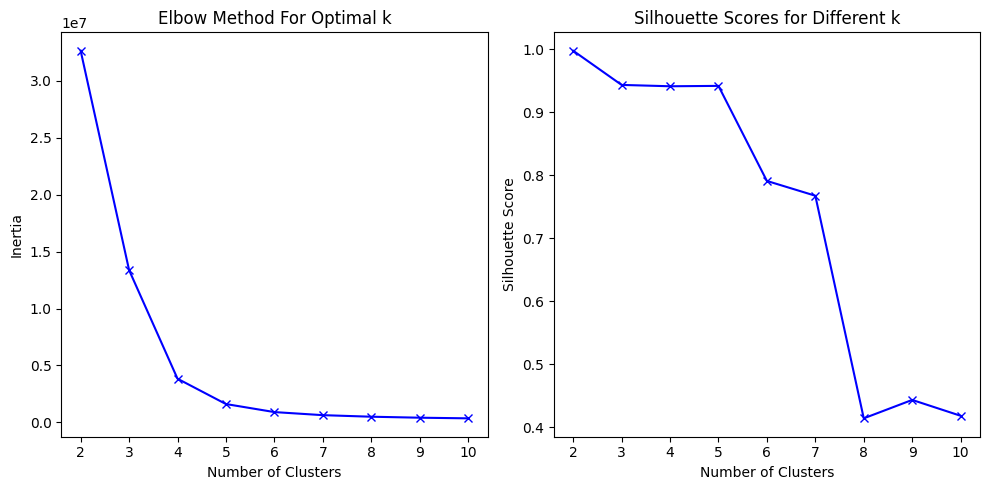

In [131]:
def tune_n_clusters(df_encoded):
    inertia_values = []
    silhouette_scores = []
    range_n_clusters = range(2, 11)  # Adjust the range based on your data

    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(df_encoded)
        
        inertia_values.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df_encoded, kmeans.labels_))

    # Plot the Elbow Method for Inertia
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range_n_clusters, inertia_values, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')

    # Plot the Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(range_n_clusters, silhouette_scores, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different k')

    plt.tight_layout()
    plt.show()

# Example usage (after scaling your data)
tune_n_clusters(df_encoded)

In [132]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [133]:
def custom_silhouette_score(estimator, X):
    # Fit KMeans
    estimator.fit(X)
    # Predict cluster labels
    labels = estimator.labels_
    # Return silhouette score
    return silhouette_score(X, labels)

SFFS

In [134]:
# Define SFFS with KMeans and Silhouette Score as the performance metric
sffs = SFS(kmeans,
           k_features='best',  # Stop when the best number of features is found
           forward=True,
           floating=True,  # This enables the floating step (backward elimination)
           scoring=custom_silhouette_score,  # Silhouette score for evaluation
           cv=0)  # No cross-validation in unsupervised learning

# Apply SFFS to your scaled data
sffs = sffs.fit(df_encoded)

TypeError: SequentialFeatureSelector.fit() missing 1 required positional argument: 'y'

**SFFS -> Failed**

Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# List to store silhouette scores for different feature subsets
feature_counts = list(range(5, 51, 5))  # Example: tuning from 5 to 50 features, step 5
silhouette_scores = []

# Loop over different values of n_features_to_select
for n_features in feature_counts:
    rfe = RFE(estimator=kmeans, n_features_to_select=n_features, step=1)
    X_reduced = rfe.fit_transform(df_encoded)  # Reduce features to n_features
    
    # Fit KMeans on the reduced feature set
    kmeans.fit(X_reduced)
    
    # Evaluate using silhouette score
    sil_score = silhouette_score(X_reduced, kmeans.labels_)
    silhouette_scores.append(sil_score)
    print(f"Number of Features: {n_features}, Silhouette Score: {sil_score}")

TypeError: RFE.fit() missing 1 required positional argument: 'y'

**RFE -> Failed**

Feature Selection via Wrapper Method (Custom Loop with Clustering Metric)

In [ ]:
# Start with an empty set of features
selected_features = []
remaining_features = list(range(df_encoded.shape[1]))  # List of all feature indices

best_silhouette = -1

In [ ]:
# Loop over features, adding one at a time
while remaining_features:
    best_feature = None
    for feature in remaining_features:
        # Test adding this feature to the selected set
        features_to_test = selected_features + [feature]
        X_test = df_encoded.iloc[:, features_to_test]  # Use iloc to select features by index
        
        # Fit KMeans and check if more than 1 cluster is found
        kmeans.fit(X_test)
        labels = kmeans.labels_
        
        # Only calculate silhouette score if there are 2 distinct clusters
        if len(np.unique(labels)) > 1:
            sil_score = silhouette_score(X_test, labels)
            
            # Keep track of the best feature based on silhouette score
            if sil_score > best_silhouette:
                best_silhouette = sil_score
                best_feature = feature
    
    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Selected feature {best_feature}, Best silhouette score: {best_silhouette}")
    else:
        # Stop if no feature improves the score
        break

C:\Users\Asus\AppData\Local\Temp\ipykernel_30244\1393386234.py:10: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_test)
C:\Users\Asus\AppData\Local\Temp\ipykernel_30244\1393386234.py:10: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_test)
C:\Users\Asus\AppData\Local\Temp\ipykernel_30244\1393386234.py:10: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_test)


Selected feature 0, Best silhouette score: 1.0


In [ ]:
print(f"Final selected features: {selected_features}")

Final selected features: [0]


**Wrapper Method -> Failed**

Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Apply VarianceThreshold to remove low-variance binary features
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold based on your data
X_reduced = selector.fit_transform(df_encoded)

# Get a boolean mask indicating which columns were kept
kept_columns_mask = selector.get_support()

# Get the names of the kept columns
kept_columns = df_encoded.columns[kept_columns_mask]

# Get the names of the removed columns
removed_columns = df_encoded.columns[~kept_columns_mask]

In [ ]:
X_reduced.shape

(1030, 304)

tuning the threshold

In [ ]:
# List of threshold values to try
threshold_values = [0.001, 0.01, 0.05, 0.1, 0.2]

best_silhouette = -1
best_threshold = None
best_columns = None

for threshold in threshold_values:
    # Apply VarianceThreshold with the current threshold
    selector = VarianceThreshold(threshold=threshold)
    X_reduced = selector.fit_transform(df_encoded)
    
    # Get the names of the kept columns
    kept_columns = df_encoded.columns[selector.get_support()]
    
    # Fit KMeans on the reduced feature set
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_reduced)
    
    # Calculate silhouette score
    sil_score = silhouette_score(X_reduced, kmeans.labels_)
    print(f"Threshold: {threshold}, Silhouette Score: {sil_score}")
    
    # Keep track of the best threshold based on silhouette score
    if sil_score > best_silhouette:
        best_silhouette = sil_score
        best_threshold = threshold
        best_columns = kept_columns

# Output the best results
print(f"\nBest Threshold: {best_threshold}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Selected Columns ({len(best_columns)}):\n", best_columns)

Threshold: 0.001, Silhouette Score: 0.9978002003906074
Threshold: 0.01, Silhouette Score: 0.997800275668569
Threshold: 0.05, Silhouette Score: 0.9978012785898646
Threshold: 0.1, Silhouette Score: 0.9978041971942403
Threshold: 0.2, Silhouette Score: 0.9978165156146221

Best Threshold: 0.2
Best Silhouette Score: 0.9978165156146221
Selected Columns (134):
 Index(['gender', 'jumlah_anak', 'isTravel?', 'ikut_anggaran?', 'isWisata?',
       'merk', 'sering_hal_baru?', 'tingkat_pendidikan', 'total_pengeluaran',
       'jumlah_keluarga',
       ...
       'fitur_ideal_Aktivitas outdoor dan petualangan',
       'fitur_ideal_Keberlanjutan lingkungan dan eco-friendly',
       'fitur_ideal_Kemudahan akses dan transportasi',
       'fitur_ideal_Keamanan dan keselamatan',
       'fitur_ideal_Harga yang terjangkau',
       'fitur_ideal_Pengalaman kuliner lokal',
       'fitur_ideal_Layanan wisata yang ramah dan professional', 'usia',
       'total_seleb', 'kepentingan_faktor'],
      dtype='object', 

threshold = 0.2

In [ ]:
# Apply VarianceThreshold to remove low-variance binary features
selector = VarianceThreshold(threshold=0.2)  # Adjust threshold based on your data
X_reduced = selector.fit_transform(df_encoded)

# Get a boolean mask indicating which columns were kept
kept_columns_mask = selector.get_support()

# Get the names of the kept columns
kept_columns = df_encoded.columns[kept_columns_mask]

# Get the names of the removed columns
removed_columns = df_encoded.columns[~kept_columns_mask]

print("kept columns: ", kept_columns.shape)
print("removed columns: ", removed_columns.shape)


kept columns:  (134,)
removed columns:  (199,)


In [ ]:
removed_feature = pd.DataFrame(removed_columns, columns=['Removed Columns'])
# removed_feature.to_excel("removed_feature.xlsx")

In [ ]:
df_feature_selected = pd.DataFrame(X_reduced, columns=kept_columns)
df_feature_selected

gender  jumlah_anak  isTravel?  ikut_anggaran?  isWisata?  merk  \
0        0.0          0.0        1.0             0.0        1.0   0.0   
1        1.0          0.0        0.0             1.0        1.0   1.0   
2        1.0          1.0        1.0             0.0        1.0   2.0   
3        0.0          0.0        0.0             1.0        0.0   1.0   
4        0.0          0.0        0.0             0.0        1.0   1.0   
...      ...          ...        ...             ...        ...   ...   
1025     1.0          0.0        1.0             1.0        0.0   1.0   
1026     0.0          0.0        0.0             0.0        0.0   1.0   
1027     0.0          1.0        1.0             0.0        0.0   2.0   
1028     1.0          0.0        0.0             1.0        0.0   0.0   
1029     1.0          1.0        1.0             1.0        0.0   1.0   

      sering_hal_baru?  tingkat_pendidikan  total_pengeluaran  \
0                  0.0                 3.0                1.0   
1                  0.0                 3.0                1.0   
2                  2.0                 4.0                3.0   
3                  1.0                 3.0                2.0   
4                  2.0                 3.0                2.0   
...                ...                 ...                ...   
1025               0.0                 3.0                1.0   
1026               2.0                 3.0                1.0   
1027               2.0                 3.0                1.0   
1028               1.0                 2.0                1.0   
1029               0.0                 3.0                2.0   

      jumlah_keluarga  ...  fitur_ideal_Aktivitas outdoor dan petualangan  \
0                 2.0  ...                                            0.0   
1                 1.0  ...                                            0.0   
2                 2.0  ...                                            0.0   
3                 1.0  ...                                            1.0   
4                 3.0  ...                                            1.0   
...               ...  ...                                            ...   
1025              1.0  ...                                            0.0   
1026              1.0  ...                                            0.0   
1027              2.0  ...                                            0.0   
1028              2.0  ...                                            0.0   
1029              2.0  ...                                            0.0   

      fitur_ideal_Keberlanjutan lingkungan dan eco-friendly  \
0                                                   1.0       
1                                                   0.0       
2                                                   1.0       
3                                                   1.0       
4                                                   0.0       
...                                                 ...       
1025                                                0.0       
1026                                                1.0       
1027                                                0.0       
1028                                                1.0       
1029                                                0.0       

      fitur_ideal_Kemudahan akses dan transportasi  \
0                                              1.0   
1                                              0.0   
2                                              0.0   
3                                              1.0   
4                                              1.0   
...                                            ...   
1025                                           0.0   
1026                                           1.0   
1027                                           1.0   
1028                                           1.0   
1029                                           1.0   

      fitur_ideal

In [ ]:
# df_feature_selected.to_csv("df_feature_selected.csv")

### Exclude beberapa fitur yang tidak relevan (sesuai arahan Bu Nia)

-> pekerjaan, status_pernikahan, total_waktu_sosmed, sosmed, motivasi_sosmed, total_seleb, produk_online, konten_favorite, sering_posting, motivasi_posting, jenis_konten, jarak_destinasi, terkenal_baru

In [ ]:
df_feature_selected

gender  jumlah_anak  isTravel?  ikut_anggaran?  isWisata?  merk  \
0        0.0          0.0        1.0             0.0        1.0   0.0   
1        1.0          0.0        0.0             1.0        1.0   1.0   
2        1.0          1.0        1.0             0.0        1.0   2.0   
3        0.0          0.0        0.0             1.0        0.0   1.0   
4        0.0          0.0        0.0             0.0        1.0   1.0   
...      ...          ...        ...             ...        ...   ...   
1025     1.0          0.0        1.0             1.0        0.0   1.0   
1026     0.0          0.0        0.0             0.0        0.0   1.0   
1027     0.0          1.0        1.0             0.0        0.0   2.0   
1028     1.0          0.0        0.0             1.0        0.0   0.0   
1029     1.0          1.0        1.0             1.0        0.0   1.0   

      sering_hal_baru?  tingkat_pendidikan  total_pengeluaran  \
0                  0.0                 3.0                1.0   
1                  0.0                 3.0                1.0   
2                  2.0                 4.0                3.0   
3                  1.0                 3.0                2.0   
4                  2.0                 3.0                2.0   
...                ...                 ...                ...   
1025               0.0                 3.0                1.0   
1026               2.0                 3.0                1.0   
1027               2.0                 3.0                1.0   
1028               1.0                 2.0                1.0   
1029               0.0                 3.0                2.0   

      jumlah_keluarga  ...  fitur_ideal_Aktivitas outdoor dan petualangan  \
0                 2.0  ...                                            0.0   
1                 1.0  ...                                            0.0   
2                 2.0  ...                                            0.0   
3                 1.0  ...                                            1.0   
4                 3.0  ...                                            1.0   
...               ...  ...                                            ...   
1025              1.0  ...                                            0.0   
1026              1.0  ...                                            0.0   
1027              2.0  ...                                            0.0   
1028              2.0  ...                                            0.0   
1029              2.0  ...                                            0.0   

      fitur_ideal_Keberlanjutan lingkungan dan eco-friendly  \
0                                                   1.0       
1                                                   0.0       
2                                                   1.0       
3                                                   1.0       
4                                                   0.0       
...                                                 ...       
1025                                                0.0       
1026                                                1.0       
1027                                                0.0       
1028                                                1.0       
1029                                                0.0       

      fitur_ideal_Kemudahan akses dan transportasi  \
0                                              1.0   
1                                              0.0   
2                                              0.0   
3                                              1.0   
4                                              1.0   
...                                            ...   
1025                                           0.0   
1026                                           1.0   
1027                                           1.0   
1028                                           1.0   
1029                                           1.0   

      fitur_ideal

In [ ]:
columns_to_exclude = ["pekerjaan", "status_pernikahan", "total_waktu_sosmed", "sosmed", "motivasi_sosmed", 
                      "total_seleb", "produk_online", "konten_favorite", "sering_posting", 
                      "motivasi_posting", "jenis_konten", "jarak_destinasi", "terkenal_baru"]

In [ ]:
# Use regular expressions to match columns that start with any of the values in the list
pattern = '|'.join(f'^{col}' for col in columns_to_exclude)
df_for_model = df_feature_selected[df_feature_selected.columns[~df_feature_selected.columns.str.contains(pattern)]]

In [ ]:
df_for_model.columns

Index(['gender', 'jumlah_anak', 'isTravel?', 'ikut_anggaran?', 'isWisata?',
       'merk', 'sering_hal_baru?', 'tingkat_pendidikan', 'total_pengeluaran',
       'jumlah_keluarga', 'total_travelling', 'total_aplikasi_travelling',
       'durasi_liburan', 'rinci_atau_spontan', 'info_perbandingan?',
       'harga_kualitas?', 'jumlah_anggaran_selanjutnya', 'penting_detail?',
       'provinsi_DKI Jakarta',
       'gaya_hidup_Kuliner: Saya suka wisata kuliner, atau mencoba berbagai jenis makanan dan minuman khas/lokal dari daerah yang saya kunjungi.',
       'gaya_hidup_Keluarga: Saya mencari liburan yang ramah keluarga, dengan fasilitas dan aktivitas yang cocok untuk anak-anak dan semua anggota keluarga.',
       'gaya_hidup_Relaksasi dan Wellness: Saya lebih suka liburan yang memungkinkan saya untuk bersantai dan mengurangi stress, seperti pantai, atau resort yang tenang, serta kegiatan seperti terapi Kesehatan, kelas kebugaran.',
       'gaya_hidup_Petualangan dan Eksplorasi: Saya tertari

In [ ]:
# df_for_model.to_csv("df_for_model.csv")

In [ ]:
df_for_model.shape

(1030, 93)

In [ ]:
skewness = df_for_model.skew()
skewness

gender                                                   -0.314956
jumlah_anak                                               0.761408
isTravel?                                                 0.705047
ikut_anggaran?                                           -0.097344
isWisata?                                                 0.148192
                                                            ...   
fitur_ideal_Harga yang terjangkau                        -0.038899
fitur_ideal_Pengalaman kuliner lokal                      0.475683
fitur_ideal_Layanan wisata yang ramah dan professional    0.570157
usia                                                      0.923900
kepentingan_faktor                                       -1.041012
Length: 93, dtype: float64

In [ ]:
# Define thresholds
no_transform = skewness[(skewness >= -0.5) & (skewness <= 0.5)].index
mild_moderate_skew = skewness[(skewness > 0.5) & (skewness <= 1)].index
extreme_skew = skewness[(skewness > 1) | (skewness < -1)].index

In [ ]:
# Output categorized columns
print("No Transformation Needed:", no_transform.tolist())
print("Mild to Moderate Skewness (Power Transformation):", mild_moderate_skew.tolist())
print("Extreme Skewness (Rank-Gauss Normalization):", extreme_skew.tolist())

No Transformation Needed: ['gender', 'ikut_anggaran?', 'isWisata?', 'merk', 'sering_hal_baru?', 'tingkat_pendidikan', 'jumlah_keluarga', 'total_travelling', 'total_aplikasi_travelling', 'durasi_liburan', 'rinci_atau_spontan', 'jumlah_anggaran_selanjutnya', 'provinsi_DKI Jakarta', 'gaya_hidup_Keluarga: Saya mencari liburan yang ramah keluarga, dengan fasilitas dan aktivitas yang cocok untuk anak-anak dan semua anggota keluarga.', 'gaya_hidup_Relaksasi dan Wellness: Saya lebih suka liburan yang memungkinkan saya untuk bersantai dan mengurangi stress, seperti pantai, atau resort yang tenang, serta kegiatan seperti terapi Kesehatan, kelas kebugaran.', 'penting_tujuan_Faktor keselamatan dan keamanan', 'penting_tujuan_Kemudahan aksesibilitas', 'penting_tujuan_Pengalaman unik', 'penting_tujuan_Pengalaman yang autentik dan lokal', 'kategori_wisata_Wisata budaya', 'kategori_wisata_Urban dan Kota (Menjelajahi kehidupan kota, termasuk kunjungan ke tempat-tempat ikonik, kehidupan malam, dan pengal

In [ ]:
df_norm = df_for_model.copy()

In [ ]:
from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer(method='yeo-johnson')
df_norm[mild_moderate_skew] = trans.fit_transform(df_norm[mild_moderate_skew])

df_norm

gender  jumlah_anak  isTravel?  ikut_anggaran?  isWisata?  merk  \
0        0.0    -0.689670   1.412157             0.0        1.0   0.0   
1        1.0    -0.689670  -0.708137             1.0        1.0   1.0   
2        1.0     1.449969   1.412157             0.0        1.0   2.0   
3        0.0    -0.689670  -0.708137             1.0        0.0   1.0   
4        0.0    -0.689670  -0.708137             0.0        1.0   1.0   
...      ...          ...        ...             ...        ...   ...   
1025     1.0    -0.689670   1.412157             1.0        0.0   1.0   
1026     0.0    -0.689670  -0.708137             0.0        0.0   1.0   
1027     0.0     1.449969   1.412157             0.0        0.0   2.0   
1028     1.0    -0.689670  -0.708137             1.0        0.0   0.0   
1029     1.0     1.449969   1.412157             1.0        0.0   1.0   

      sering_hal_baru?  tingkat_pendidikan  total_pengeluaran  \
0                  0.0                 3.0                1.0   
1                  0.0                 3.0                1.0   
2                  2.0                 4.0                3.0   
3                  1.0                 3.0                2.0   
4                  2.0                 3.0                2.0   
...                ...                 ...                ...   
1025               0.0                 3.0                1.0   
1026               2.0                 3.0                1.0   
1027               2.0                 3.0                1.0   
1028               1.0                 2.0                1.0   
1029               0.0                 3.0                2.0   

      jumlah_keluarga  ...  fitur_ideal_Atraksi budaya dan sejarah  \
0                 2.0  ...                                1.462957   
1                 1.0  ...                               -0.683547   
2                 2.0  ...                               -0.683547   
3                 1.0  ...                                1.462957   
4                 3.0  ...                                1.462957   
...               ...  ...                                     ...   
1025              1.0  ...                               -0.683547   
1026              1.0  ...                               -0.683547   
1027              2.0  ...                               -0.683547   
1028              2.0  ...                               -0.683547   
1029              2.0  ...                               -0.683547   

      fitur_ideal_Aktivitas outdoor dan petualangan  \
0                                         -0.671345   
1                                         -0.671345   
2                                         -0.671345   
3                                          1.489547   
4                                          1.489547   
...                                             ...   
1025                                      -0.671345   
1026                                      -0.671345   
1027                                      -0.671345   
1028                                      -0.671345   
1029                                      -0.671345   

      fitur_ideal_Keberlanjutan lingkungan dan eco-friendly  \
0                                              1.612885       
1                                             -0.620007       
2                                              1.612885       
3                                              1.612885       
4                                             -0.620007       
...                                                 ...       
1025                                          -0.620007       
1026                                           1.612885       
1027                                          -0.620007       
1028                                           1.612885       
1029                                          -0.620007       

      fitur_ideal_Kemudahan akses dan transportasi  \
0                                  

In [ ]:
import scipy.stats as stats

# Apply Rank-Gauss Normalization to Extreme Skewness Columns
def rank_gauss_normalize(series):
    # Rank the data and convert to a quantile
    ranked_series = series.rank(method='average') / (len(series) + 1)
    # Map quantile to standard normal
    normalized_series = stats.norm.ppf(ranked_series)
    return normalized_series

In [ ]:
df_norm[extreme_skew] = df_norm[extreme_skew].apply(rank_gauss_normalize)

In [ ]:
df_norm

gender  jumlah_anak  isTravel?  ikut_anggaran?  isWisata?  merk  \
0        0.0    -0.689670   1.412157             0.0        1.0   0.0   
1        1.0    -0.689670  -0.708137             1.0        1.0   1.0   
2        1.0     1.449969   1.412157             0.0        1.0   2.0   
3        0.0    -0.689670  -0.708137             1.0        0.0   1.0   
4        0.0    -0.689670  -0.708137             0.0        1.0   1.0   
...      ...          ...        ...             ...        ...   ...   
1025     1.0    -0.689670   1.412157             1.0        0.0   1.0   
1026     0.0    -0.689670  -0.708137             0.0        0.0   1.0   
1027     0.0     1.449969   1.412157             0.0        0.0   2.0   
1028     1.0    -0.689670  -0.708137             1.0        0.0   0.0   
1029     1.0     1.449969   1.412157             1.0        0.0   1.0   

      sering_hal_baru?  tingkat_pendidikan  total_pengeluaran  \
0                  0.0                 3.0           0.497528   
1                  0.0                 3.0           0.497528   
2                  2.0                 4.0           1.684197   
3                  1.0                 3.0           1.198188   
4                  2.0                 3.0           1.198188   
...                ...                 ...                ...   
1025               0.0                 3.0           0.497528   
1026               2.0                 3.0           0.497528   
1027               2.0                 3.0           0.497528   
1028               1.0                 2.0           0.497528   
1029               0.0                 3.0           1.198188   

      jumlah_keluarga  ...  fitur_ideal_Atraksi budaya dan sejarah  \
0                 2.0  ...                                1.462957   
1                 1.0  ...                               -0.683547   
2                 2.0  ...                               -0.683547   
3                 1.0  ...                                1.462957   
4                 3.0  ...                                1.462957   
...               ...  ...                                     ...   
1025              1.0  ...                               -0.683547   
1026              1.0  ...                               -0.683547   
1027              2.0  ...                               -0.683547   
1028              2.0  ...                               -0.683547   
1029              2.0  ...                               -0.683547   

      fitur_ideal_Aktivitas outdoor dan petualangan  \
0                                         -0.671345   
1                                         -0.671345   
2                                         -0.671345   
3                                          1.489547   
4                                          1.489547   
...                                             ...   
1025                                      -0.671345   
1026                                      -0.671345   
1027                                      -0.671345   
1028                                      -0.671345   
1029                                      -0.671345   

      fitur_ideal_Keberlanjutan lingkungan dan eco-friendly  \
0                                              1.612885       
1                                             -0.620007       
2                                              1.612885       
3                                              1.612885       
4                                             -0.620007       
...                                                 ...       
1025                                          -0.620007       
1026                                           1.612885       
1027                                          -0.620007       
1028                                           1.612885       
1029                                          -0.620007       

      fitur_ideal_Kemudahan akses dan transportasi  \
0                                  

In [ ]:
df_norm.skew()

gender                                                   -0.314956
jumlah_anak                                               0.761408
isTravel?                                                 0.705047
ikut_anggaran?                                           -0.097344
isWisata?                                                 0.148192
                                                            ...   
fitur_ideal_Harga yang terjangkau                        -0.038899
fitur_ideal_Pengalaman kuliner lokal                      0.475683
fitur_ideal_Layanan wisata yang ramah dan professional    0.570157
usia                                                      0.152959
kepentingan_faktor                                       -0.548033
Length: 93, dtype: float64

# CLUSTERING 

tuning n_clusters

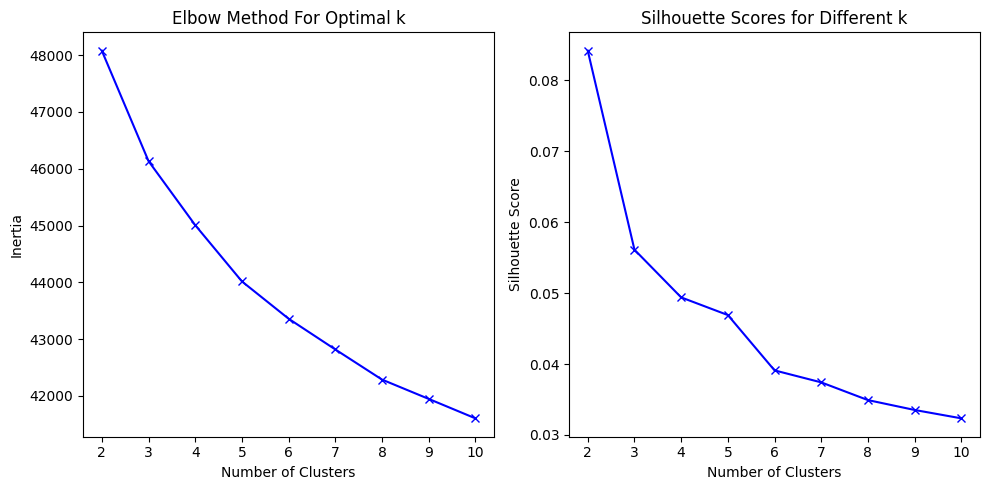

In [ ]:
tune_n_clusters(df_norm)

### **K-Means**

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [ ]:
df_kmeans = df_for_model.copy()

In [ ]:
kmeans.fit(df_kmeans)
df_kmeans['cluster_kmeans'] = kmeans.labels_
df_kmeans

gender  jumlah_anak  isTravel?  ikut_anggaran?  isWisata?  merk  \
0        0.0          0.0        1.0             0.0        1.0   0.0   
1        1.0          0.0        0.0             1.0        1.0   1.0   
2        1.0          1.0        1.0             0.0        1.0   2.0   
3        0.0          0.0        0.0             1.0        0.0   1.0   
4        0.0          0.0        0.0             0.0        1.0   1.0   
...      ...          ...        ...             ...        ...   ...   
1025     1.0          0.0        1.0             1.0        0.0   1.0   
1026     0.0          0.0        0.0             0.0        0.0   1.0   
1027     0.0          1.0        1.0             0.0        0.0   2.0   
1028     1.0          0.0        0.0             1.0        0.0   0.0   
1029     1.0          1.0        1.0             1.0        0.0   1.0   

      sering_hal_baru?  tingkat_pendidikan  total_pengeluaran  \
0                  0.0                 3.0                1.0   
1                  0.0                 3.0                1.0   
2                  2.0                 4.0                3.0   
3                  1.0                 3.0                2.0   
4                  2.0                 3.0                2.0   
...                ...                 ...                ...   
1025               0.0                 3.0                1.0   
1026               2.0                 3.0                1.0   
1027               2.0                 3.0                1.0   
1028               1.0                 2.0                1.0   
1029               0.0                 3.0                2.0   

      jumlah_keluarga  ...  fitur_ideal_Aktivitas outdoor dan petualangan  \
0                 2.0  ...                                            0.0   
1                 1.0  ...                                            0.0   
2                 2.0  ...                                            0.0   
3                 1.0  ...                                            1.0   
4                 3.0  ...                                            1.0   
...               ...  ...                                            ...   
1025              1.0  ...                                            0.0   
1026              1.0  ...                                            0.0   
1027              2.0  ...                                            0.0   
1028              2.0  ...                                            0.0   
1029              2.0  ...                                            0.0   

      fitur_ideal_Keberlanjutan lingkungan dan eco-friendly  \
0                                                   1.0       
1                                                   0.0       
2                                                   1.0       
3                                                   1.0       
4                                                   0.0       
...                                                 ...       
1025                                                0.0       
1026                                                1.0       
1027                                                0.0       
1028                                                1.0       
1029                                                0.0       

      fitur_ideal_Kemudahan akses dan transportasi  \
0                                              1.0   
1                                              0.0   
2                                              0.0   
3                                              1.0   
4                                              1.0   
...                                            ...   
1025                                           0.0   
1026                                           1.0   
1027                                           1.0   
1028                                           1.0   
1029                                           1.0   

      fitur_ideal

In [ ]:
df_kmeans.groupby('cluster_kmeans')['cluster_kmeans'].count()

cluster_kmeans
0    697
1    333
Name: cluster_kmeans, dtype: int64

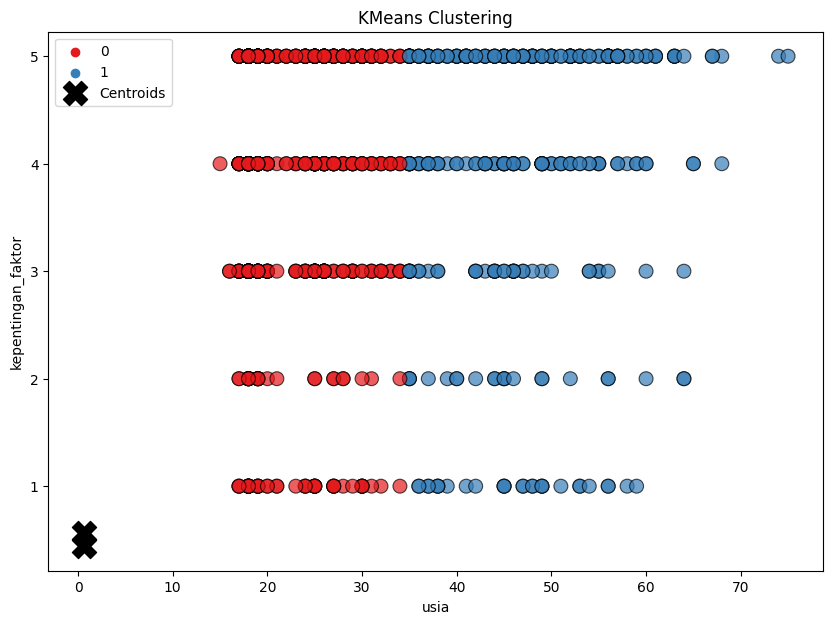

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_kmeans.iloc[:, 91], y=df_kmeans.iloc[:, 92], hue=df_kmeans['cluster_kmeans'], palette='Set1', s=100, alpha=0.7, edgecolor='k')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 3], s=300, c='black', marker='X', label='Centroids')

plt.title('KMeans Clustering')
plt.legend()
plt.show()

### **GMM**

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
df_gmm = df_for_model.copy()

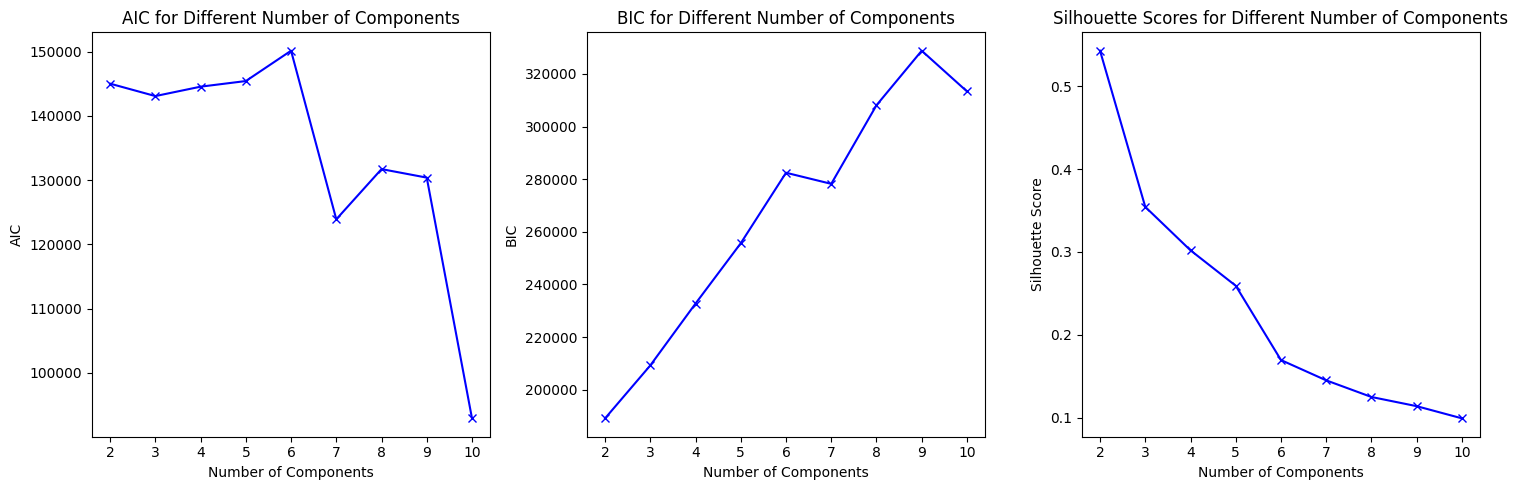

In [ ]:
def tune_n_components_gmm(df_encoded):
    aic_values = []
    bic_values = []
    silhouette_scores = []
    range_n_components = range(2, 11)  # Adjust the range based on your data

    for n_components in range_n_components:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(df_encoded)
        
        # Compute AIC and BIC for model selection
        aic_values.append(gmm.aic(df_encoded))
        bic_values.append(gmm.bic(df_encoded))
        
        # Compute silhouette score only if there’s more than one cluster
        if n_components > 1:
            labels = gmm.predict(df_encoded)
            silhouette_scores.append(silhouette_score(df_encoded, labels))
        else:
            silhouette_scores.append(float("nan"))  # Placeholder for k=1

    # Plot AIC and BIC Scores
    plt.figure(figsize=(15, 5))
    
    # Plot AIC
    plt.subplot(1, 3, 1)
    plt.plot(range_n_components, aic_values, 'bx-')
    plt.xlabel('Number of Components')
    plt.ylabel('AIC')
    plt.title('AIC for Different Number of Components')
    
    # Plot BIC
    plt.subplot(1, 3, 2)
    plt.plot(range_n_components, bic_values, 'bx-')
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')
    plt.title('BIC for Different Number of Components')

    # Plot Silhouette Scores
    plt.subplot(1, 3, 3)
    plt.plot(range_n_components, silhouette_scores, 'bx-')
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Number of Components')

    plt.tight_layout()
    plt.show()

# Example usage (after scaling your data)
tune_n_components_gmm(df_gmm)

In [ ]:
# Initialize and fit GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(df_gmm)  # replace `data` with your dataset

# Predict cluster labels
gmm_labels = gmm.predict(df_gmm)

# Evaluate clustering performance
silhouette_avg = silhouette_score(df_gmm, gmm_labels)
print(f'Silhouette Score for GMM: {silhouette_avg}')

Silhouette Score for GMM: 0.5431926402370406


In [ ]:
gmm_labels

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
centers = gmm.means_

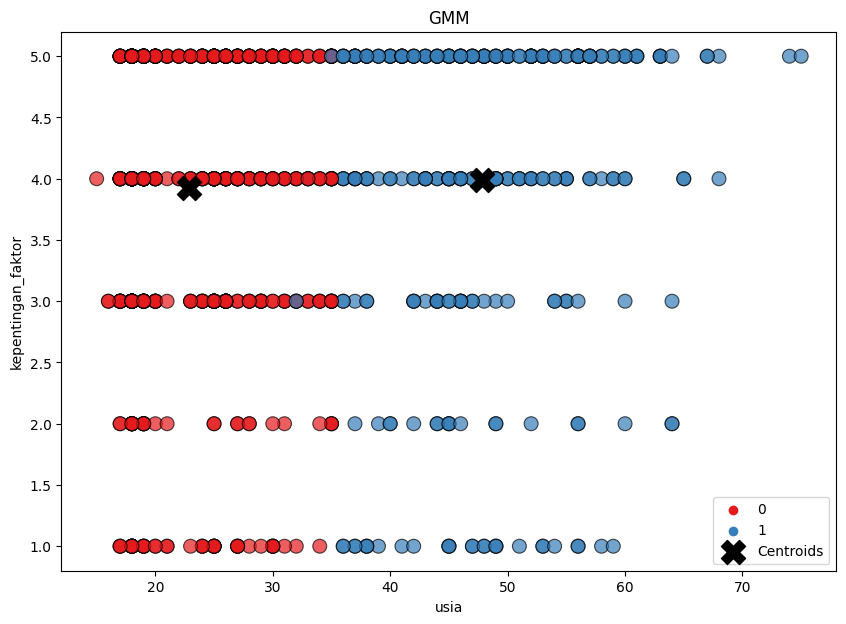

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_gmm.iloc[:, 91], y=df_gmm.iloc[:, 92], hue=gmm_labels, palette='Set1', s=100, alpha=0.7, edgecolor='k')

# Plotting the cluster centers
plt.scatter(centers[:, 91], centers[:, 92], s=300, c='black', marker='X', label='Centroids')

plt.title('GMM')
plt.legend()
plt.show()

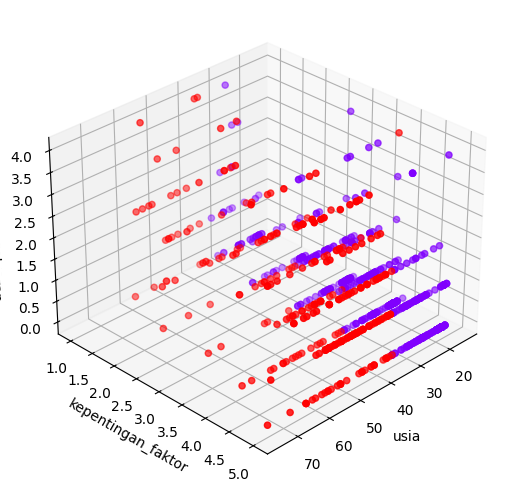

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_gmm['usia'], df_gmm['kepentingan_faktor'], df_gmm['total_pengeluaran'], c=gmm_labels, cmap='rainbow')
ax.set_xlabel('usia')
ax.set_ylabel('kepentingan_faktor')
ax.set_zlabel('total_pengeluaran')
# Adjust the view angle (optional)
ax.view_init(elev=30, azim=45)  # Adjust the elevation and azimuth for better visualization

# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
import plotly.graph_objects as go

features = df_gmm.columns[:5]  # Modify this if you want specific features
num_vars = len(features)

# Define the angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Initialize the Plotly figure
fig = go.Figure()

# Add a trace for each cluster
for i, center in enumerate(centers):
    values = center[:num_vars].tolist()
    values += values[:1]  # Close the circle by repeating the first value
    
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=features.tolist() + [features[0]],  # Close the loop
        fill='toself',
        name=f'Cluster {i + 1}'
    ))

# Update layout for better readability
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[min(values) - 1, max(values) + 1])
    ),
    showlegend=True,
    title="GMM Cluster Centers in Radar Chart"
)

fig.show()

In [ ]:
features = df_gmm.loc[:, ~df_gmm.columns.isin(['cluster', 'usia'])]
features = features.columns.to_list()
features

['gender',
 'jumlah_anak',
 'isTravel?',
 'ikut_anggaran?',
 'isWisata?',
 'merk',
 'sering_hal_baru?',
 'tingkat_pendidikan',
 'total_pengeluaran',
 'jumlah_keluarga',
 'total_travelling',
 'total_aplikasi_travelling',
 'durasi_liburan',
 'rinci_atau_spontan',
 'info_perbandingan?',
 'harga_kualitas?',
 'jumlah_anggaran_selanjutnya',
 'penting_detail?',
 'provinsi_DKI Jakarta',
 'gaya_hidup_Kuliner: Saya suka wisata kuliner, atau mencoba berbagai jenis makanan dan minuman khas/lokal dari daerah yang saya kunjungi.',
 'gaya_hidup_Keluarga: Saya mencari liburan yang ramah keluarga, dengan fasilitas dan aktivitas yang cocok untuk anak-anak dan semua anggota keluarga.',
 'gaya_hidup_Relaksasi dan Wellness: Saya lebih suka liburan yang memungkinkan saya untuk bersantai dan mengurangi stress, seperti pantai, atau resort yang tenang, serta kegiatan seperti terapi Kesehatan, kelas kebugaran.',
 'gaya_hidup_Petualangan dan Eksplorasi: Saya tertarik pada pengalaman baru dan menantang, seperti m

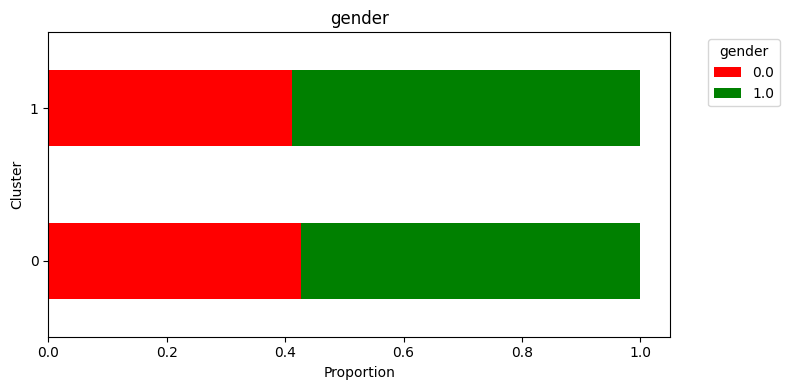

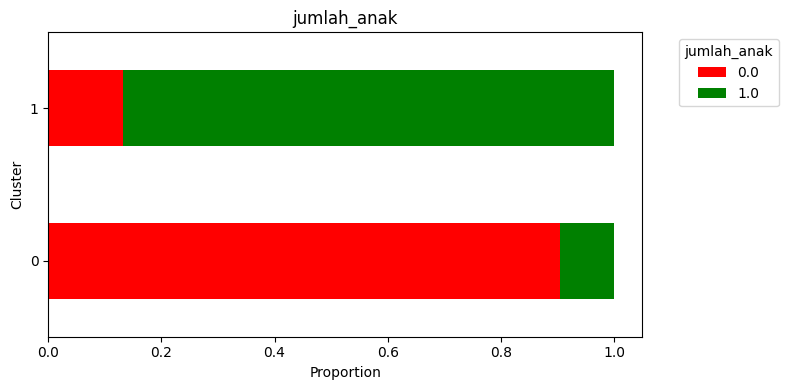

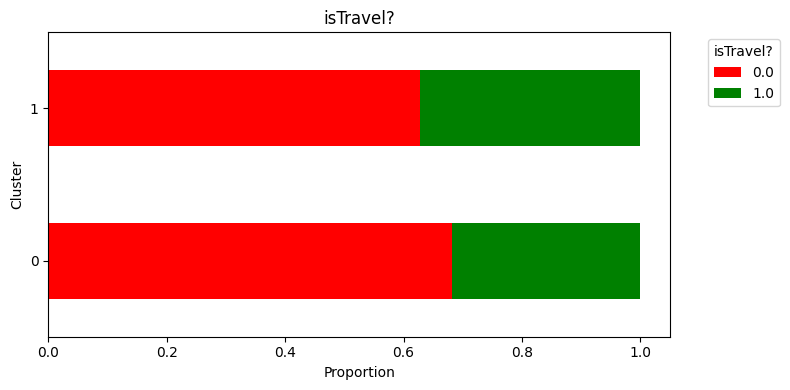

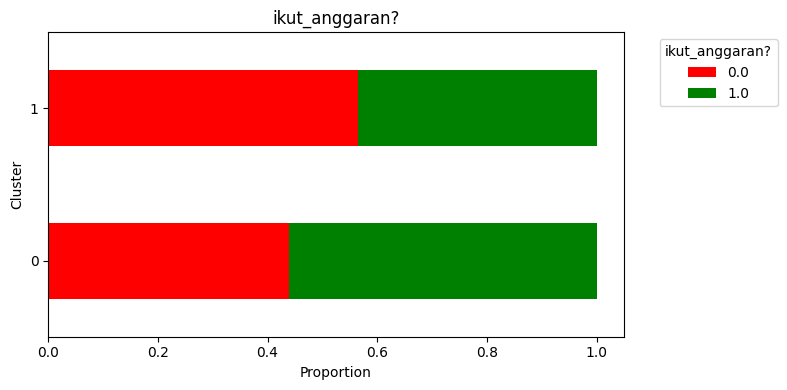

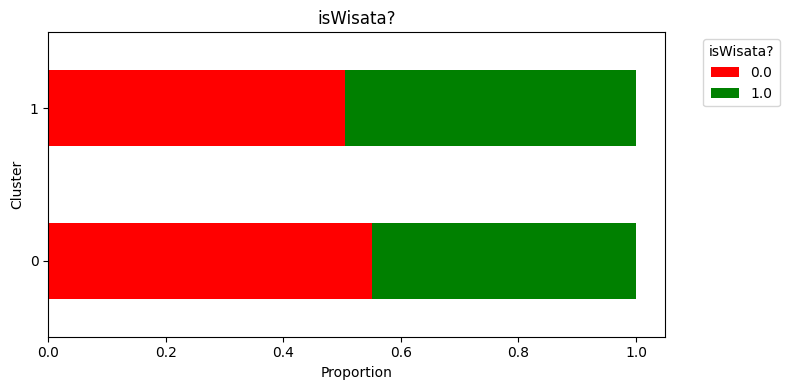

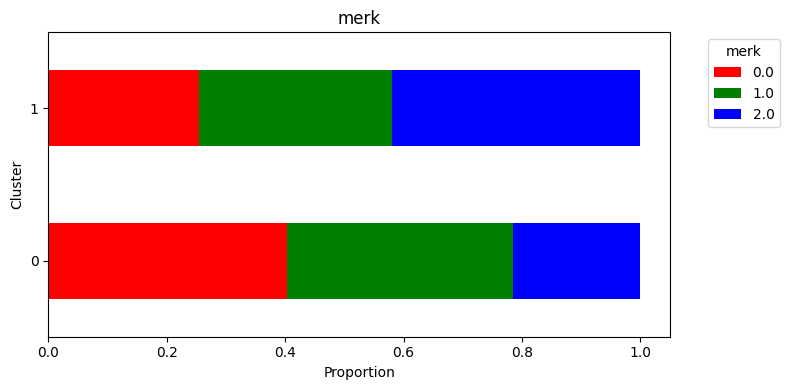

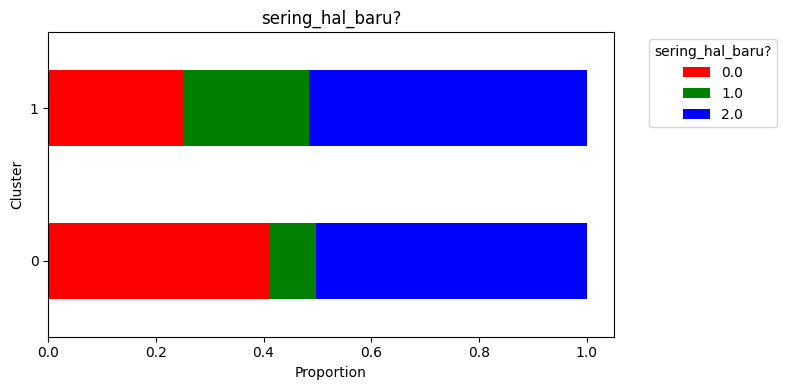

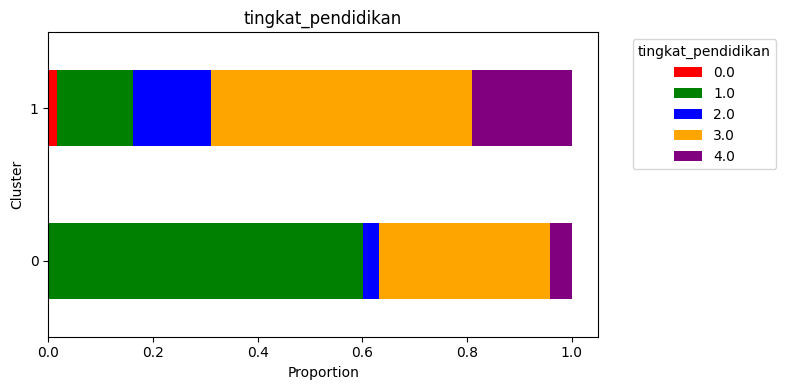

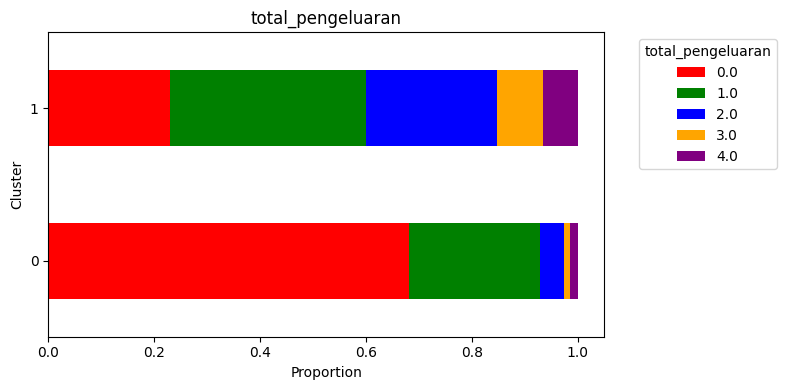

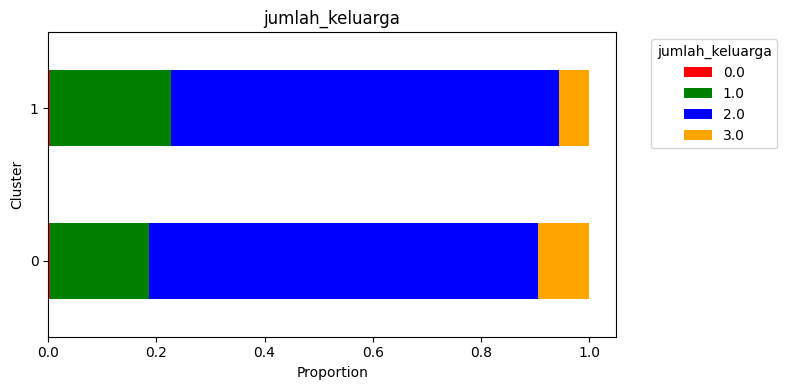

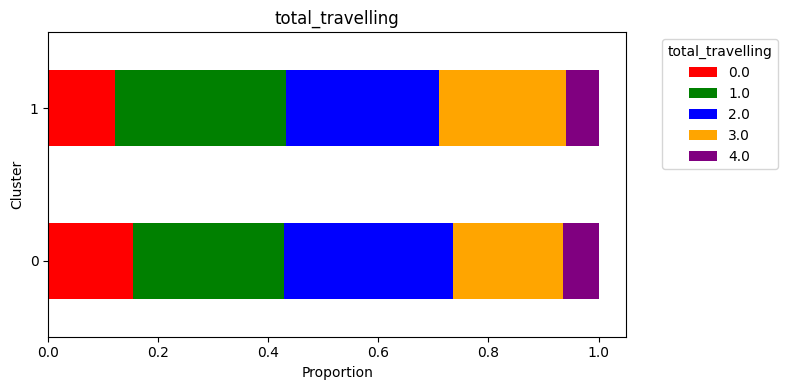

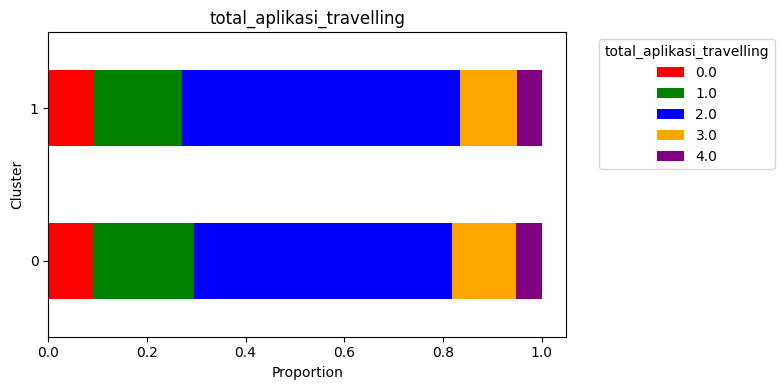

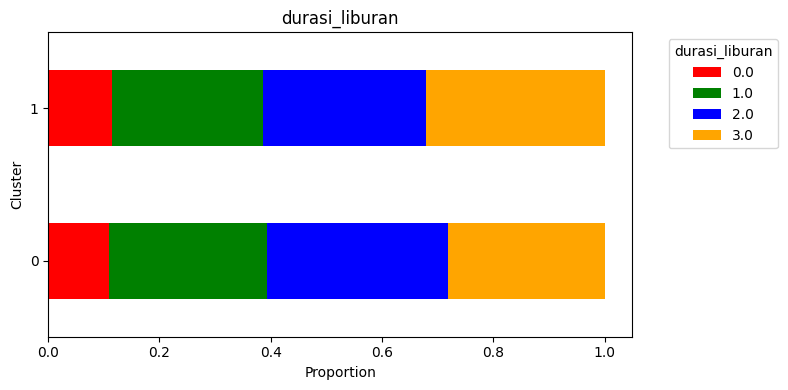

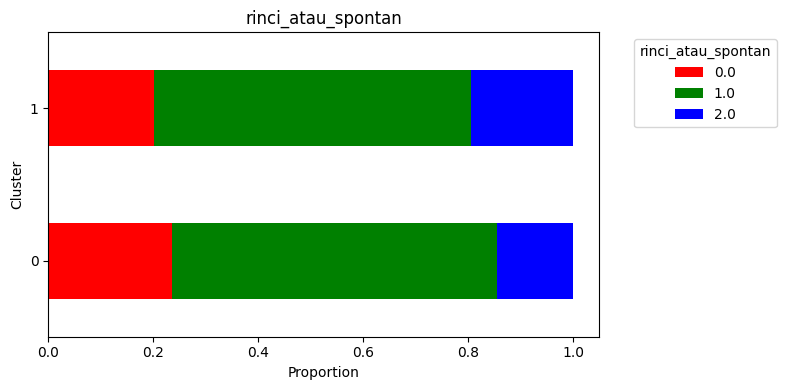

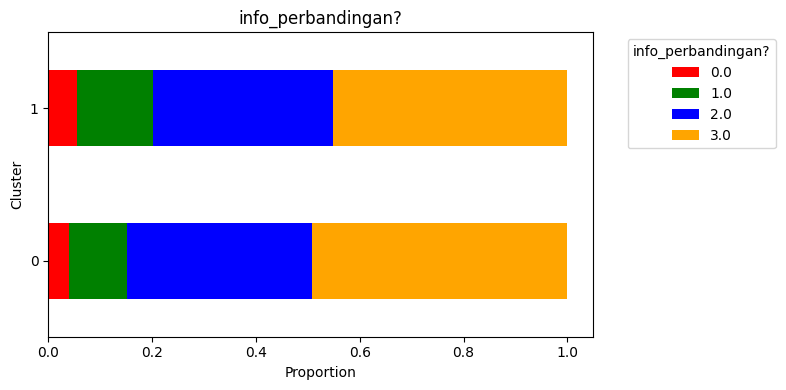

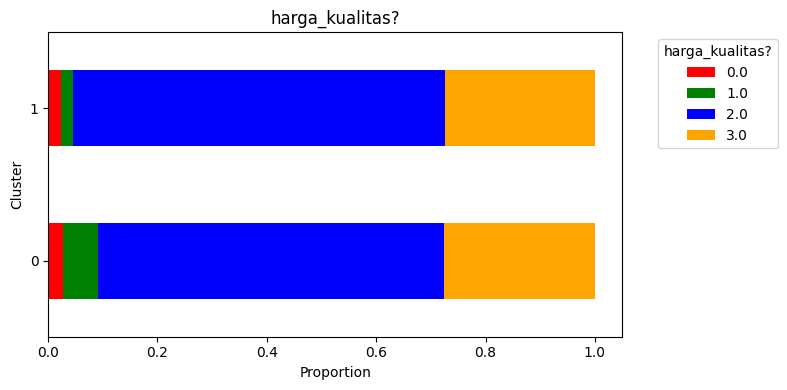

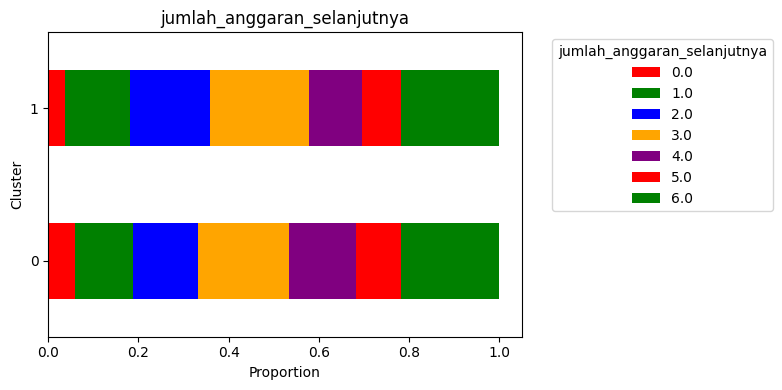

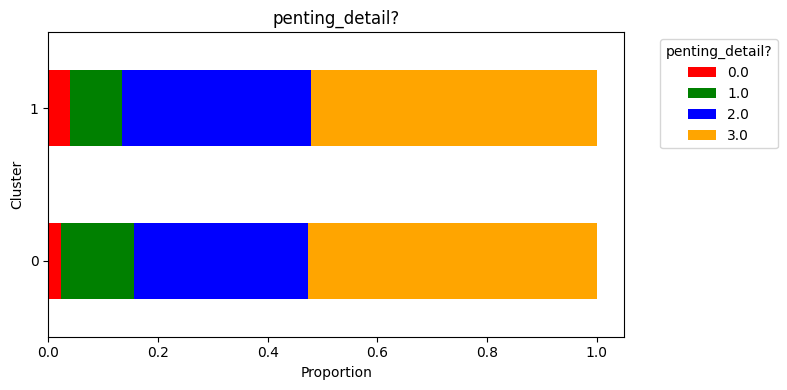

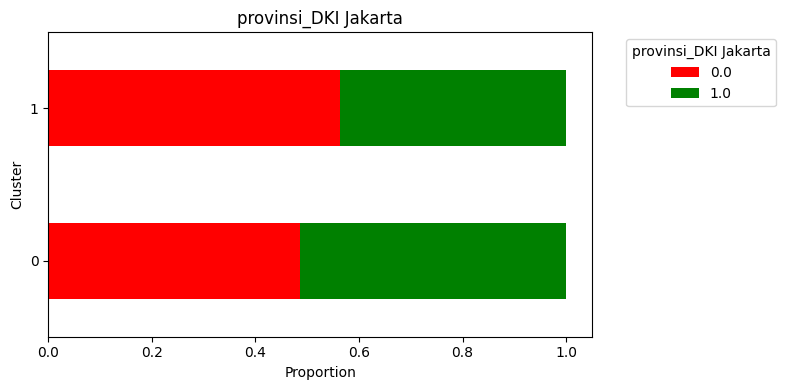

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



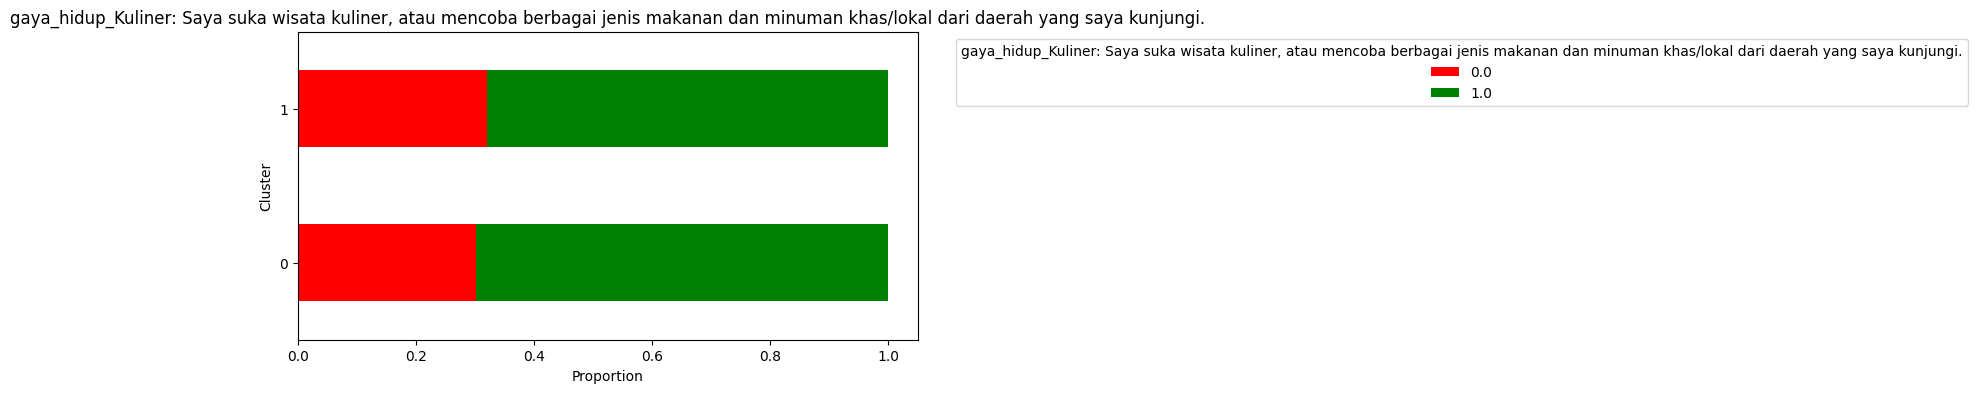

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



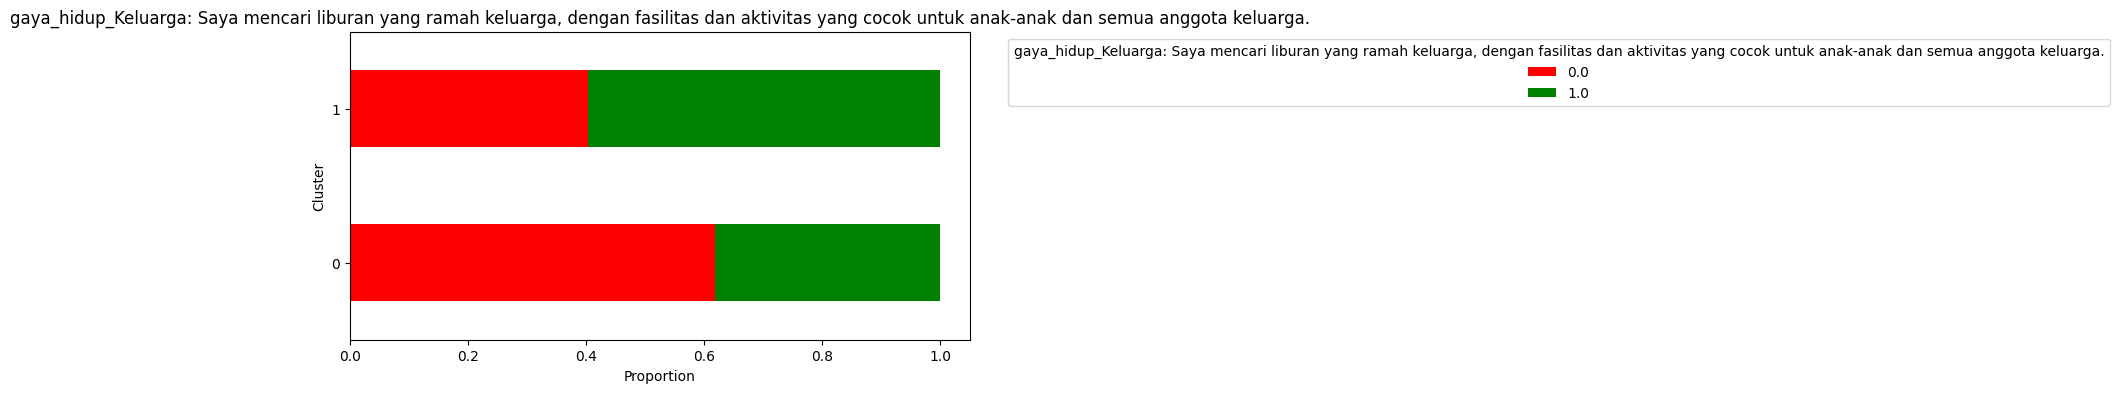

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



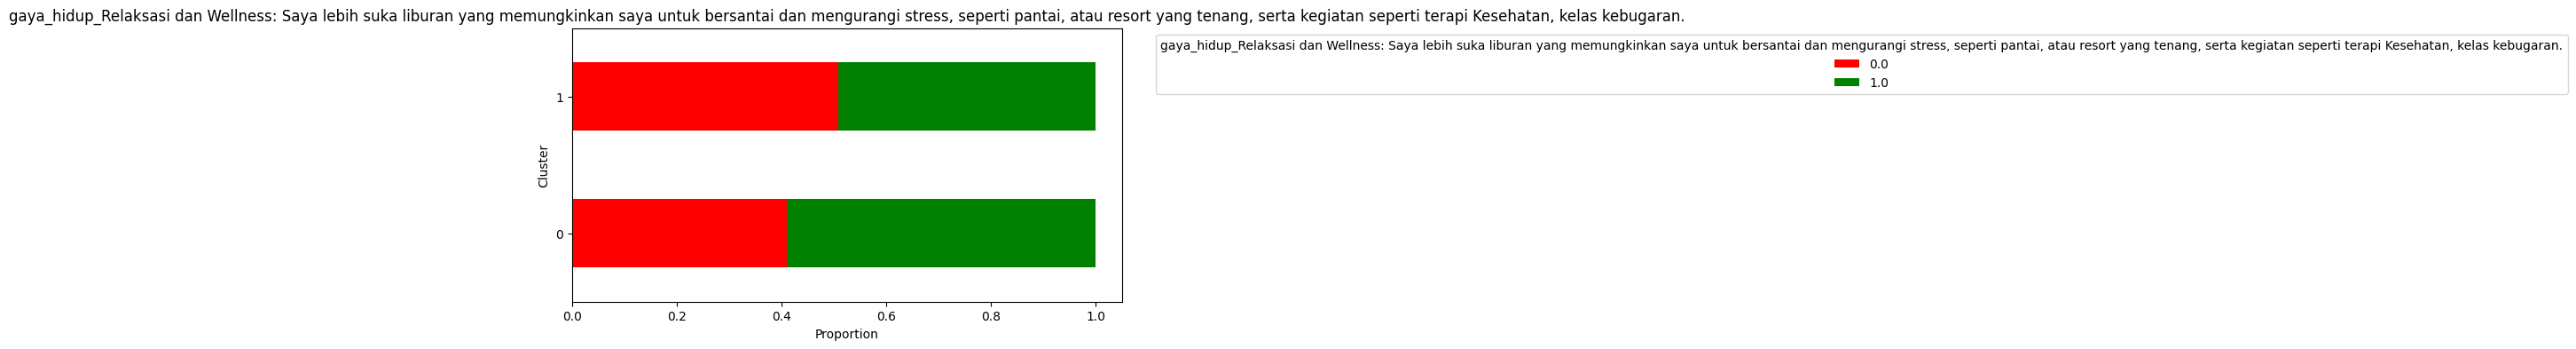

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



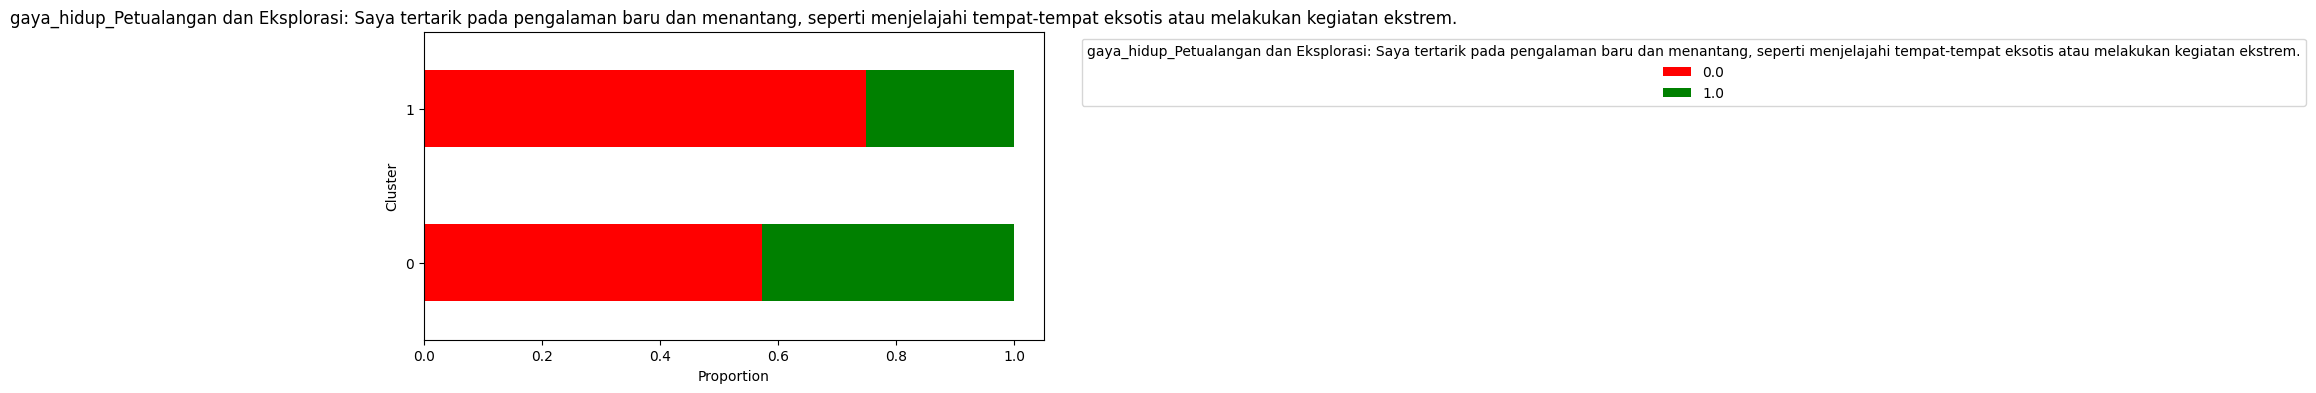

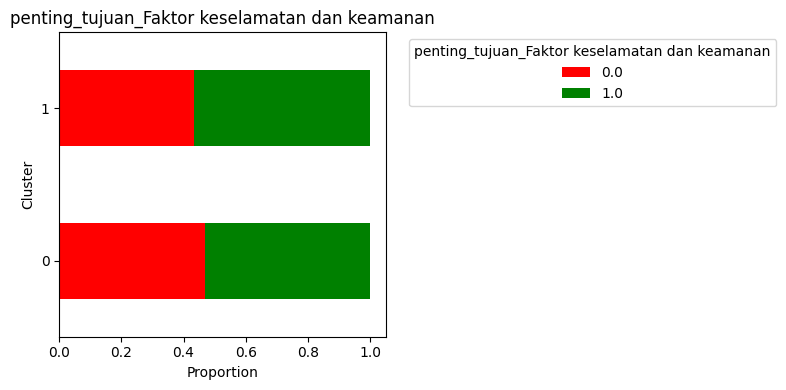

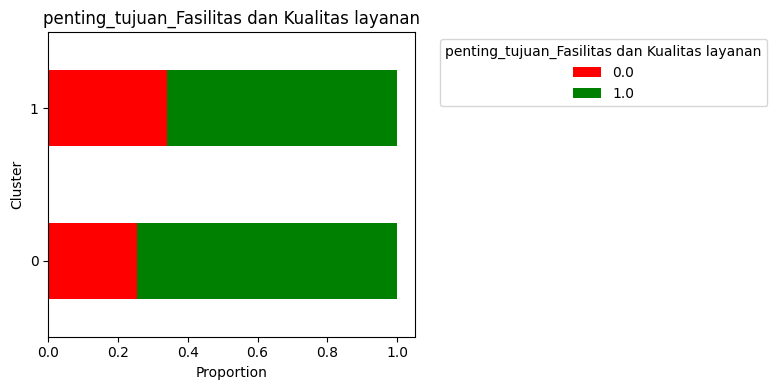

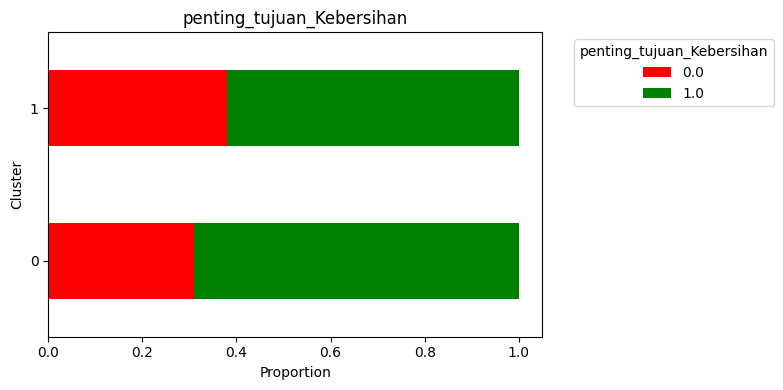

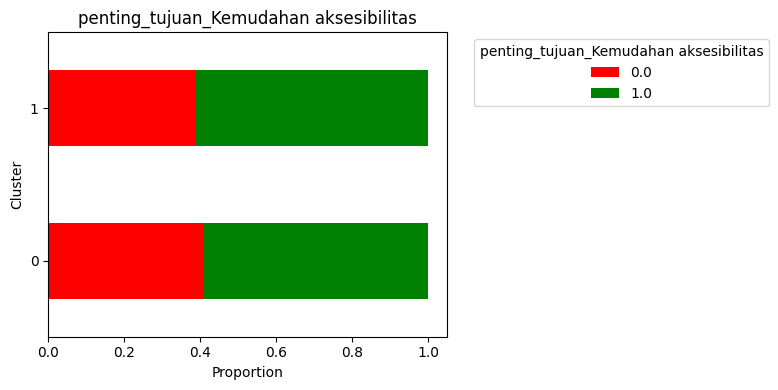

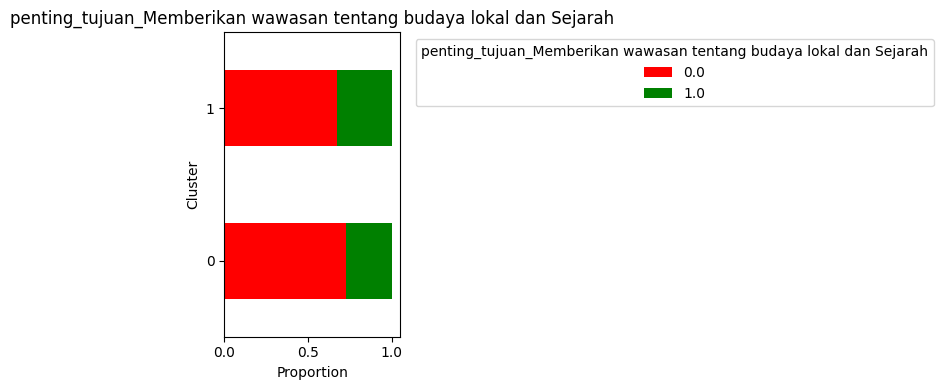

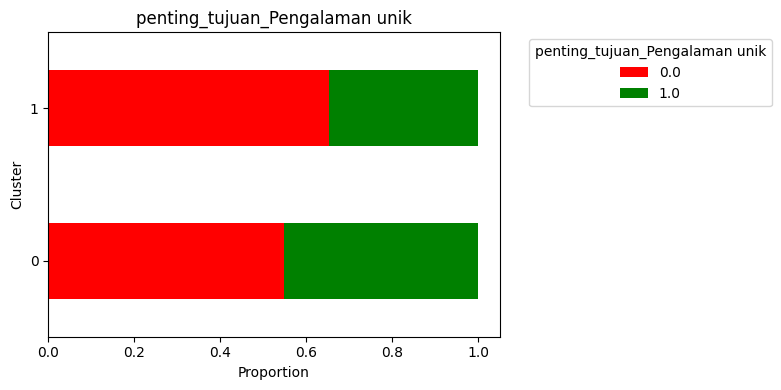

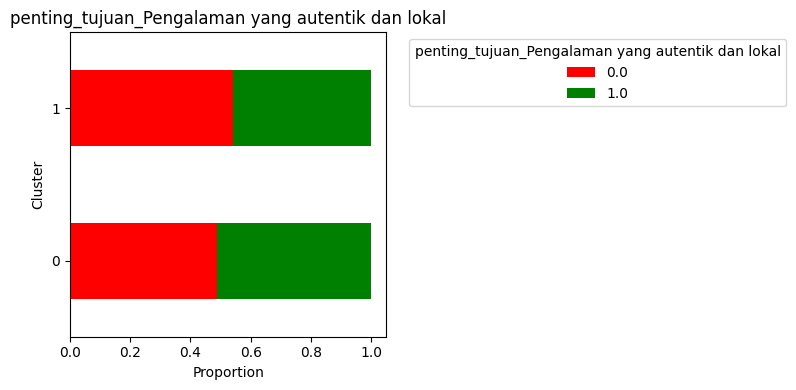

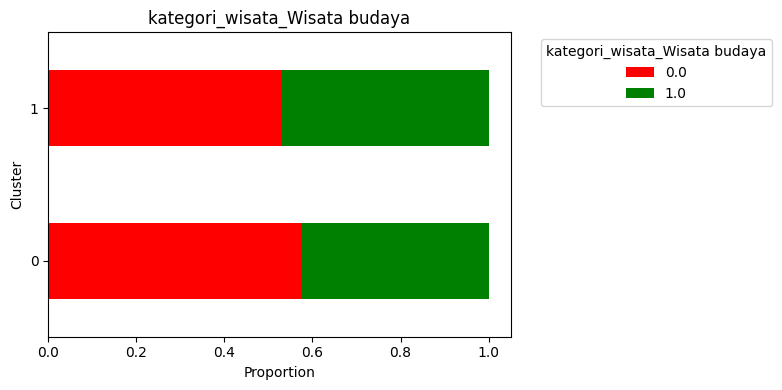

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



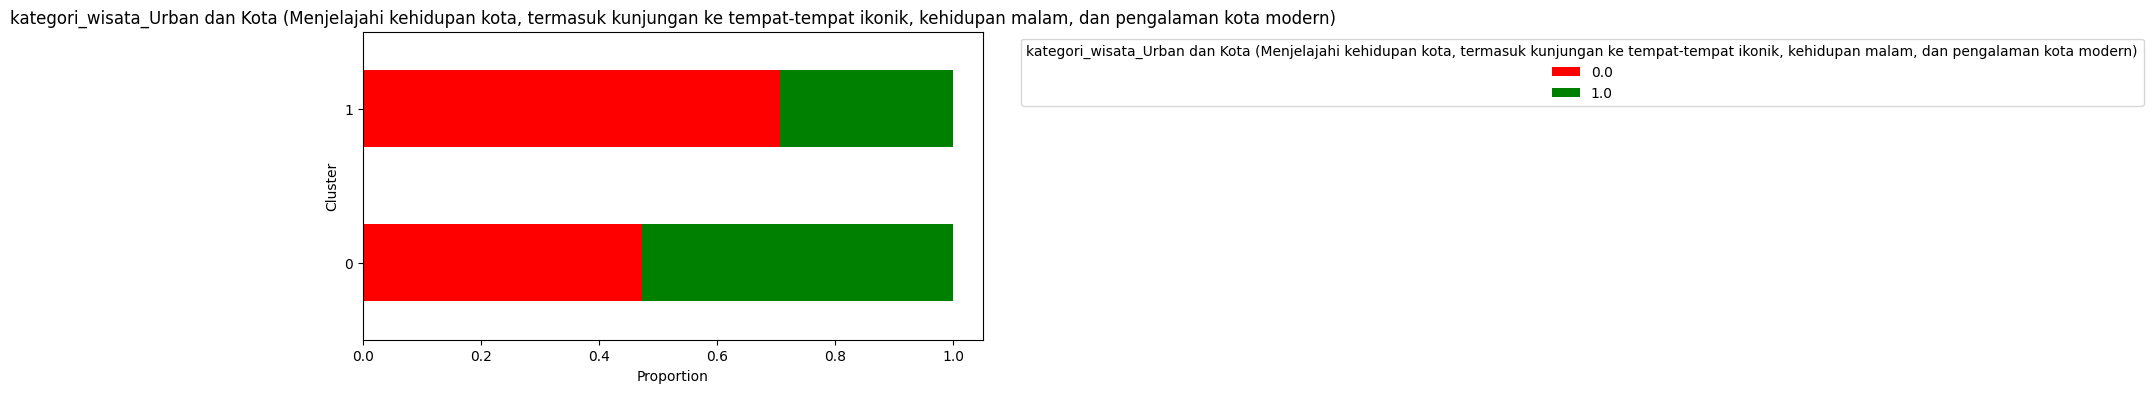

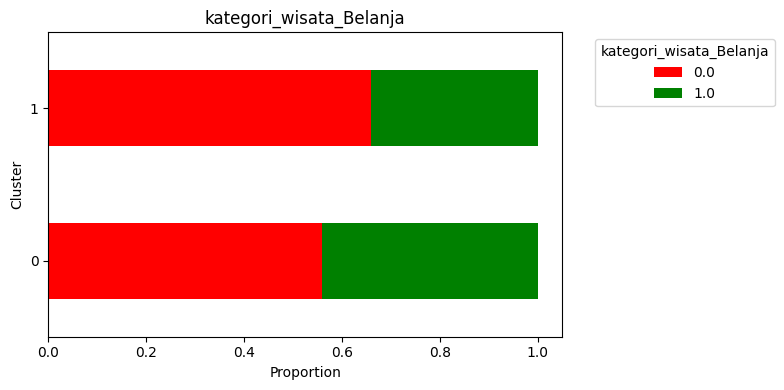

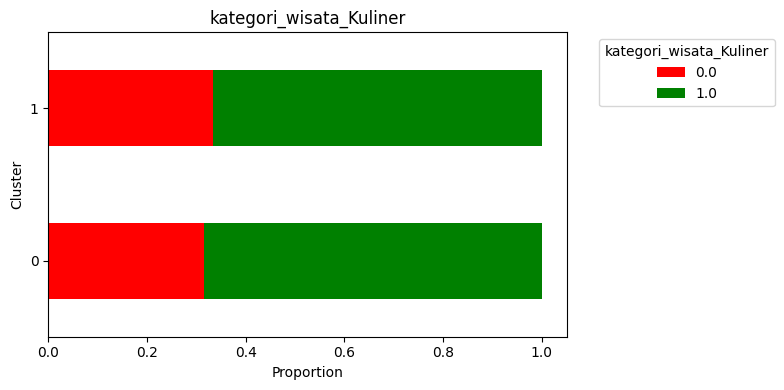

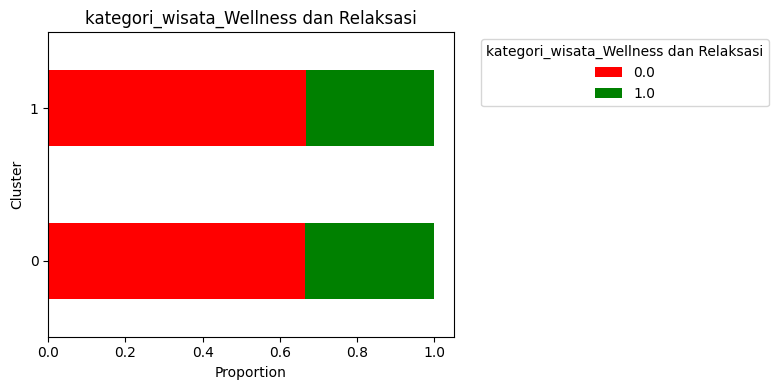

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



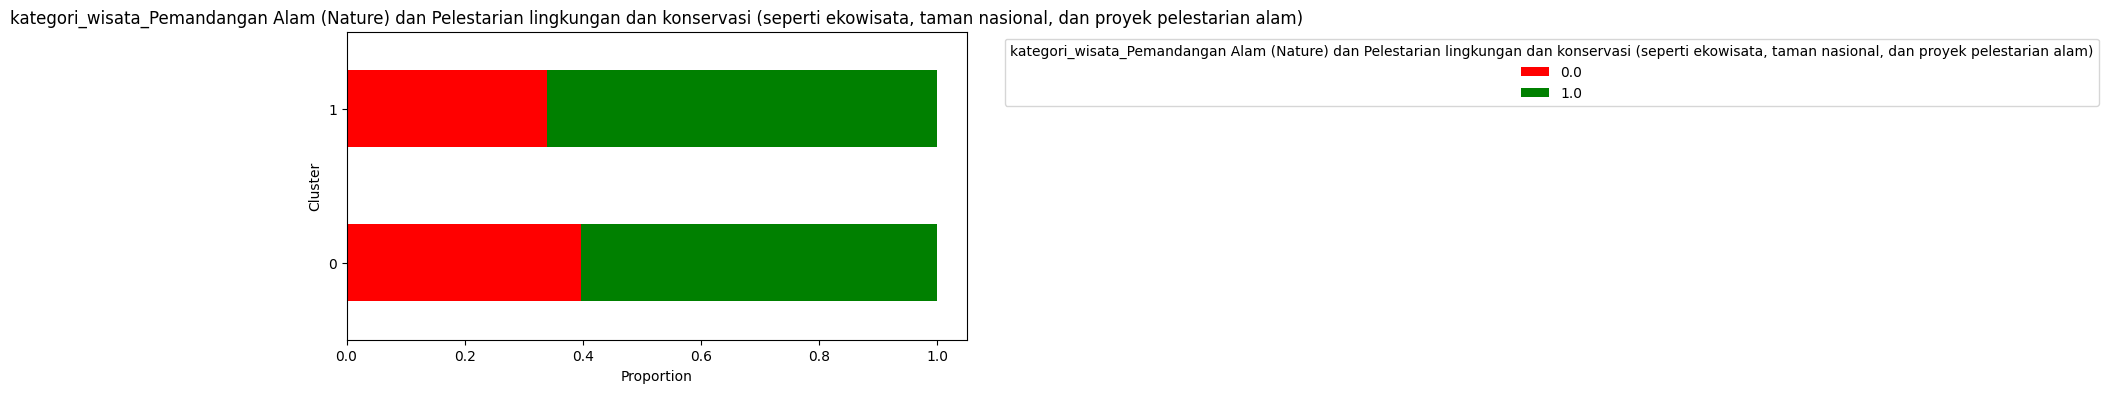

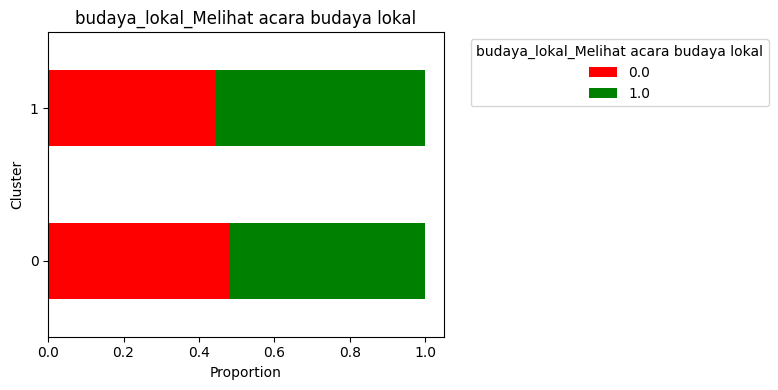

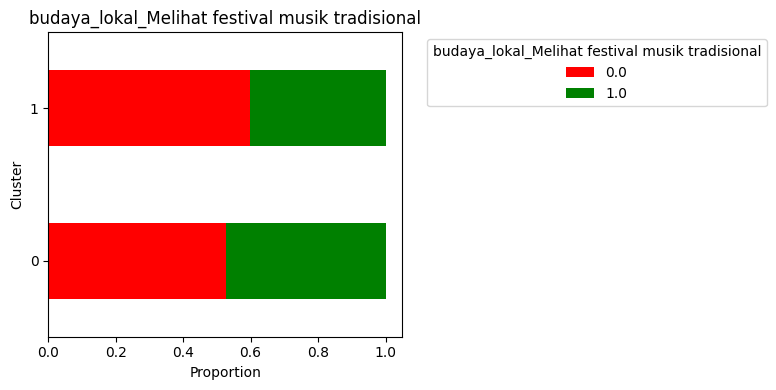

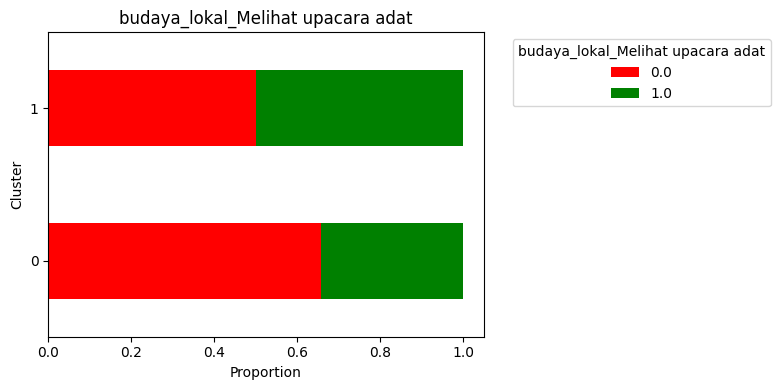

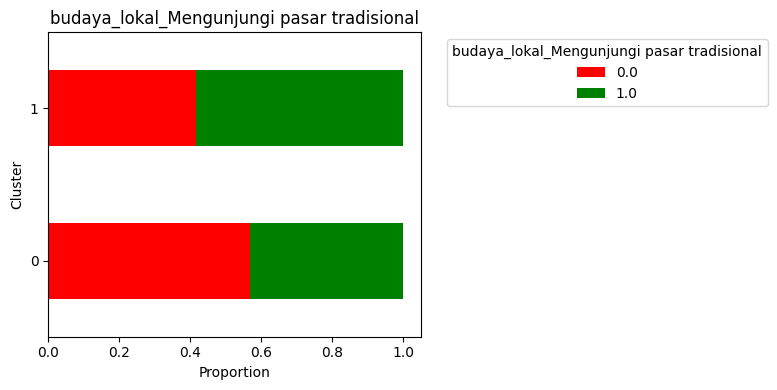

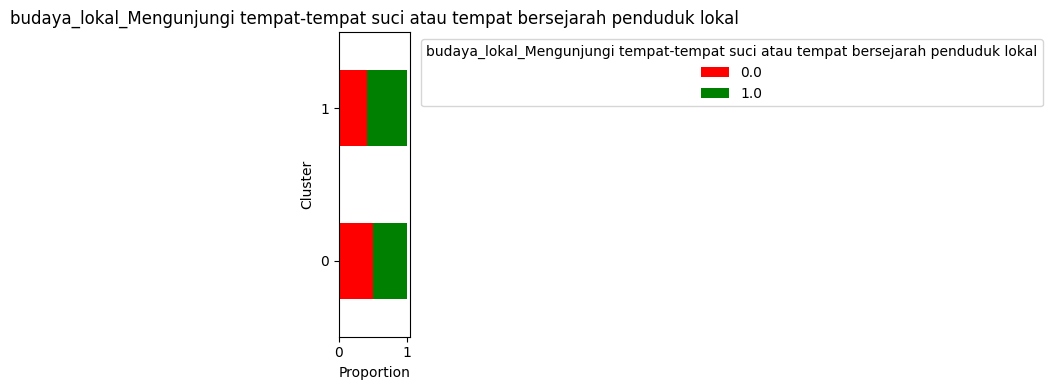

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



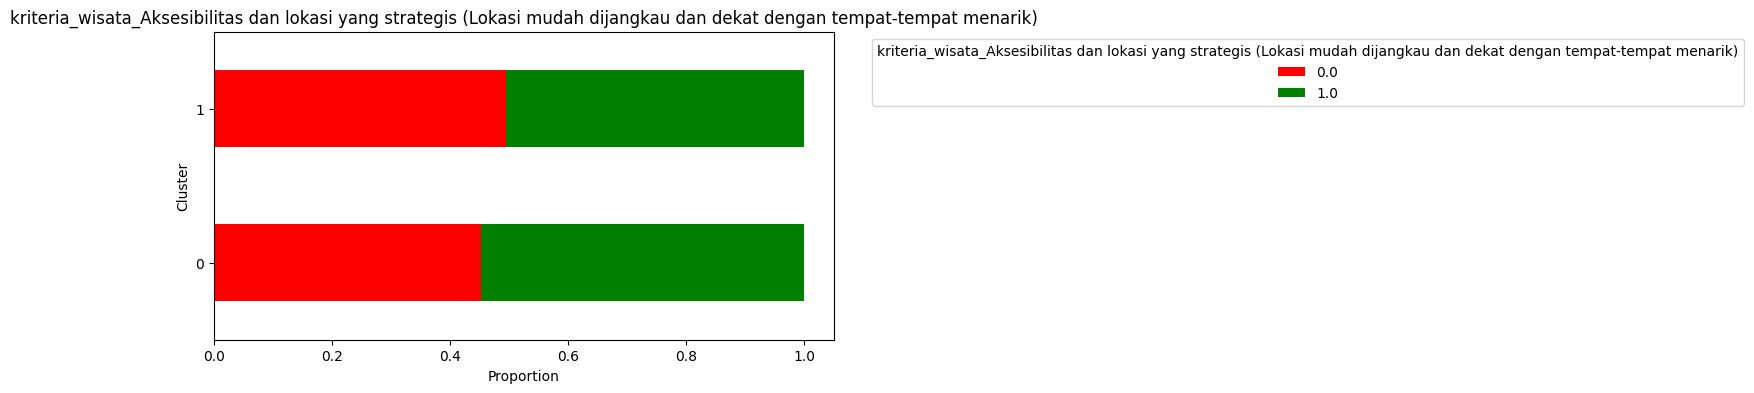

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



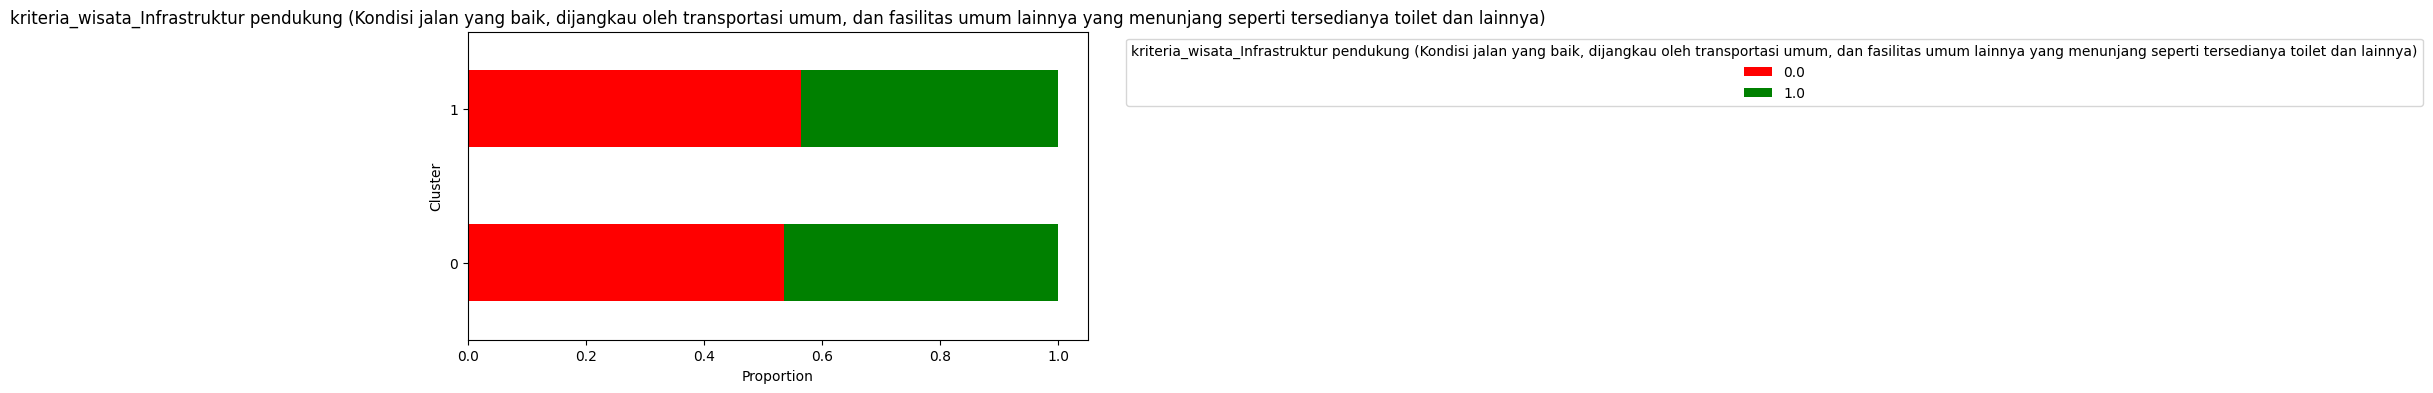

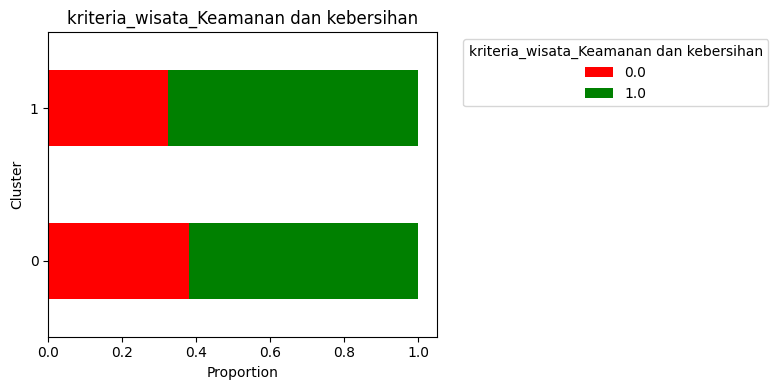

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



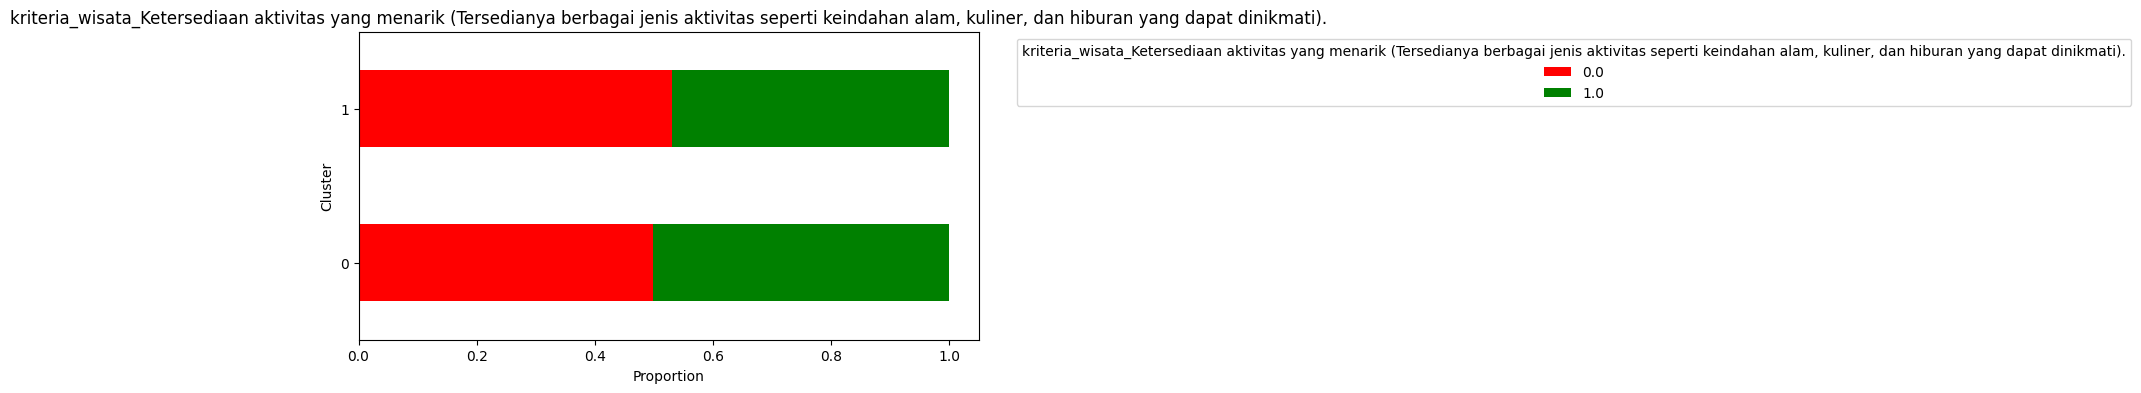

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



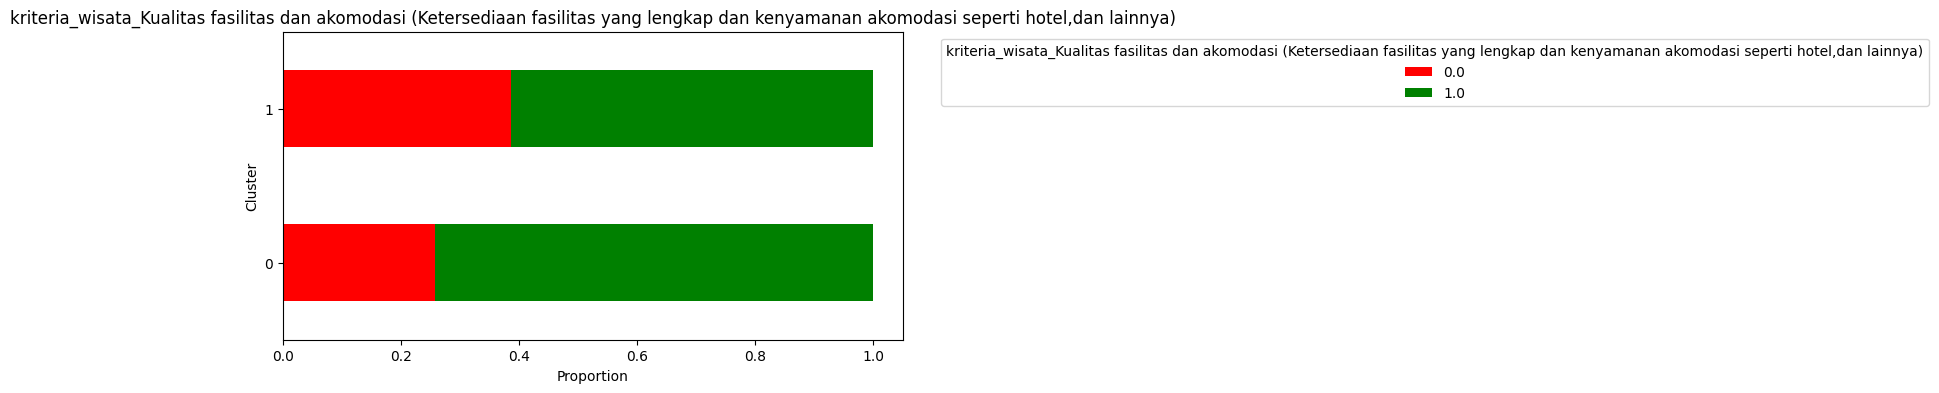

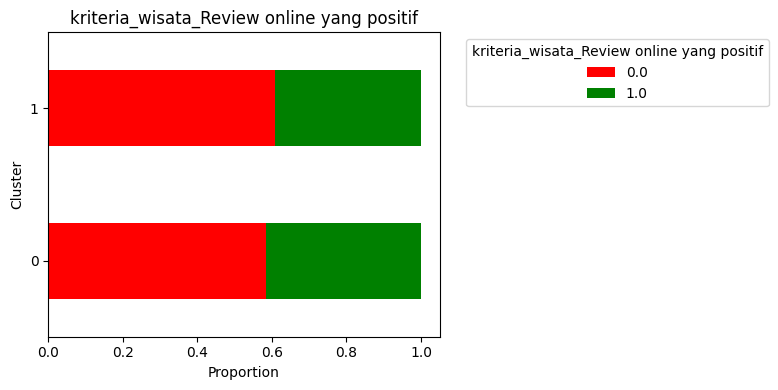

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



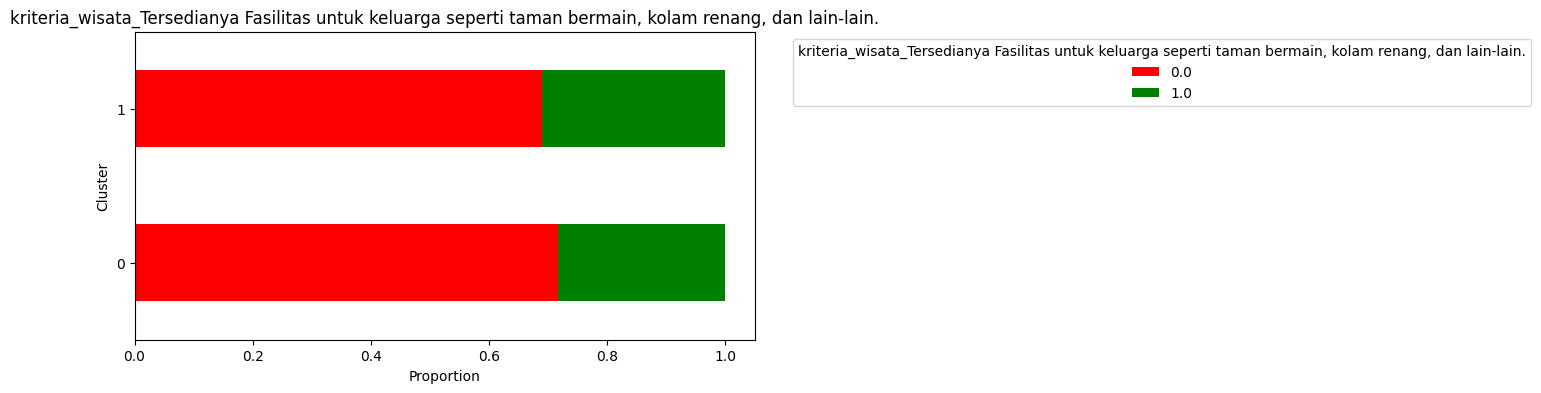

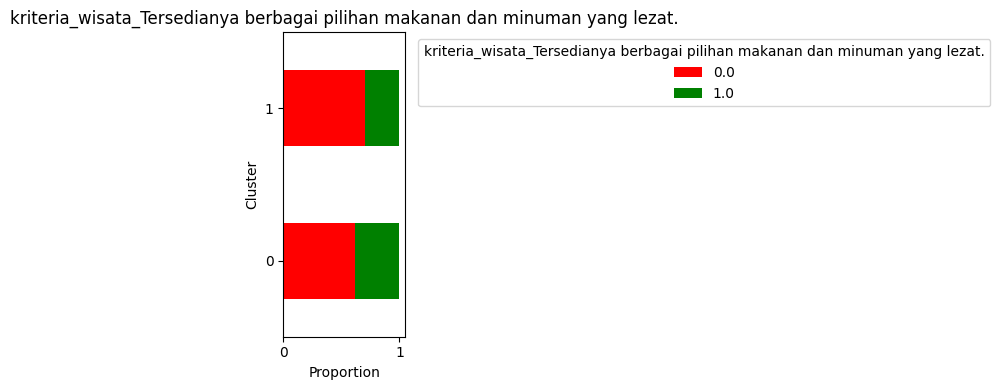

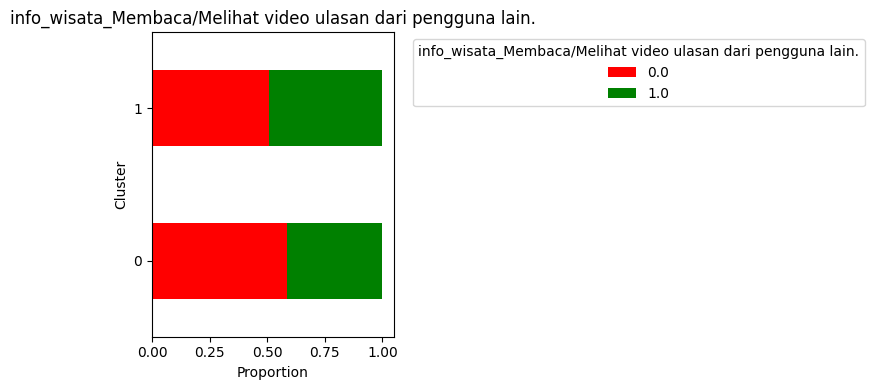

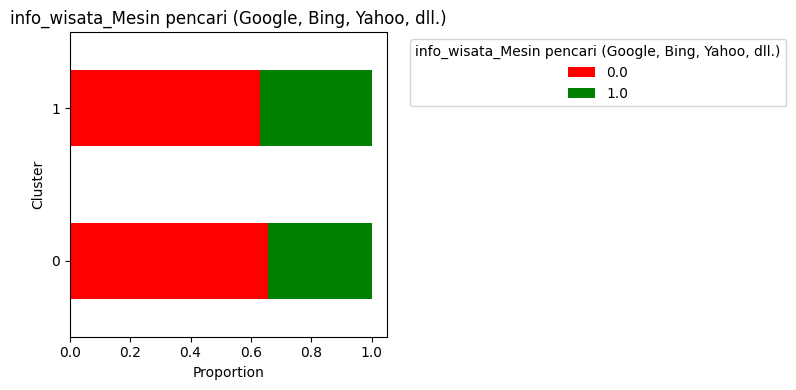

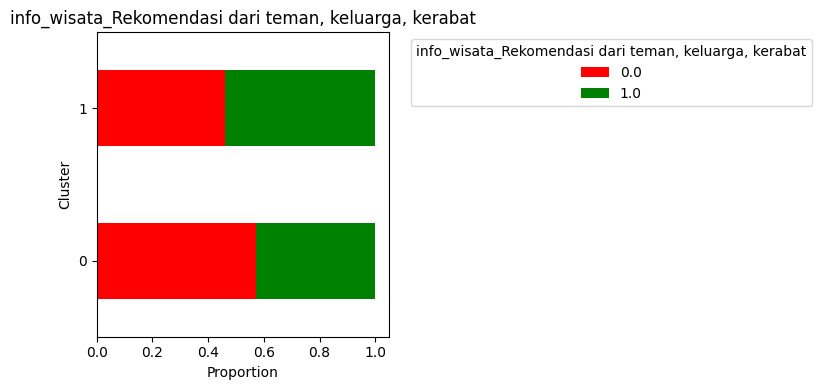

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



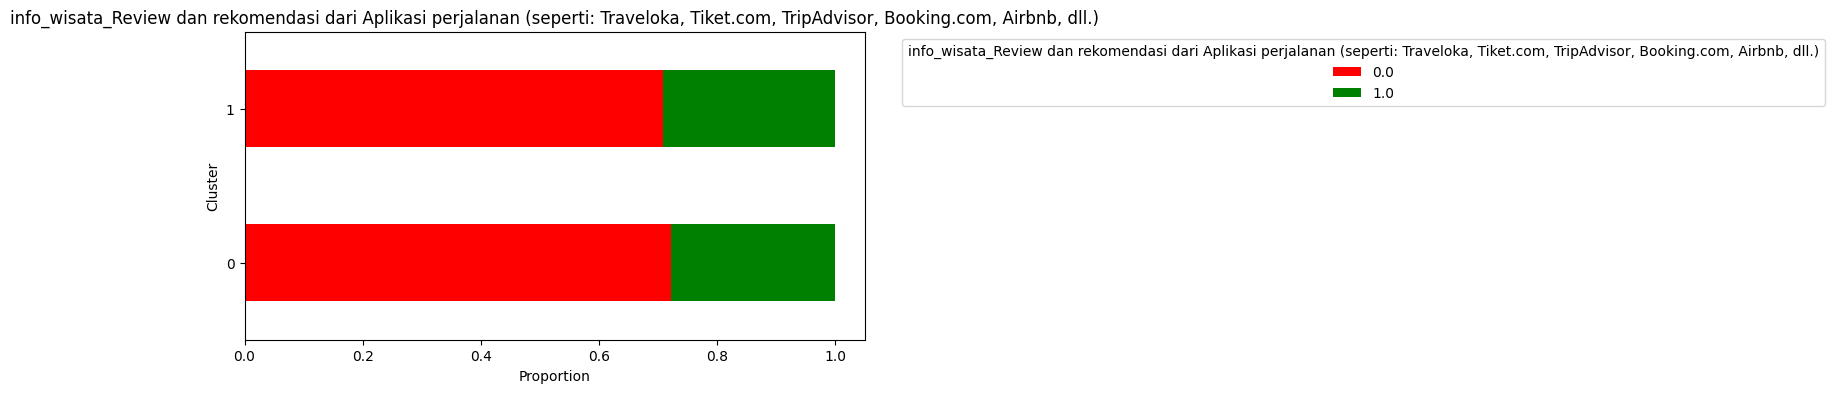

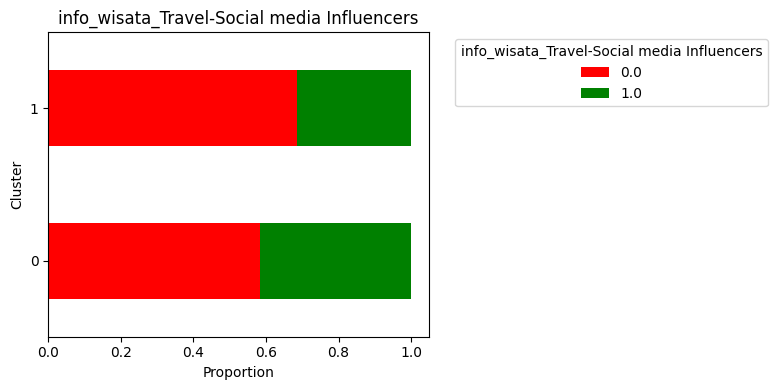

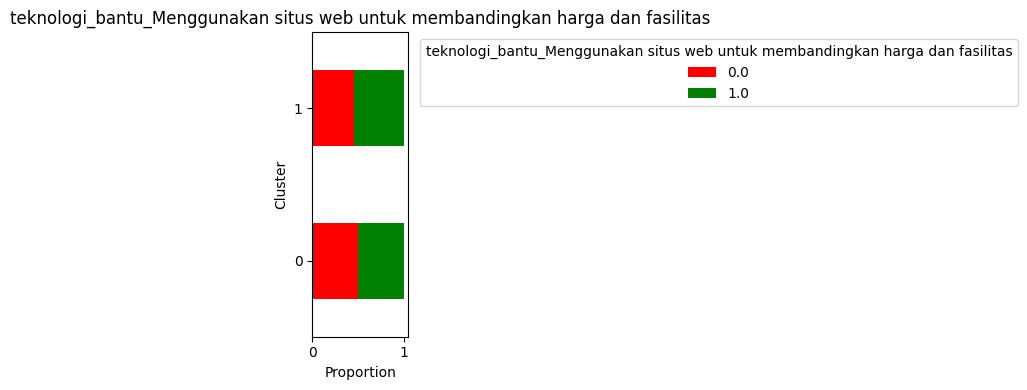

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



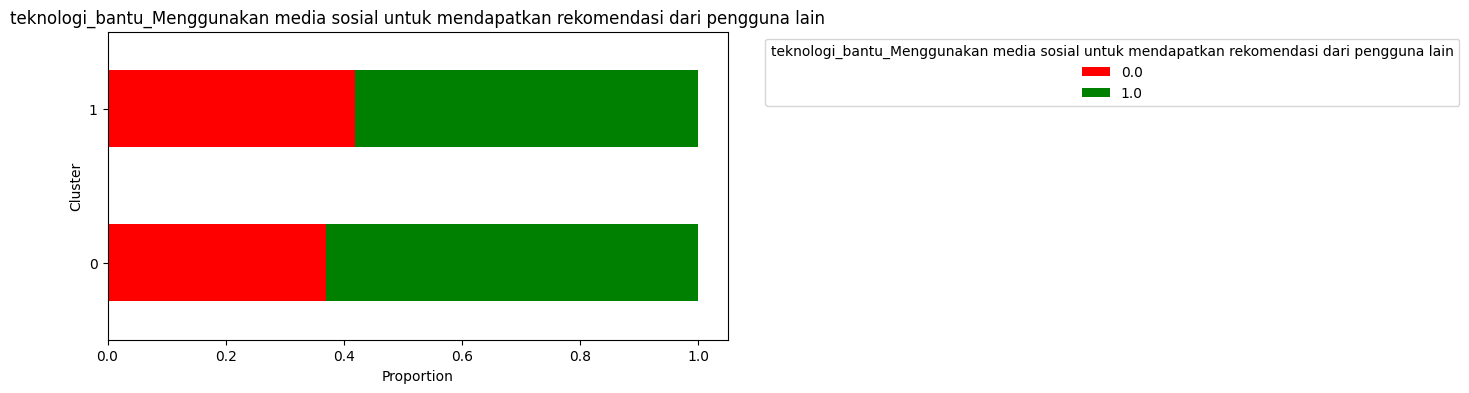

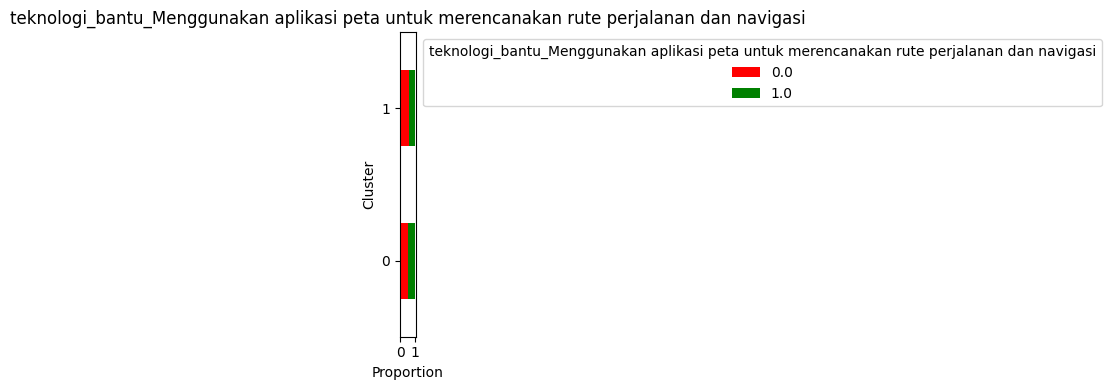

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



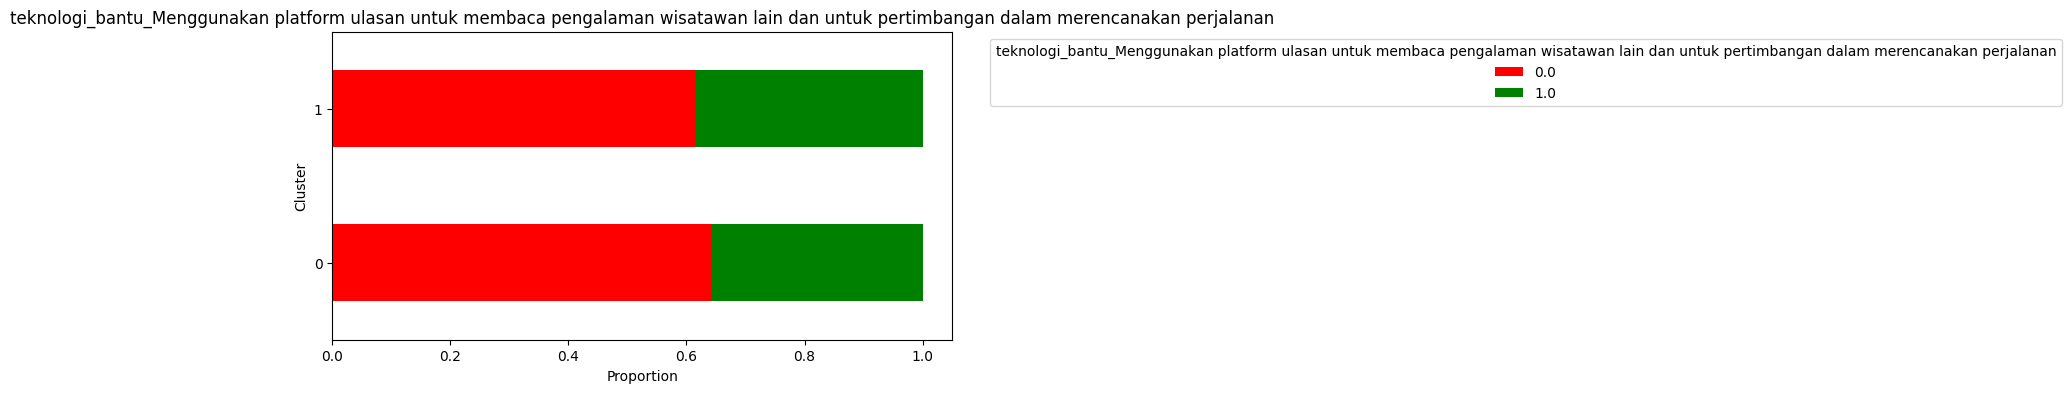

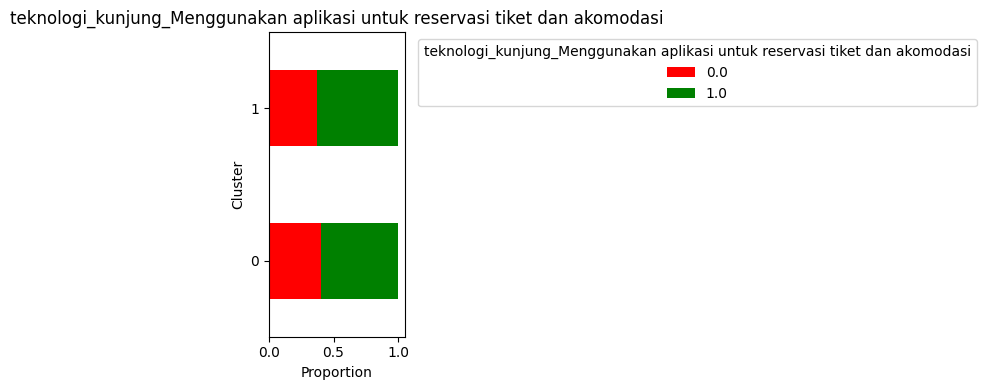

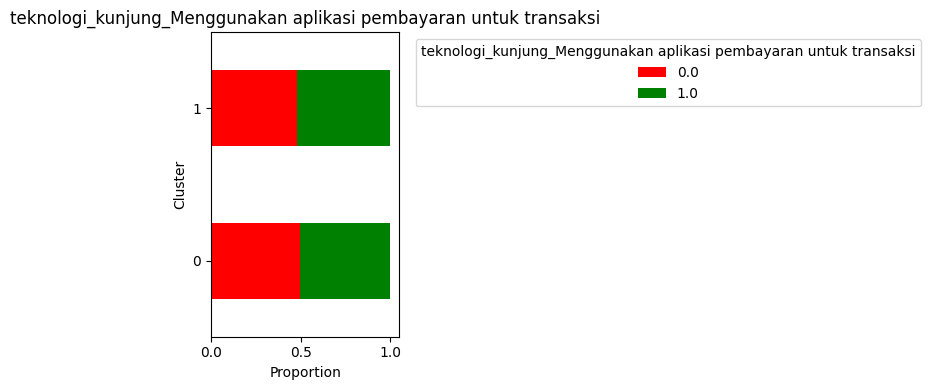

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



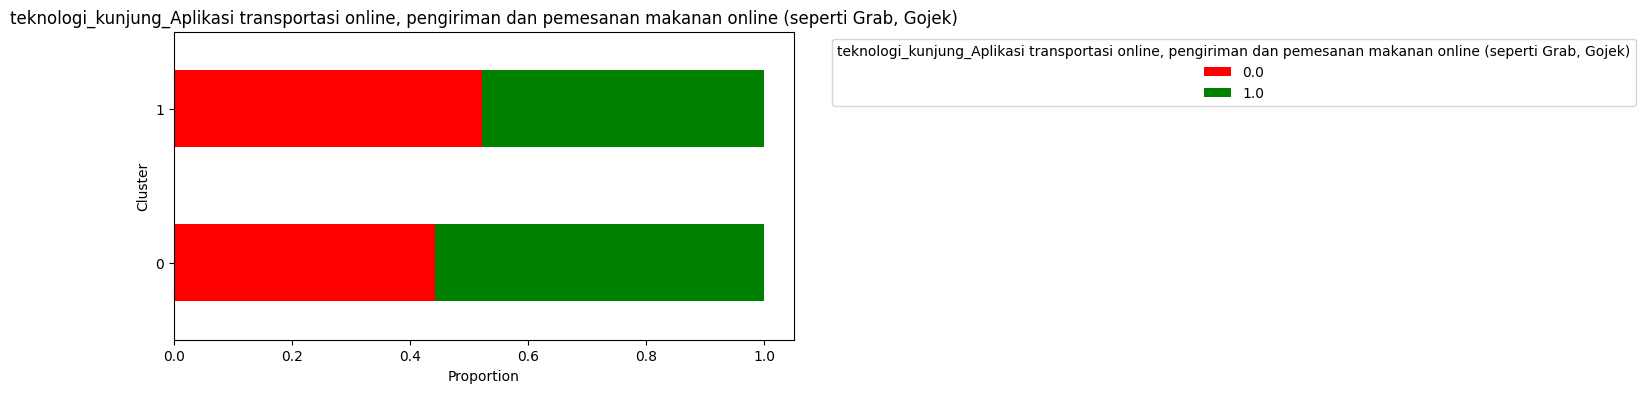

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



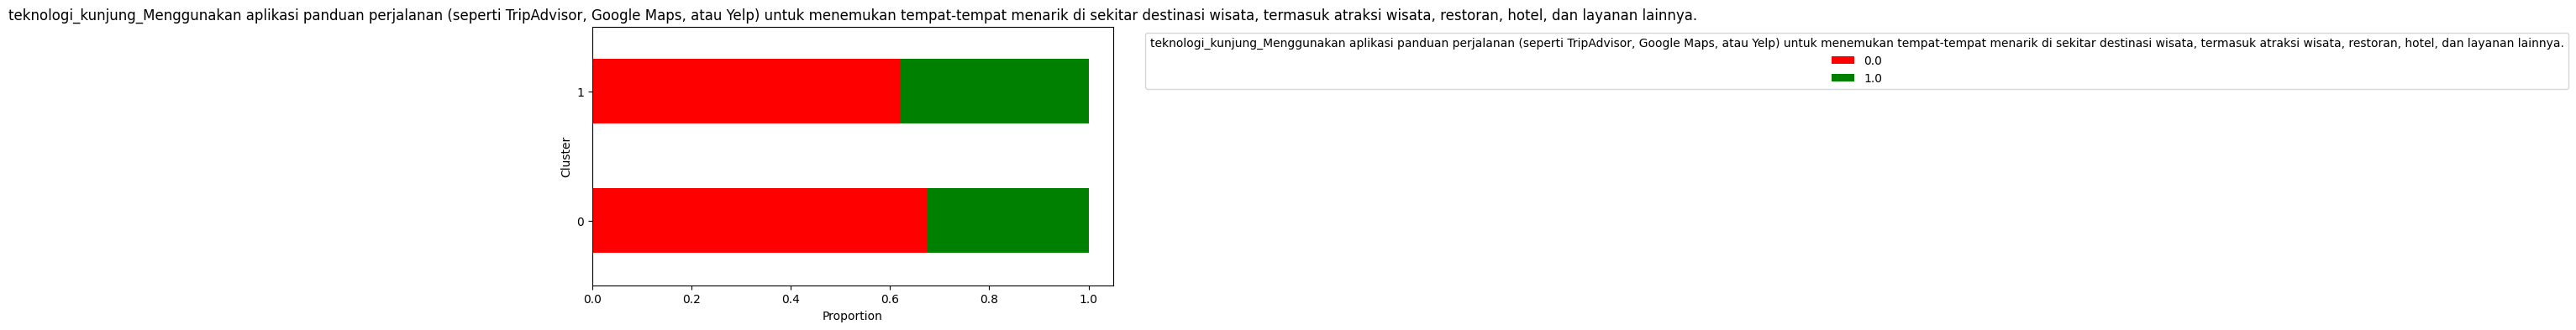

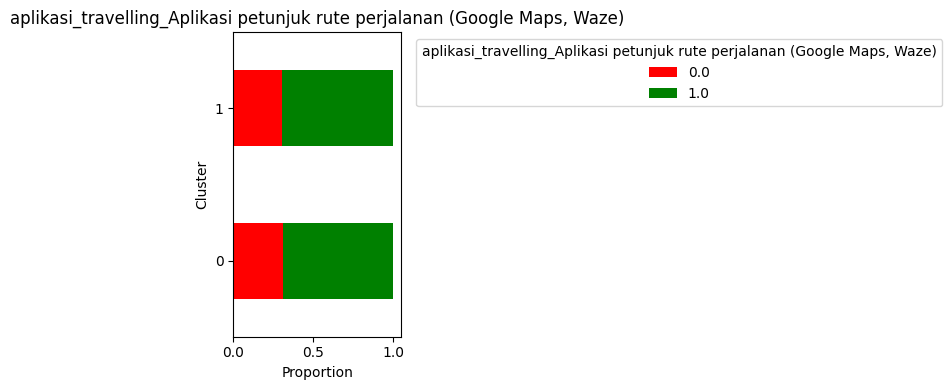

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



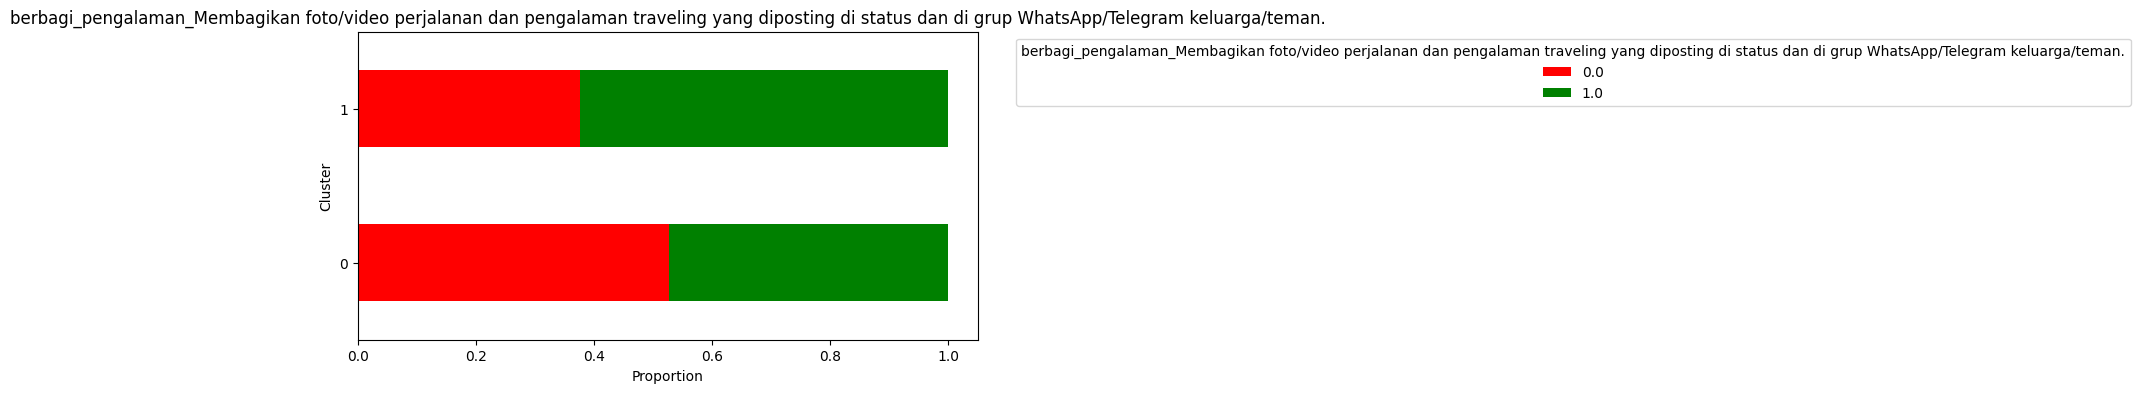

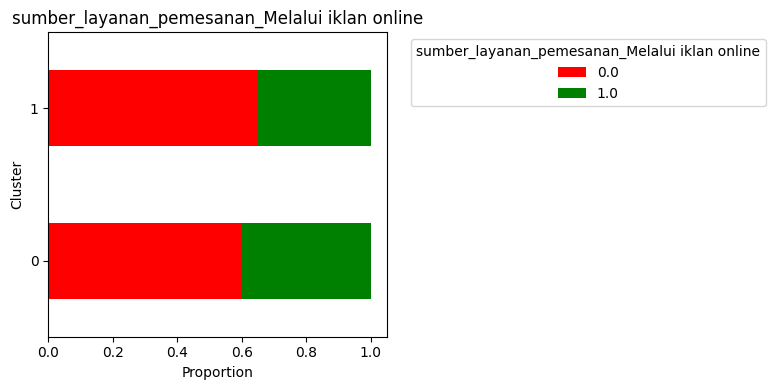

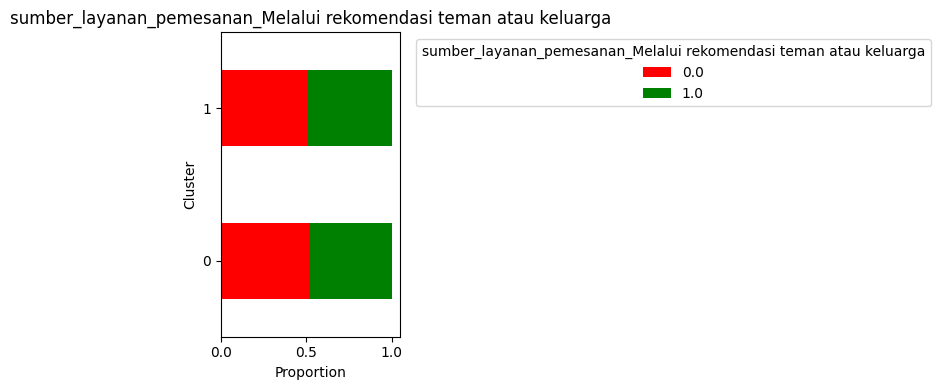

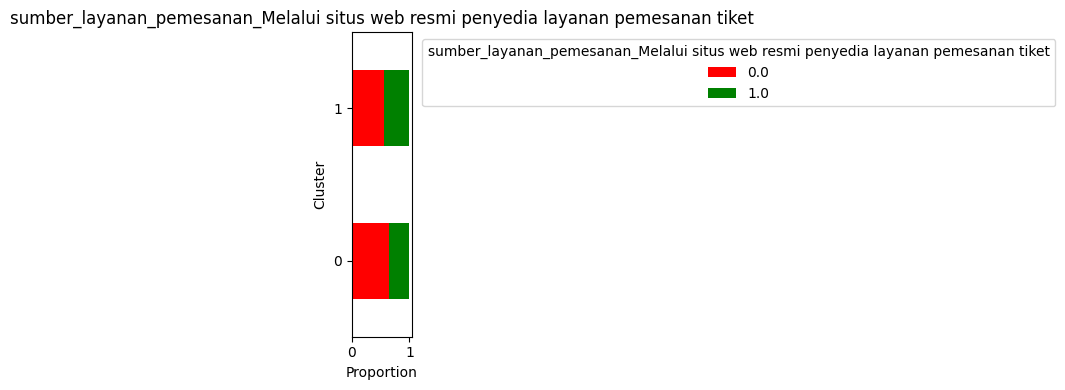

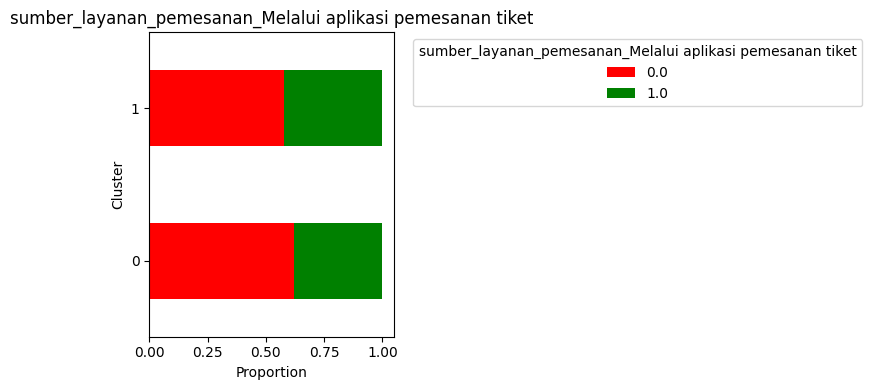

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



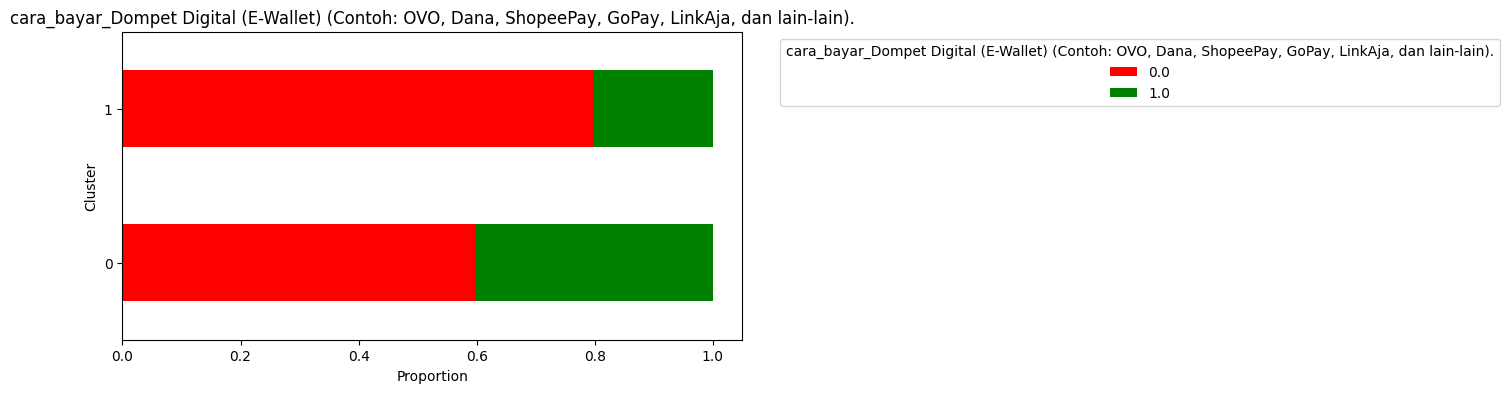

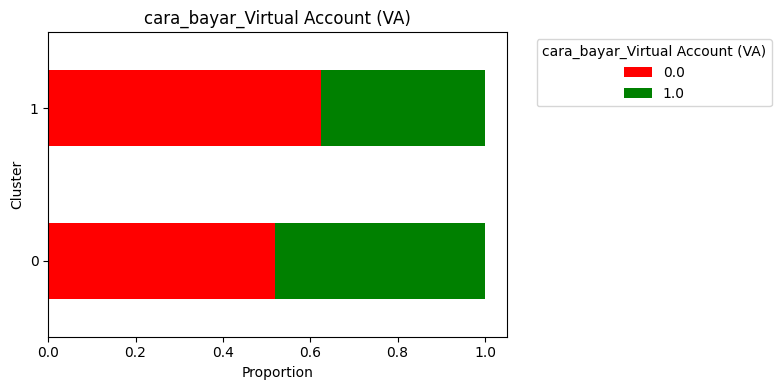

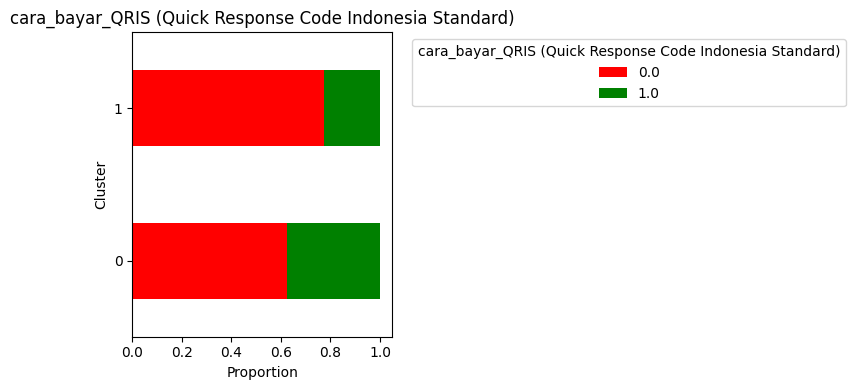

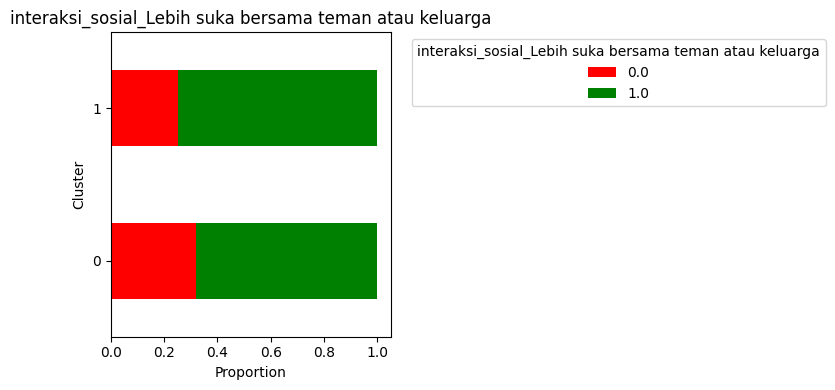

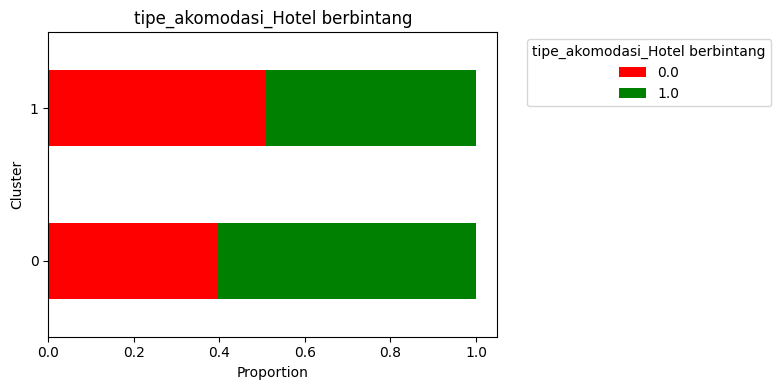

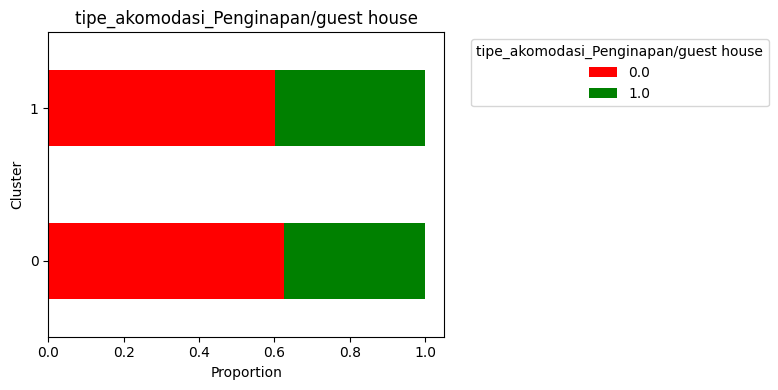

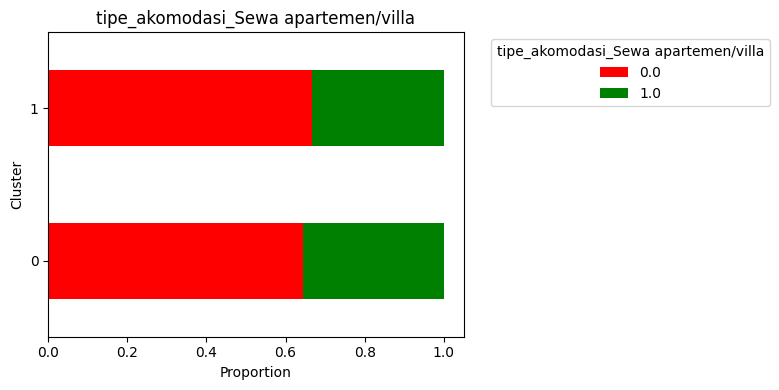

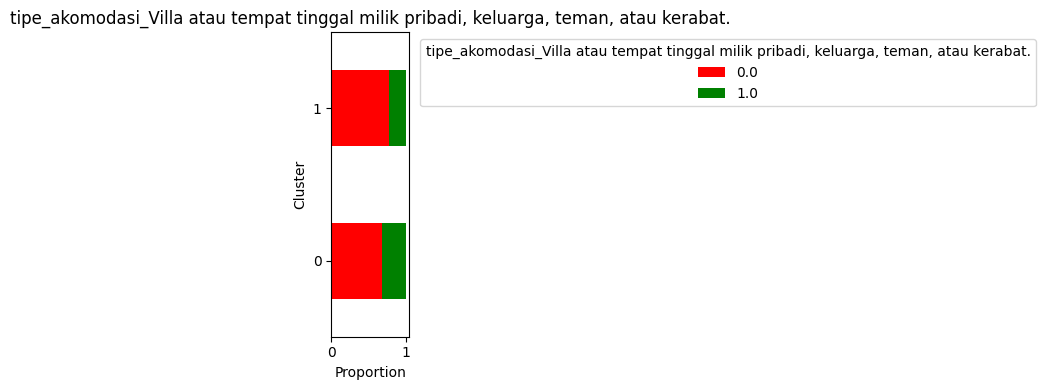

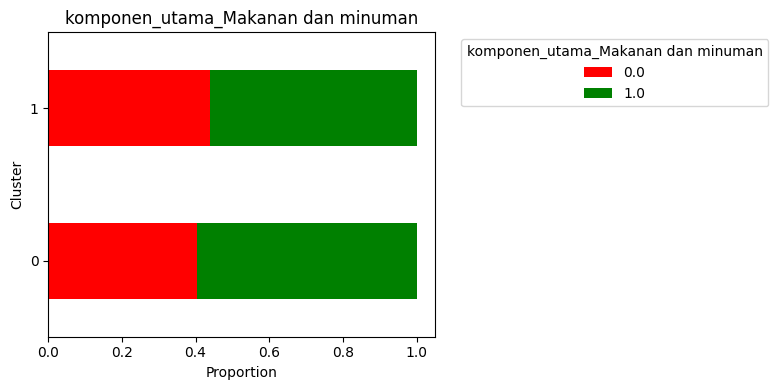

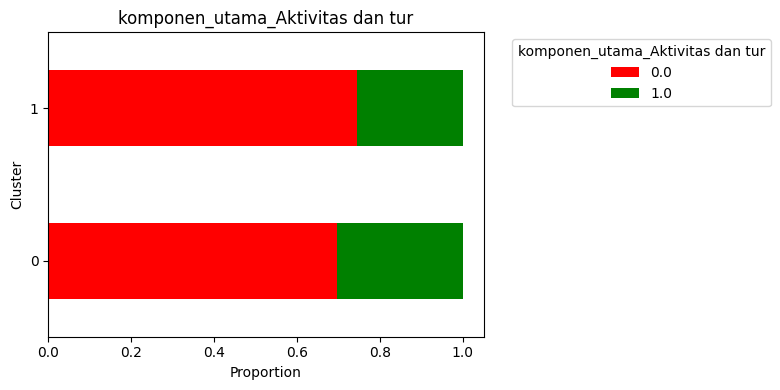

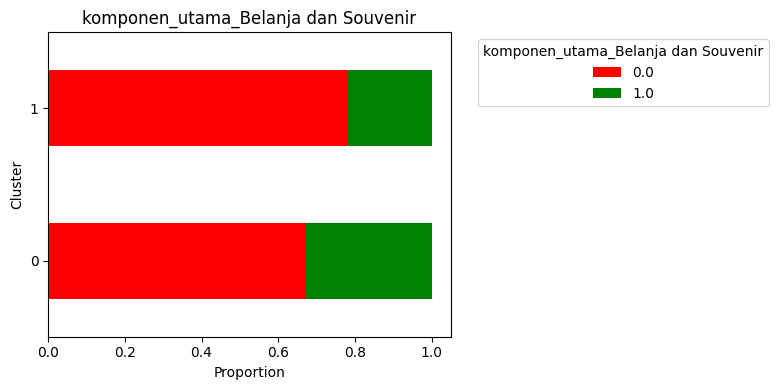

C:\Users\Asus\AppData\Local\Temp\ipykernel_25912\8041221.py:23: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



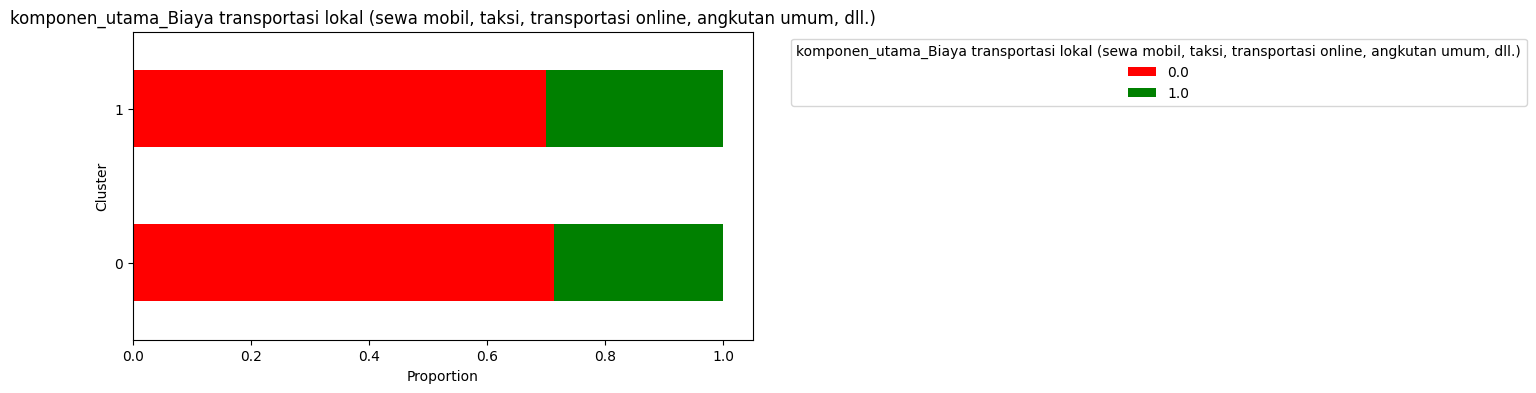

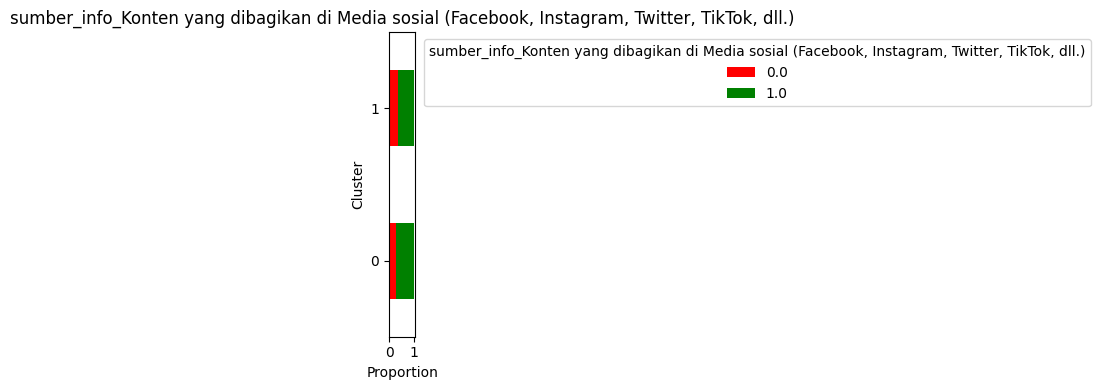

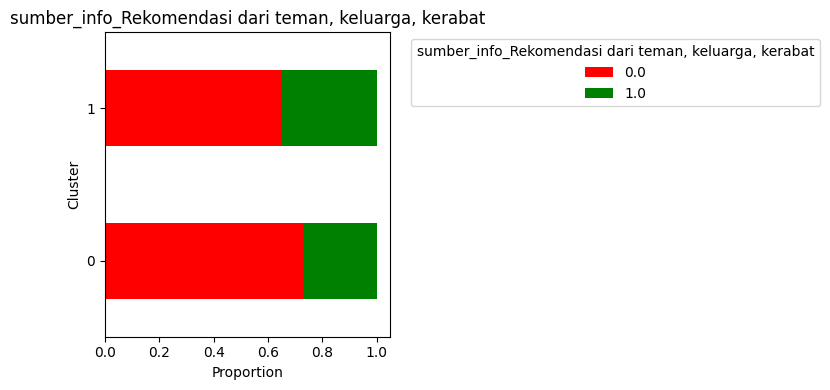

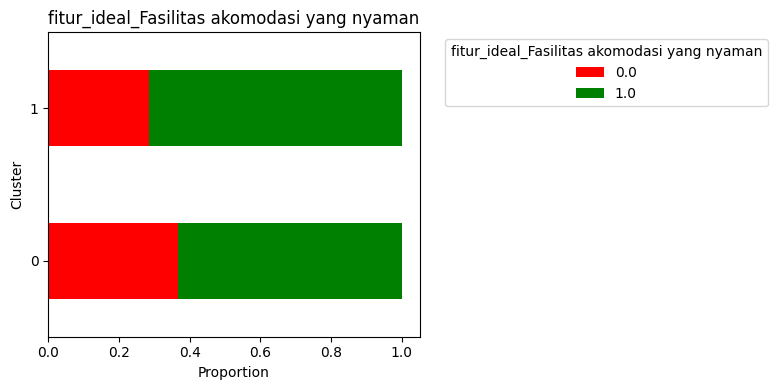

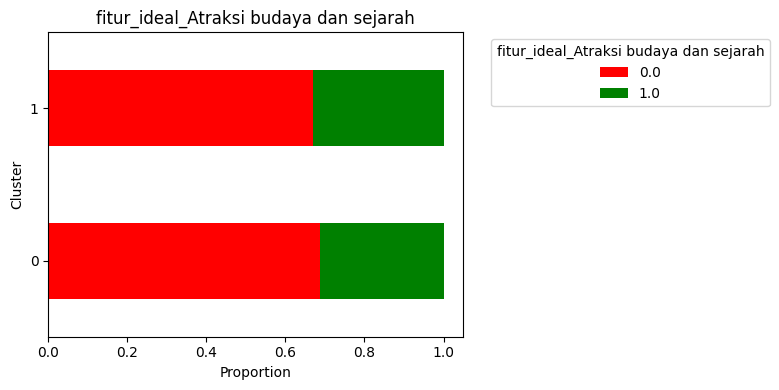

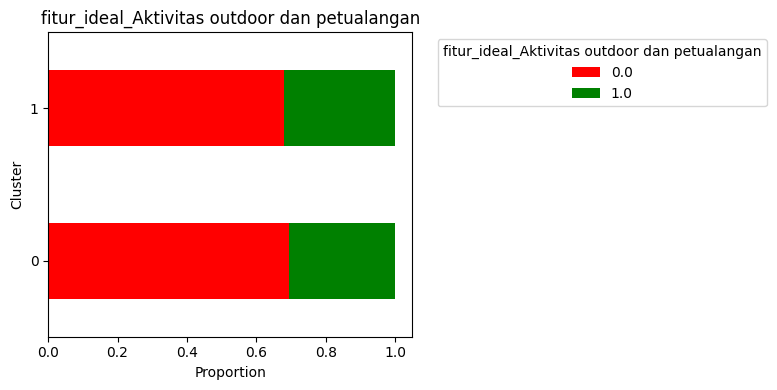

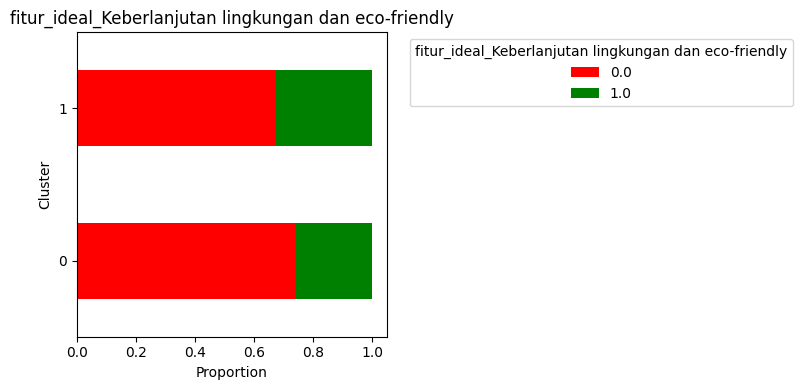

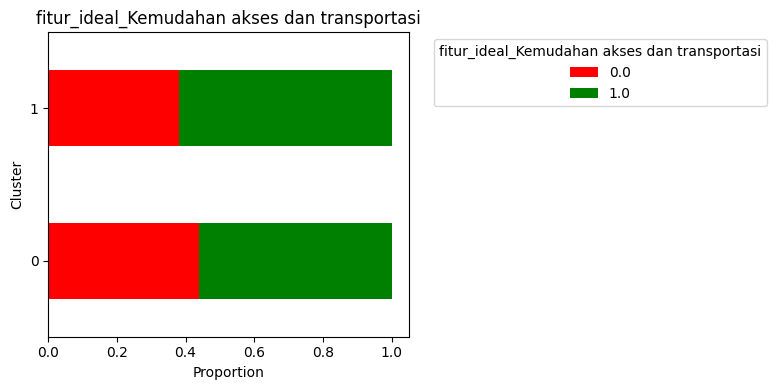

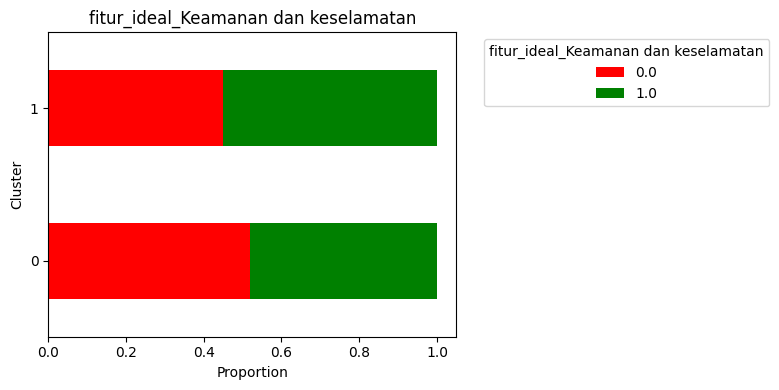

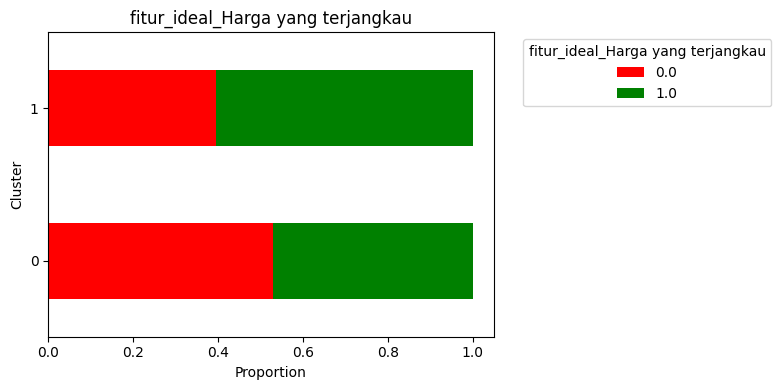

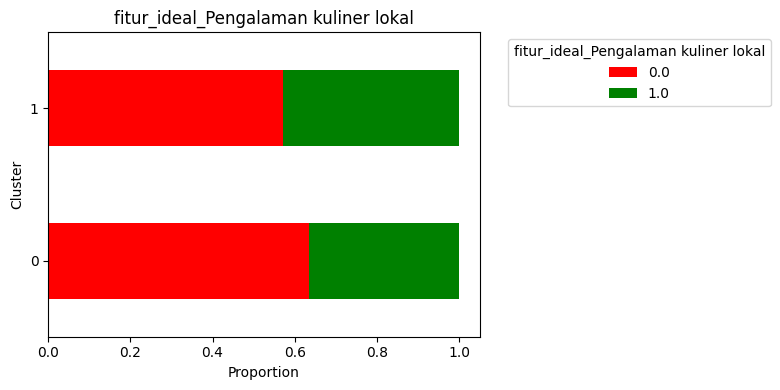

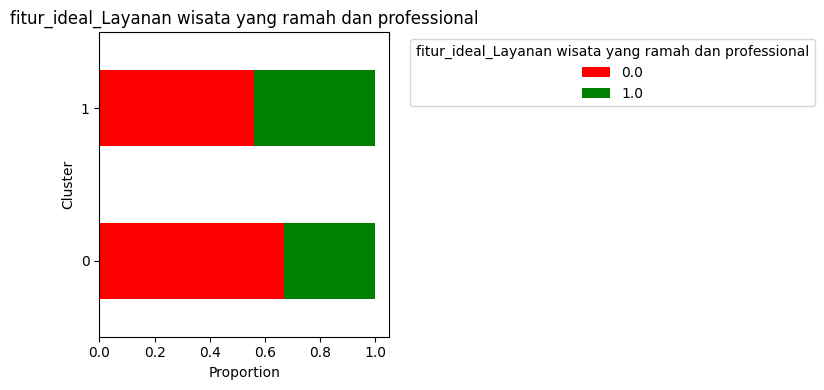

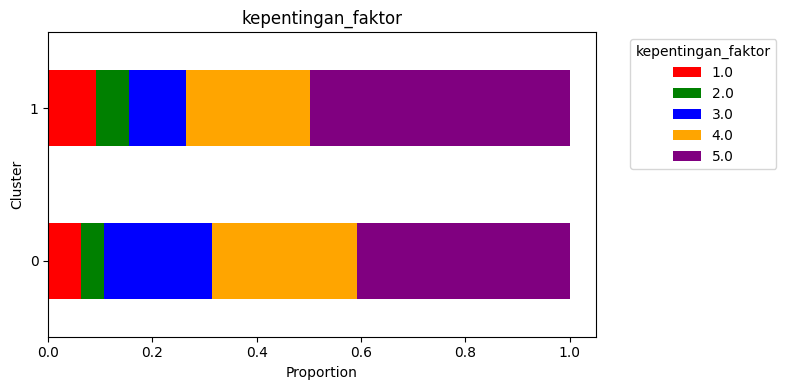

In [ ]:
df_gmm['cluster'] = gmm_labels


# Define the number of clusters (e.g., 2 or more)
n_clusters = len(df_gmm['cluster'].unique())

fixed_figsize = (8,4)

# Plot each feature
for feature in features:
    # Set figure size for each plot
    plt.figure(figsize=fixed_figsize)
    # Calculate the distribution of each feature within clusters
    feature_distribution = df_gmm.groupby('cluster')[feature].value_counts(normalize=True).unstack().fillna(0)
    
    # Plot with horizontal bars
    feature_distribution.plot(kind='barh', stacked=True, color=['red', 'green', 'blue', 'orange', 'purple'], ax=plt.gca())
    
    plt.title(feature)
    plt.xlabel('Proportion')
    plt.ylabel('Cluster')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### **K-Means LTS**

In [135]:
import sys
sys.path.append(r"C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts")

In [136]:
from kmeans_lts import KMeans_LTS, best_percentage, best_params

ModuleNotFoundError: No module named 'kmeans_lts'

In [ ]:
df_lts = df_for_model.copy()

In [ ]:
test = df_lts.copy()
n_clusters = range(2, 10)
best_inliers, best_cluster, best_percent, best_n_clusters = best_params(test, n_cluster_lts=n_clusters)

Evaluating n_cluster_lts:  2
 Percent:  5
 Score:  0.5597495661836255
 Percent:  10


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.5724670606658602
 Percent:  15
 Score:  0.5934859726003375
 Percent:  20


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.6142043474803628
 Percent:  25
 Score:  0.6301142773697401
 Percent:  30


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.6387776351680233
Evaluating n_cluster_lts:  3
 Percent:  5


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.39356699345162105
 Percent:  10


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.3872622688952886
 Percent:  15


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.3947345046145925
 Percent:  20


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.40250033181391726
 Percent:  25


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.4100701635794291
 Percent:  30
 Score:  0.41857958030601405
Evaluating n_cluster_lts:  4
 Percent:  5


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.29686926960654625
 Percent:  10
 Score:  0.29991517318884353
 Percent:  15


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.30885422042288563
 Percent:  20


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.31795676809380957
 Percent:  25


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.32444323738573455
 Percent:  30
 Score:  0.3348905767109033
Evaluating n_cluster_lts:  5
 Percent:  5


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.2689855299464668
 Percent:  10
 Score:  0.27409257368264006
 Percent:  15


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.28167060452656095
 Percent:  20
 Score:  0.28767982449907553
 Percent:  25


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.2928900860864809
 Percent:  30
 Score:  0.3016617609055685
Evaluating n_cluster_lts:  6
 Percent:  5


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.24281779851727822
 Percent:  10
 Score:  0.24073679611480195
 Percent:  15


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.24626646306789043
 Percent:  20
 Score:  0.27315286177377873
 Percent:  25


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.27072353376421454
 Percent:  30


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.2762643774192511
Evaluating n_cluster_lts:  7
 Percent:  5


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.1599709742532775
 Percent:  10
 Score:  0.16611009586109046
 Percent:  15


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.16112925610351572
 Percent:  20
 Score:  0.1658340189695475
 Percent:  25


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.17054330497349668
 Percent:  30
 Score:  0.1981912194347416
Evaluating n_cluster_lts:  8
 Percent:  5


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.13087892279553812
 Percent:  10


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.13420642703473587
 Percent:  15


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.13882093039656632
 Percent:  20
 Score:  0.1435450222263211
 Percent:  25
 Score:  0.14598974563258085
 Percent:  30


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.14903876958384377
Evaluating n_cluster_lts:  9
 Percent:  5
 Score:  0.12238766687166741
 Percent:  10


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Score:  0.12618396731463427
 Percent:  15
 Score:  0.1311880073691276
 Percent:  20


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

 Score:  0.13546861992569256
 Percent:  25
 Score:  0.1378820702458584
 Percent:  30
 Score:  0.1410476279392576


C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# GET inliers (LTS_result_filtered) and optimal cluster (LTS_result)
kmeans_lts = KMeans_LTS(df_lts, 2, 30)
LTS_result_filtered, LTS_result = kmeans_lts

C:\BINUS\THESIS\EKSPERIMEN\kmeans_lts\kmeans_lts.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Dataframe yg INLIER
df_inlier = df_for_model.copy()
df_inlier['cluster_id'] = LTS_result_filtered['cluster_id']
df_inlier.dropna(inplace=True)
df_inlier.reset_index(inplace=True)
df_inlier.drop('index', axis=1, inplace=True)
df_inlier.shape

(722, 94)

In [ ]:
df_lts.shape

(1030, 95)

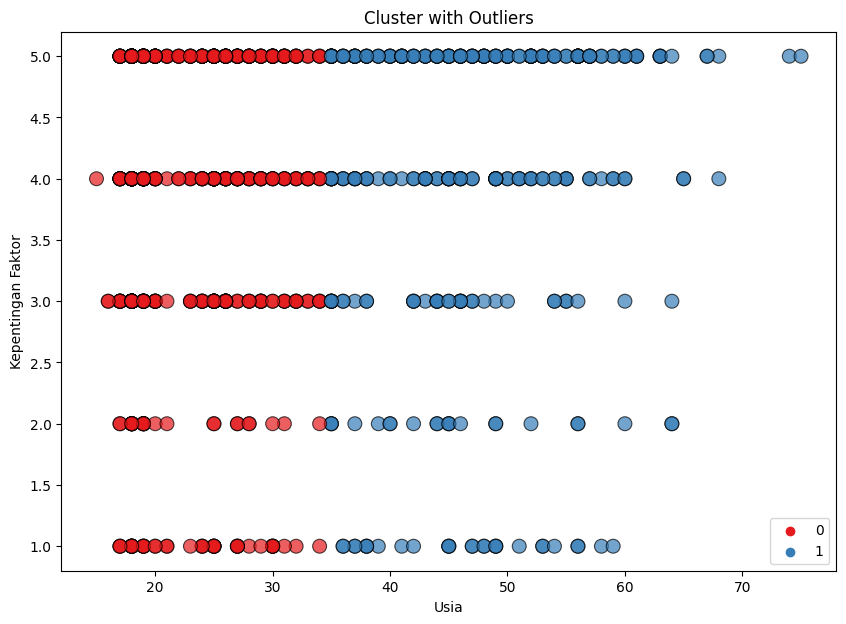

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_lts.iloc[:, 91], y=df_lts.iloc[:, 92], hue=df_lts['cluster_id'], palette='Set1', s=100, alpha=0.7, edgecolor='k')

plt.title('Cluster with Outliers')
plt.xlabel('Usia')
plt.ylabel('Kepentingan Faktor')
plt.legend()
plt.show()

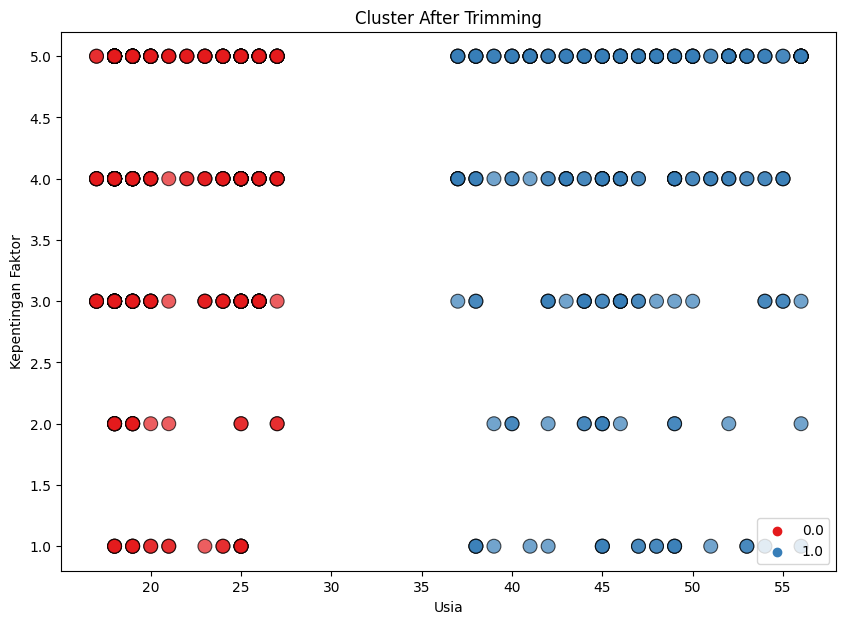

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_inlier.iloc[:, 91], y=df_inlier.iloc[:, 92], hue=df_inlier['cluster_id'], palette='Set1', s=100, alpha=0.7, edgecolor='k')

# Plotting the cluster centers
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 3], s=300, c='black', marker='X', label='Centroids')

plt.title('Cluster After Trimming')
plt.xlabel('Usia')
plt.ylabel('Kepentingan Faktor')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

# Reshape your data for radar chart
df_cluster_summary = df_inlier.groupby('cluster_id').mean().reset_index()
df_melted = pd.melt(df_cluster_summary, id_vars=['cluster_id'], 
                    value_vars=['usia', 'kepentingan_faktor', 'total_pengeluaran'],
                    var_name='feature', value_name='value')

# Define custom names for features
feature_mapping = {
    'usia': 'Usia',
    'kepentingan_faktor': 'Kepentingan Faktor',
    'total_pengeluaran': 'Total Pengeluaran'
}

# Apply the feature mapping to rename features
df_melted['feature'] = df_melted['feature'].map(feature_mapping)
# Create radar chart
fig = px.line_polar(df_melted, r='value', theta='feature', color='cluster_id', line_close=True)
fig.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



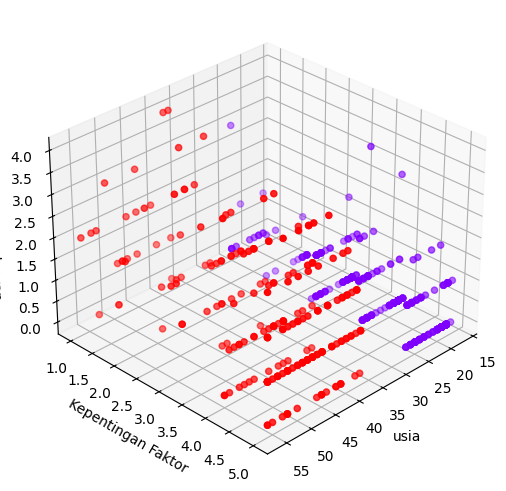

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_inlier['usia'], df_inlier['kepentingan_faktor'], df_inlier['total_pengeluaran'], c=df_inlier['cluster_id'], cmap='rainbow')
ax.set_xlabel('usia')
ax.set_ylabel('Kepentingan Faktor')
ax.set_zlabel('Total Pengeluaran')
# Adjust the view angle (optional)
ax.view_init(elev=30, azim=45)  # Adjust the elevation and azimuth for better visualization

# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
# FIND SILHOUETTE SCORE untuk HASIL CLUSTER dari INLIERS saja
inliers_no_id = LTS_result_filtered.drop(['cluster_id'], axis=1)
inliers_cluster = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(inliers_no_id)
score = silhouette_score(inliers_no_id, inliers_cluster.labels_)
print(score)

0.6428195517298195


In [ ]:
# Define the number of clusters (e.g., 2 or more)
n_clusters = len(df_inlier['cluster_id'].unique())

fixed_figsize = (8,4)

# Plot each feature
for feature in features:
    # Set figure size for each plot
    plt.figure(figsize=fixed_figsize)
    # Calculate the distribution of each feature within clusters
    feature_distribution = df_inlier.groupby('cluster_id')[feature].value_counts(normalize=True).unstack().fillna(0)
    
    # Plot with horizontal bars
    feature_distribution.plot(kind='barh', stacked=True, color=['red', 'green', 'blue', 'orange', 'purple'], ax=plt.gca())
    
    plt.title(feature)
    plt.xlabel('Proportion')
    plt.ylabel('Cluster')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

NameError: name 'df_inlier' is not defined

### Fuzzy C Means Clustering


In [138]:
filename='../Binus Clustering Data Pariwisata/df_for_model.csv'
data=pd.read_csv(filename)
data.head()

Unnamed: 0  gender  jumlah_anak  isTravel?  ikut_anggaran?  isWisata?  \
0           0     0.0          0.0        1.0             0.0        1.0   
1           1     1.0          0.0        0.0             1.0        1.0   
2           2     1.0          1.0        1.0             0.0        1.0   
3           3     0.0          0.0        0.0             1.0        0.0   
4           4     0.0          0.0        0.0             0.0        1.0   

   merk  sering_hal_baru?  tingkat_pendidikan  total_pengeluaran  ...  \
0   0.0               0.0                 3.0                1.0  ...   
1   1.0               0.0                 3.0                1.0  ...   
2   2.0               2.0                 4.0                3.0  ...   
3   1.0               1.0                 3.0                2.0  ...   
4   1.0               2.0                 3.0                2.0  ...   

   fitur_ideal_Atraksi budaya dan sejarah  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     1.0   
4                                     1.0   

   fitur_ideal_Aktivitas outdoor dan petualangan  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            1.0   
4                                            1.0   

   fitur_ideal_Keberlanjutan lingkungan dan eco-friendly  \
0                                                1.0       
1                                                0.0       
2                                                1.0       
3                                                1.0       
4                                                0.0       

   fitur_ideal_Kemudahan akses dan transportasi  \
0                                           1.0   
1                                           0.0   
2                                           0.0   
3                                           1.0   
4                                           1.0   

   fitur_ideal_Keamanan dan keselamatan  fitur_ideal_Harga yang terjangkau  \
0                                   0.0                                1.0   
1                                   0.0                                0.0   
2                                   0.0                                0.0   
3                                   1.0                                1.0   
4                                   1.0                                1.0   

   fitur_ideal_Pengalaman kuliner lokal  \
0                                   1.0   
1                                   0.0   
2                                   1.0   
3                                   0.0   
4                                   1.0   

   fitur_ideal_Layanan wisata yang ramah dan professional  usia  \
0                                                0.0       28.0   
1                                                0.0       25.0   
2                                                0.0       51.0   
3                                                0.0       27.0   
4                                                1.0       32.0   

   kepentingan_faktor  
0                 5.0  
1                 4.0  
2                 4.0  
3                 4.0  
4                 4.0  

[5 rows x 94 columns]

In [ ]:
data=data.loc[:,[]]